<a href="https://colab.research.google.com/github/wagnermoraesjr/Projetos_Ciencia_de_Dados/blob/main/Projetos_de_Classificacao/Bank_Marketing/Bank_Marketing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Projeto de Modelagem (Classificação) - Bank Marketing**

Neste projeto vamos resolver um problema de negócio de um banco português, que quer prever se o seu cliente se inscreverá (1/yes) ou não (0/no) para um depósito a prazo. Para isso faremos todas as etapas do processo de desenvolvimento de um modelo seguindo a metodologia CRISP-DM.

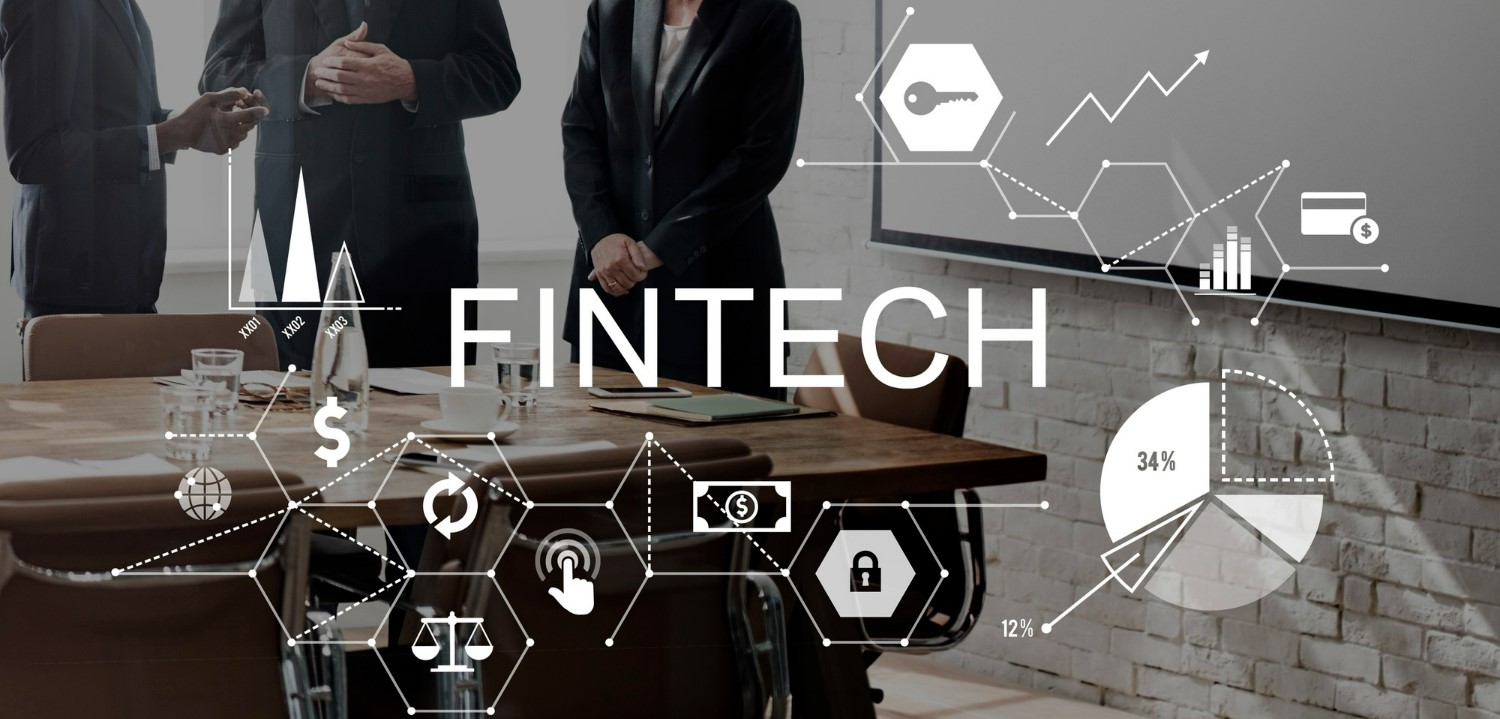

<br>
<br>
<br>
<br>

## **Introdução**

Nos dias de hoje, o setor bancário enfrenta um cenário extremamente dinâmico e competitivo, no qual entender profundamente o comportamento do consumidor se tornou fundamental para o sucesso das instituições financeiras. Nesse contexto, o uso estratégico de dados e técnicas avançadas, como o machine learning, desempenha um papel crucial no desenvolvimento e na execução de campanhas de marketing eficazes.
<br>
<br>
A importância do uso de dados e machine learning para campanhas de marketing no setor bancário é incontestável. A vasta quantidade de informações disponíveis, que inclui transações financeiras, histórico de compras, comportamento online e offline, entre outros, oferece uma oportunidade única para os bancos entenderem as necessidades e preferências dos clientes em um nível individualizado e em tempo real.
<br>
<br>
Ao aplicar técnicas de machine learning a esses dados, os bancos podem extrair insights valiosos e prever comportamentos futuros dos clientes com uma precisão sem precedentes. Isso permite a personalização de ofertas e comunicações, garantindo que as campanhas de marketing sejam altamente relevantes e impactantes para cada segmento de clientes.

<br>
<br>
<br>
<br>

## **Entendimento do problema de Negócio**

Construir um **modelo que preveja se um cliente do banco se inscreverá (1/yes) ou não (0/no) para um depósito a prazo**, utilizando algumas técnicas de Machine Learning e avaliando qual se sai melhor, de acordo com algumas métricas estabelecidas.
<br>
<br>
Um depósito a prazo é uma forma de investimento em que o cliente deposita uma quantia de dinheiro por um período específico em troca de uma taxa de juros fixa ou variável, com o objetivo de garantir um retorno seguro e previsível sobre o capital investido. Já para o banco, os depósitos a prazo são uma parte importante da atividade bancária, oferecendo a eles uma fonte estável de financiamento de baixo custo, fortalecendo relacionamentos com os clientes e contribuindo para sua estabilidade financeira geral.

<br>
<br>
<br>
<br>

## **Entendimento dos Dados**

Os dados estão relacionados com campanhas de marketing direto de uma instituição bancária portuguesa. As campanhas de marketing foram baseadas em ligações telefônicas. Muitas vezes era necessário mais do que um contato com o mesmo cliente, para saber se o produto (depósito a prazo) seria ("sim") ou não ("não") inscrito.
<br>
<br>
Os datasets foram baixados do seguinte repositório: https://archive.ics.uci.edu/dataset/222/bank+marketing
<br>
<br>
Nesse projeto vamos trabalhar apenas com o dataset **bank-additional-full.csv** com todos os exemplos (41188 linhas e 21 colunas), ordenados por data (de maio de 2008 a novembro de 2010).
<br>
<br>
**Dicionário dos Dados:**
* **`age`**: Idade do cliente.
* **`job`**: Tipo de trabalho desempenhado pelo cliente.
* **`marital`**: O estado civil do cliente.
* **`education`**: Escolaridade do cliente.
* **`default`**: Tem crédito em inadimplência? (categórico: "não", "sim", "desconhecido").
* **`housing`**: Tem crédito à habitação? (categórico: "não", "sim", "desconhecido").
* **`loan`**: Tem empréstimo pessoal? (categórico: "não", "sim", "desconhecido").
* **`contact`**: Tipo de comunicação de contato.
* **`month`**: Último mês de contato do ano.
* **`day_of_week`**: Último dia de contato da semana.
* **`duration`**: Duração do último contato (em segundos). **Nota importante: este atributo afeta fortemente o alvo de saída (por exemplo, se duração = 0 então y = "no"). No entanto, a duração não é conhecida antes de uma chamada ser realizada. Além disso, após o término da chamada, y é obviamente conhecido. Assim, este input só deve ser incluído para fins de benchmark e deve ser descartado se a intenção for ter um modelo preditivo realista.**
* **`campaign`**: Quantidade de contatos realizados durante esta campanha e para este cliente.
* **`pdays`**: Número de dias que se passaram desde que o cliente foi contatado pela última vez em uma campanha anterior (999 significa que o cliente não foi contatado anteriormente).
* **`previous`**: Número de contatos realizados antes desta campanha e para este cliente.
* **`poutcome`**: Resultado da campanha de marketing anterior.
* **`emp.var.rate`**: Taxa de variação do emprego (indicador trimestral).
* **`cons.price.idx`**: Índice de preços ao consumidor (indicador mensal).
* **`cons.conf.idx`**: Índice de confiança do consumidor (indicador mensal).
* **`euribor3m`**: Taxa euribor a 3 meses (indicador diário).
* **`nr.employed`**: Número de empregados (indicador trimestral).
* **`y`**: O cliente efetuou um depósito a prazo? (binário: "sim" ou "não"). É a nossa variável target.

<br>
<br>
<br>
<br>

##**Importação das bibliotecas necessárias**

In [ ]:
!pip install colorama > /dev/null

In [ ]:
!pip install catboost > /dev/null

In [ ]:
# Importando as bibliotecas Pandas e Numpy.
import pandas as pd
import numpy as np

# Importando a biblioteca Matplotlib e Seaborn para plotarmos gráficos que ajudarão no entendimento dos dados.
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

# Importando a função train_test_split para a divisão do nosso dataset em treino e teste.
from sklearn.model_selection import train_test_split

# Importando as bibliotecas necessárias para o tratamento dos dados.
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Importando os algoritmos de Machine Learning, da biblioteca Scikit-Learn, que iremos utilizar nesse projeto.
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
import lightgbm as lgb
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC     # Support Vector Classifier.

# Importando a classe GridSearchCV para nos ajudar a encontrar os melhores hiperparâmetros para um modelo.
from sklearn.model_selection import GridSearchCV

# Importando as bibliotecas para avaliação dos modelos.
from sklearn.metrics import confusion_matrix, roc_curve, precision_recall_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score

# Importando a pickle para serialização.
import pickle

# Importando a itertools para trabalhar com iteradores e operações de iteração de forma simplificada e eficiente.
import itertools

# Importando a time para calcular tempo de processamento.
import time

# Importando as constantes definidas na biblioteca colorama que permitem alterar as cores e estilos de texto impresso no terminal.
from colorama import Fore, Style

<br>
<br>
<br>
<br>

##**Funções que utilizaremos neste projeto**

In [ ]:
# Função para checar quantidade de linhas e colunas dos conjuntos de treino e teste.
def info_dataframe(treino, teste):
    '''
    Esta função exibe informações sobre a quantidade de linhas e colunas dos conjuntos de treino e teste.

    Parâmetros:
    - treino: DataFrame do conjunto de treino.
    - teste: DataFrame do conjunto de teste.

    Retorna:
    Um print com as informações.
    '''

    # Criando uma borda destacada para o título do conjunto de treino.
    print(Fore.BLUE + '=' * 45)
    print('CONJUNTO DE TREINO'.center(45))
    print('')
    print('Quantidade de linhas:', treino.shape[0])
    print('Quantidade de colunas:', treino.shape[1])
    print('=' * 45 + Style.RESET_ALL)
    print('')

    # Criando uma borda destacada para o título do conjunto de teste.
    print(Fore.GREEN + '=' * 45)
    print('CONJUNTO DE TESTE'.center(45))
    print('')
    print('Quantidade de linhas:', teste.shape[0])
    print('Quantidade de colunas:', teste.shape[1])
    print('=' * 45 + Style.RESET_ALL)



# =================================================================================================================================================== #



# Função para verificar os metadados da tabela.
def generate_metadata(df, ids=None, targets=None, orderby='PC_NULOS'):
    """
    Esta função retorna uma tabela com informações descritivas sobre um DataFrame.

    Parâmetros:
    - df: DataFrame que você quer descrever.
    - ids: Lista de colunas que são identificadores.
    - targets: Lista de colunas que são variáveis alvo.
    - orderby: Coluna pela qual ordenar os resultados.

    Retorna:
    Um DataFrame com informações sobre o df original.
    """

    if ids is None:
        summary = pd.DataFrame({
            'FEATURE': df.columns,
            'USO_FEATURE': ['Target' if col in targets else 'Explicativa' for col in df.columns],
            'QT_NULOS': df.isnull().sum(),
            'PC_NULOS': round((df.isnull().sum() / len(df)) * 100, 2),
            'CARDINALIDADE': df.nunique(),
            'TIPO_FEATURE': df.dtypes
        })
    else:
        summary = pd.DataFrame({
            'FEATURE': df.columns,
            'USO_FEATURE': ['ID' if col in ids else 'Target' if col in targets else 'Explicativa' for col in df.columns],
            'QT_NULOS': df.isnull().sum(),
            'PC_NULOS': round((df.isnull().sum() / len(df)) * 100, 2),
            'CARDINALIDADE': df.nunique(),
            'TIPO_FEATURE': df.dtypes
        })

    summary_sorted = summary.sort_values(by=orderby, ascending=False)
    summary_sorted = summary_sorted.reset_index(drop=True)

    return summary_sorted



# =================================================================================================================================================== #



# Função para preenchimento dos valores nulos.
def custom_fillna(df):
    '''
    Esta função preenche os valores nulos do DataFrame com a média das colunas numéricas e com 'VERIFICAR' para as colunas categóricas.

    Parâmetros:
    - df: DataFrame a ser preenchido.

    Retorna:
    O DataFrame preenchido e um dicionário contendo as médias das colunas numéricas.
    '''

    numerical_cols = df.select_dtypes(include=['float64', 'float32', 'int64', 'int32']).columns
    means = {}

    for col in numerical_cols:
        means[col] = df[col].mean()
        df[col].fillna(means[col], inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('VERIFICAR')

    return df, means


# Função para preenchimento dos valores nulos em produção.
def custom_fillna_prod(df, means):
    '''
    Esta função preenche os valores nulos do DataFrame em produção.

    Parâmetros:
    - df: DataFrame a ser preenchido.
    - means: Dicionário contendo as médias das colunas numéricas.

    Retorna:
    O DataFrame preenchido.
    '''

    for col, mean_value in means.items():
      df[col].fillna(mean_value, inplace=True)

    categorical_cols = df.select_dtypes(include=['object']).columns
    df[categorical_cols] = df[categorical_cols].fillna('VERIFICAR')

    return df



# =================================================================================================================================================== #



# Função para checar as variáveis dummy.
def verificar_dummy(dataset, lista_dummy):
    '''
    Esta função verifica as variáveis dummy em um DataFrame.

    Parâmetros:
    - dataset: DataFrame a ser verificado.
    - lista_dummy: Lista para armazenar as variáveis dummy encontradas.

    Retorna:
    Um print com o Dataframe criado e a lista de variáveis dummy.
    '''

    # Inicializando um dicionário para armazenar as informações.
    dados = {'Feature': [], 'Registros_Unicos': [], 'Tipo': []}

    # Iterando sobre as colunas do DataFrame.
    for coluna in dataset.columns:
        # Verificando se a cardinalidade da coluna é igual a 2.
        if dataset[coluna].nunique() == 2:
            # Adicionando os dados ao dicionário.
            dados['Feature'].append(coluna)
            dados['Registros_Unicos'].append(list(dataset[coluna].unique()))
            dados['Tipo'].append(dataset[coluna].dtype)

            # Verificando se os registros únicos são apenas 0 e 1.
            if all(registro in ['0', '1', 0, 1] for registro in dataset[coluna].unique()):
                # Se o tipo for 'int64', adiciona à lista diretamente.
                if dataset[coluna].dtype == 'int64':
                    lista_dummy.append(coluna)
                # Se o tipo for 'object', converte para 'int64' e adiciona à lista.
                elif dataset[coluna].dtype == 'object':
                    dataset[coluna] = dataset[coluna].astype('int64')
                    lista_dummy.append(coluna)

    # Criando um DataFrame a partir do dicionário.
    resultado_verificar_dummy = pd.DataFrame(dados)

    # Imprimindo o DataFrame.
    print(resultado_verificar_dummy.to_string())
    print('')

    # Imprimindo a lista de variáveis dummy.
    print(Fore.BLUE + '=' * 150)
    print('\nLista de Variáveis Dummy:', lista_dummy)
    print('')
    print('=' * 150 + Style.RESET_ALL)



# =================================================================================================================================================== #



# Função para o cálculo do WoE e IV.
def calculate_woe_iv(df, feature, target):
    '''
    Calcula o WoE (Weight of Evidence) e IV (Information Value) para uma variável.

    Parâmetros:
    - df: DataFrame contendo a variável.
    - feature: Nome da variável.
    - target: Nome da variável alvo.

    Retorna:
    - IV da variável.
    '''

    lst = []
    for i in range(df[feature].nunique()):
        val = list(df[feature].unique())[i]
        lst.append({
            'Value': val,
            'All': df[df[feature] == val].count()[feature],
            'Good': df[(df[feature] == val) & (df[target] == 1)].count()[feature],
            'Bad': df[(df[feature] == val) & (df[target] == 0)].count()[feature]
        })

    dset = pd.DataFrame(lst)
    dset['Distr_Good'] = dset['Good'] / dset['Good'].sum()
    dset['Distr_Bad'] = dset['Bad'] / dset['Bad'].sum()

    # Adicionando uma pequena constante para evitar divisão por zero.
    dset['Distr_Good'] = dset['Distr_Good'].replace({0: 1e-10})
    dset['Distr_Bad'] = dset['Distr_Bad'].replace({0: 1e-10})

    dset['WoE'] = np.log(dset['Distr_Good'] / dset['Distr_Bad'])
    dset = dset.replace({'WoE': {np.inf: 0, -np.inf: 0}})
    dset['IV'] = (dset['Distr_Good'] - dset['Distr_Bad']) * dset['WoE']
    iv = dset['IV'].sum()

    return iv


# Função para a criação de uma tabela com o IV das variáveis.
def iv_table(df, target):
    '''
    Retorna uma tabela com o IV para todas as variáveis em relação ao target.

    Parâmetros:
    - df: DataFrame contendo as variáveis.
    - target: Nome da variável alvo.

    Retorna:
    - DataFrame com o IV das variáveis.
    '''

    iv_list = []
    for col in df.columns:
        if col == target:
            continue
        iv = calculate_woe_iv(df, col, target)
        if iv < 0.02:
            predictiveness = 'Inútil para a predição'
        elif iv < 0.1:
            predictiveness = 'Preditor Fraco'
        elif iv < 0.3:
            predictiveness = 'Preditor Moderado'
        else:
            predictiveness = 'Preditor Forte'
        iv_list.append({
            'Variável': col,
            'IV': iv,
            'Preditividade': predictiveness
        })

    return pd.DataFrame(iv_list).sort_values(by='IV', ascending=False)




# =================================================================================================================================================== #



# Função para calcular o KS.
def calcular_ks_statistic(y_true, y_score):
    '''
    Calcula o KS (Kolmogorov-Smirnov) para avaliação de um modelo de classificação.

    Parâmetros:
    - y_true: Valores verdadeiros.
    - y_score: Escores previstos.

    Retorna:
    - Valor do KS.
    '''

    df = pd.DataFrame({'score': y_score, 'target': y_true})
    df = df.sort_values(by='score', ascending=False)
    total_events = df.target.sum()
    total_non_events = len(df) - total_events
    df['cum_events'] = df.target.cumsum()
    df['cum_non_events'] = (df.target == 0).cumsum()
    df['cum_events_percent'] = df.cum_events / total_events
    df['cum_non_events_percent'] = df.cum_non_events / total_non_events
    ks_statistic = np.abs(df.cum_events_percent - df.cum_non_events_percent).max()
    return ks_statistic


# Função para calcular as métricas e plotar.
def avaliar_modelo(X_train, y_train, X_test, y_test, modelo, nm_modelo):
    '''
    Avalia um modelo de classificação e plota várias métricas de desempenho.

    Parâmetros:
    - X_train: Features do conjunto de treino.
    - y_train: Variável alvo do conjunto de treino.
    - X_test: Features do conjunto de teste.
    - y_test: Variável alvo do conjunto de teste.
    - modelo: Modelo treinado.
    - nm_modelo: Nome do modelo.

    Retorna:
    Uma série de gráficos com as principais métricas de desempenho para treino e teste.
    '''

    feature_names = list(X_train.columns)
    # Criação da figura e dos eixos.
    fig, axs = plt.subplots(5, 2, figsize=(15, 30))     # Ajustado para incluir novos gráficos.
    plt.tight_layout(pad=6.0)

    # Cor azul claro.
    cor = 'skyblue'

    # Taxa de Evento e Não Evento.
    event_rate = np.mean(y_train)
    non_event_rate = 1 - event_rate
    axs[0, 0].bar(['Evento', 'Não Evento'], [event_rate, non_event_rate], color=[cor, 'lightcoral'])
    axs[0, 0].set_title('Taxa de Evento e Não Evento')
    axs[0, 0].set_ylabel('Proporção')

    # Importância dos Atributos.
    importancias = None
    if hasattr(modelo, 'coef_'):      # hasattr = Tem atributo? Se tem coeficiênte ou não, se não tiver ele calcula a feature importance, sem tem coeficiênte, tem beta, ele calcula o peso do beta.
        importancias = np.abs(modelo.coef_[0])
    elif hasattr(modelo, 'feature_importances_'):
        importancias = modelo.feature_importances_

    if importancias is not None:
        importancias_df = pd.DataFrame({'feature': feature_names, 'importance': importancias})
        importancias_df = importancias_df.sort_values(by='importance', ascending=True)

        axs[0, 1].barh(importancias_df['feature'], importancias_df['importance'], color=cor)
        axs[0, 1].set_title('Importância das Variáveis - ' + nm_modelo)
        axs[0, 1].set_xlabel('Importância')

    else:
        axs[0, 1].axis('off')     # Desativa o subplot se não houver importâncias para mostrar.

    # Confusion Matrix - Treino.
    y_pred_train = modelo.predict(X_train)
    cm_train = confusion_matrix(y_train, y_pred_train)
    axs[1, 0].imshow(cm_train, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 0].set_title('Confusion Matrix - Treino - ' + nm_modelo)
    axs[1, 0].set_xticks([0, 1])
    axs[1, 0].set_yticks([0, 1])
    axs[1, 0].set_xticklabels(['0', '1'])
    axs[1, 0].set_yticklabels(['0', '1'])
    thresh = cm_train.max() / 2.
    for i, j in itertools.product(range(cm_train.shape[0]), range(cm_train.shape[1])):
        axs[1, 0].text(j, i, format(cm_train[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_train[i, j] > thresh else "black")

    # Confusion Matrix - Teste.
    y_pred_test = modelo.predict(X_test)
    cm_test = confusion_matrix(y_test, y_pred_test)
    axs[1, 1].imshow(cm_test, interpolation='nearest', cmap=plt.cm.Blues)
    axs[1, 1].set_title('Confusion Matrix - Teste - ' + nm_modelo)
    axs[1, 1].set_xticks([0, 1])
    axs[1, 1].set_yticks([0, 1])
    axs[1, 1].set_xticklabels(['0', '1'])
    axs[1, 1].set_yticklabels(['0', '1'])
    thresh = cm_test.max() / 2.
    for i, j in itertools.product(range(cm_test.shape[0]), range(cm_test.shape[1])):
        axs[1, 1].text(j, i, format(cm_test[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm_test[i, j] > thresh else "black")

    # ROC Curve - Treino e Teste.
    y_score_train = modelo.predict_proba(X_train)[:, 1]
    fpr_train, tpr_train, _ = roc_curve(y_train, y_score_train)
    axs[2, 0].plot(fpr_train, tpr_train, color=cor, label='Treino')

    y_score_test = modelo.predict_proba(X_test)[:, 1]
    fpr_test, tpr_test, _ = roc_curve(y_test, y_score_test)
    axs[2, 0].plot(fpr_test, tpr_test, color='darkorange', label='Teste')

    axs[2, 0].plot([0, 1], [0, 1], color='navy', linestyle='--')
    axs[2, 0].set_title('ROC Curve - Treino e Teste - ' + nm_modelo)
    axs[2, 0].set_xlabel('False Positive Rate')
    axs[2, 0].set_ylabel('True Positive Rate')
    axs[2, 0].legend(loc="lower right")

    # Precision-Recall Curve - Treino e Teste.
    precision_train, recall_train, _ = precision_recall_curve(y_train, y_score_train)
    axs[2, 1].plot(recall_train, precision_train, color=cor, label='Treino')

    precision_test, recall_test, _ = precision_recall_curve(y_test, y_score_test)
    axs[2, 1].plot(recall_test, precision_test, color='darkorange', label='Teste')

    axs[2, 1].set_title('Precision-Recall Curve - Treino e Teste - ' + nm_modelo)
    axs[2, 1].set_xlabel('Recall')
    axs[2, 1].set_ylabel('Precision')
    axs[2, 1].legend(loc="upper right")

    # Gini - Treino e Teste.
    auc_train = roc_auc_score(y_train, y_score_train)
    gini_train = 2 * auc_train - 1
    auc_test = roc_auc_score(y_test, y_score_test)
    gini_test = 2 * auc_test - 1
    axs[3, 0].bar(['Treino', 'Teste'], [gini_train, gini_test], color=[cor, 'darkorange'])
    axs[3, 0].set_title('Gini - ' + nm_modelo)
    axs[3, 0].set_ylim(0, 1)
    axs[3, 0].text('Treino', gini_train + 0.01, f'{gini_train:.2f}', ha='center', va='bottom')
    axs[3, 0].text('Teste', gini_test + 0.01, f'{gini_test:.2f}', ha='center', va='bottom')

    # KS - Treino e Teste.
    ks_train = calcular_ks_statistic(y_train, y_score_train)
    ks_test = calcular_ks_statistic(y_test, y_score_test)
    axs[3, 1].bar(['Treino', 'Teste'], [ks_train, ks_test], color=[cor, 'darkorange'])
    axs[3, 1].set_title('KS - ' + nm_modelo)
    axs[3, 1].set_ylim(0, 1)
    axs[3, 1].text('Treino', ks_train + 0.01, f'{ks_train:.2f}', ha='center', va='bottom')
    axs[3, 1].text('Teste', ks_test + 0.01, f'{ks_test:.2f}', ha='center', va='bottom')

    # Decile Analysis - Teste.
    scores = modelo.predict_proba(X_test)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores.shape)     # Adiciona um pequeno ruído.
    scores += noise
    deciles = pd.qcut(scores, q=10, duplicates='drop')
    decile_analysis = y_test.groupby(deciles).mean()
    axs[4, 1].bar(range(1, len(decile_analysis) + 1), decile_analysis, color='darkorange')
    axs[4, 1].set_title('Ordenação do Score - Teste - ' + nm_modelo)
    axs[4, 1].set_xlabel('Faixas de Score')
    axs[4, 1].set_ylabel('Taxa de Evento')

    # Decile Analysis - Treino.
    scores_train = modelo.predict_proba(X_train)[:, 1]
    noise = np.random.uniform(0, 0.0001, size=scores_train.shape)     # Adiciona um pequeno ruído.
    scores_train += noise
    deciles_train = pd.qcut(scores_train, q=10, duplicates='drop')
    decile_analysis_train = y_train.groupby(deciles_train).mean()
    axs[4, 0].bar(range(1, len(decile_analysis_train) + 1), decile_analysis_train, color=cor)
    axs[4, 0].set_title('Ordenação do Score - Treino - ' + nm_modelo)
    axs[4, 0].set_xlabel('Faixas de Score')
    axs[4, 0].set_ylabel('Taxa de Evento')

    # Mostrar os gráficos.
    plt.show()



# =================================================================================================================================================== #



# Função para criar um DataFrame com as métricas de todos os modelos treinados.
def evaluate_models(X_train, y_train, X_test, y_test, models):
    '''
    Avalia múltiplos modelos de classificação e retorna um DataFrame com as métricas de desempenho de cada modelo, destacando as métricas mais altas.

    Parâmetros:
    - X_train: Features do conjunto de treino.
    - y_train: Variável alvo do conjunto de treino.
    - X_test: Features do conjunto de teste.
    - y_test: Variável alvo do conjunto de teste.
    - models: Dicionário contendo os modelos treinados.

    Retorna:
    DataFrame contendo as métricas de desempenho de todos os modelos.
    '''

    metrics = []
    for name, model in models.items():
        # Iniciando o cronômetro.
        import time
        start_time = time.time()

        # Prever os rótulos para os conjuntos de treino e teste.
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)

        # Calcular as métricas.
        accuracy = accuracy_score(y_test, test_preds)
        precision = precision_score(y_test, test_preds)
        recall = recall_score(y_test, test_preds)
        f1 = f1_score(y_test, test_preds)
        auc = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1])     # Supondo que é um problema de classificação binária.
        gini = 2*auc - 1
        ks = calcular_ks_statistic(y_test, model.predict_proba(X_test)[:, 1])

        # Calculando o tempo de treinamento.
        end_time = time.time()
        training_time = end_time - start_time

        # Adicionar ao array de métricas.
        metrics.append({
            'Model': name,
            'AUC-ROC': auc,
            'Accuracy': accuracy,
            'Precision': precision,
            'Recall': recall,
            'F1 Score': f1,
            'Gini': gini,
            'KS': ks,
            'Training_Time(s)': training_time
        })

    # Convertendo o array de métricas em um DataFrame.
    metrics_df = pd.DataFrame(metrics)

    # Ordenando o DataFrame pela metrica AUC-ROC.
    metrics_df_sorted = metrics_df.sort_values(by='AUC-ROC', ascending=False)

    # Função para destacar o maior valor em azul claro.
    def highlight_max(s):
        is_max = s == s.max()
        return ['background-color: lightblue' if v else '' for v in is_max]

    # Destacando o maior valor de cada métrica
    metrics_df_max = metrics_df_sorted.style.apply(highlight_max, subset=metrics_df.columns[1:-1])

    return metrics_df_max

<br>
<br>
<br>
<br>

## **Exploração dos Dados (Entendimento dos Dados)**

- É muito importante ter uma visão e um entendimento dos dados com os quais estamos trabalhando, e também analisar alguns pontos importantes para minimizarmos os riscos futuros e avaliar se existe a necessidade de uma limpeza nos dados, como por exemplo:
  - **Padronização dos Nomes:** Alguns tratamentos comuns aqui seriam converter os nomes para minúsculas e espaços por sublinhados, como por exemplo transformar "Data Nascimento" em "data_nascimento". Isso facilita a manipulação dos dados e evita inconsistências nas análises.
  - **Consistência nos Tipos de Dados:** Aqui, falamos da homogeneidade das colunas. Por exemplo, se uma coluna destinada a idades misturar números inteiros com textos, como "vinte e cinco" ao invés de 25, a análise desses dados será comprometida.
  - **Chave Primária Única:** A definição de uma chave primária para eliminar duplicatas é crucial para a unicidade dos registros, assegurando que cada entidade seja representada uma única vez.
  - **Valores Ausentes:** Compreender e/ou tratar os valores missing é importante para entender problemas amostrais e evitar erros na modelagem. Imagine que você tem clientes em MG, mas, ao analisar os dados da coluna UF, você não encontra nenhuma observação dessa região.
  - **Outliers:** A detecção de valores anômalos é necessária para identificar dados que se desviam significativamente do padrão esperado, como um registro de temperatura de -100ºC em um dataset meteorológico, o que obviamente indicaria um erro.
  - **Precisão dos Dados:** A precisão dos dados, validada contra fontes confiáveis, é fundamental para a confiabilidade das análises. Por exemplo, verificar endereços de e-mail contra padrões conhecidos ou bases de dados externas pode revelar erros de digitação ou formatos inválidos.
  - **Faixas de Valores:** Verificar se os dados caem dentro do devido range nos garante sua confiabilidade. Por exemplo, uma coluna de "idade" que contenha valores negativos ou inesperadamente altos, como 200 anos, indica um problema claro de limpeza de dados.
  - **Consistência Lógica:** Por fim, precisamos asseguram que os dados não contenham contradições internas. Por exemplo, um registro indicando que uma criança tem um filho viola princípios lógicos básicos e destaca a necessidade de revisão dos dados. Ou ainda, quando você tem uma política que impede menores de acessarem seu site, mas encontra pessoas com menos de 18 anos nos seus dados.
  <br>
  <br>

  **Importante: Nos casos em que nos deparamos com dados massívos, conjunto de dados com muitas variáveis, acaba sendo inviável analisar todos os pontos destacados para todas as variáveis. Nesses casos o ideal é após a etapa de Feature Selection, colocar um lupa sobre as variáveis escolhidas e fazer essa varificação mais detalhada. Para esse caso específico desse projeto é sim possível analisar todos os pontos e checar se há a necessidade de alguma limpeza ou tratamento.**

In [ ]:
# Lendo nosso dataset.
df_00 = pd.read_csv('bank-additional/bank-additional-full.csv', sep=';')

df_00.shape

(41188, 21)

In [ ]:
pd.set_option('display.max_columns', None)

df_00.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  duration  campaign  pdays  previous     poutcome  \
0   may         mon       261         1    999         0  nonexistent   
1   may         mon       149         1    999         0  nonexistent   
2   may         mon       226         1    999         0  nonexistent   
3   may         mon       151         1    999         0  nonexistent   
4   may         mon       307         1    999         0  nonexistent   

   emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0           1.1          93.994          -36.4      4.857       5191.0  no  
1           1.1          93.994          -36.4      4.857       5191.0  no  
2           1.1          93.994          -36.4      4.857       5191.0  no  
3           1.1          93.994          -36.4      4.857       5191.0  no  
4           1.1          93.994          -36.4      4.857       5191.0  no

Podemos observar que o dataset não possui coluna de ID e que os nomes das variáveis estão no padrão, todos em letra minúscula e sem espaço, não necessitando de limpeza e/ou transformação.

In [ ]:
# Verificando algumas informações básicas sobre os dados.
df_00.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Aqui podemos checar o tipo de cada variável e confirmar que os tipos estão fazendo sentido com o que as variáveis deveriam apresentar, a exceção fica para a variável target "y" que para o treinamento dos modelos deverá ser do tipo numérica binária 1 ou 0, então deveremos fazer esse tratamento.

Podemos observar também que não existem valores nulos nesse dataset.

In [ ]:
# Visualizando as principais métricas dos nossos dados.
df_00.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

A descrição dos dados numéricos nos ajuda a visualizar a média dos valores, o valor mínimo e máximo, a mediana... e isso nos ajuda a verificar se existe algo estranho nos dados, como valores extremos (outliers) por exemplo.

No caso do nosso dataset, o que poderiamos observar como um possível outlier seria na coluna de "duration", um número máximo muito alto, bem acima da média, porém essa variável será dropada do nosso dataset, então não vamos nos preocupar com ela agora.

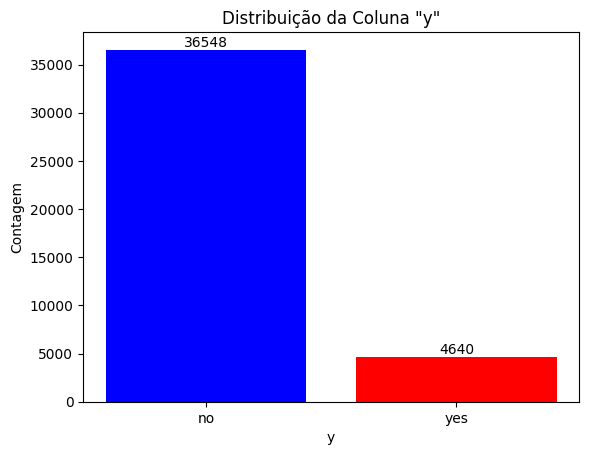

In [ ]:
# Plotando gráfico de colunas para ver a distribuição do Target.
count_targets = df_00['y'].value_counts()

plt.bar(count_targets.index, count_targets.values, color=['blue', 'red'])
plt.xlabel('y')
plt.ylabel('Contagem')
plt.title('Distribuição da Coluna "y"')

for index, value in enumerate(count_targets.values):
    plt.text(index, value + 0.1, str(value), ha='center', va='bottom')

plt.show()

Existem muitos mais casos de clientes que **não** se inscreveram para o depósito a prazo (88,73% da base), o target está um pouco desbalanceado, mas nada que caracterize um evento raro, sendo assim não faremos nenhum tratamento nesse sentido.

<br>

### **Dropando a coluna "duration" do nosso dataset**

- Conforme informado no dicionário dos dados, a variável **`duration`** contém informações sobre o resultado (se o cliente fez ou não um depósito a prazo) e essas informações não estariam disponíveis antes da decisão ser tomada, portanto, incluir essa variável no modelo pode superestimar a capacidade de generalização do modelo. Por esse motivo vamos dropar essa coluna do nosso dataset.


In [ ]:
# Dropando a coluna 'duration'.
df_01 = df_00.drop('duration', axis=1)

df_01.shape

(41188, 20)

In [ ]:
df_01.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no

<br>

### **Transformando as categorias da variável target em números binários**

- Para que os modelos possam ser treinados corretamente e fornecer resultados adequados, é uma boa prática fazer a alteração das categorias para número binário, onde "yes" será igual a 1 e "no" será igual a 0.

In [ ]:
# Transformando as categorias da variável target 'y'.
df_01['y'] = df_01['y'].replace({'no': 0, 'yes': 1}).astype(int)

df_01.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  campaign  pdays  previous     poutcome  emp.var.rate  \
0   may         mon         1    999         0  nonexistent           1.1   
1   may         mon         1    999         0  nonexistent           1.1   
2   may         mon         1    999         0  nonexistent           1.1   
3   may         mon         1    999         0  nonexistent           1.1   
4   may         mon         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
0          93.994          -36.4      4.857       5191.0  0  
1          93.994          -36.4      4.857       5191.0  0  
2          93.994          -36.4      4.857       5191.0  0  
3          93.994          -36.4      4.857       5191.0  0  
4          93.994          -36.4      4.857       5191.0  0

<br>
<br>
<br>
<br>

## **Validação Cruzada tipo Holdout utilizando modo Out-of-Sample**

- A validação cruzada é a divisão do dataset em conjuntos de treino e teste e é de extrema importância para avaliarmos, ajustarmos e selecionarmos os modelos de aprendizado de máquina de forma robusta e confiável, garantindo que eles sejam capazes de generalizar para novos dados e resolver efetivamente o problema em questão. Vamos então separar o nosso dataset em 80% para treino e 20% para teste.

In [ ]:
# Dividindo os dados em conjunto de treinamento e teste (80% treino, 20% teste).
df_treino_00, df_teste_00 = train_test_split(df_01, test_size=0.2, random_state=42)

info_dataframe(df_treino_00, df_teste_00)

              CONJUNTO DE TREINO             

Quantidade de linhas: 32950
Quantidade de colunas: 20

              CONJUNTO DE TESTE              

Quantidade de linhas: 8238
Quantidade de colunas: 20


In [ ]:
df_treino_00.head()

age          job   marital          education  default housing loan  \
12556   40  blue-collar   married           basic.9y  unknown     yes   no   
35451   31       admin.   married  university.degree       no      no   no   
30592   59      retired   married           basic.4y       no      no   no   
17914   43    housemaid  divorced           basic.9y       no     yes   no   
3315    39       admin.    single        high.school  unknown      no   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
12556  telephone   jul         mon         2    999         0  nonexistent   
35451   cellular   may         mon         4    999         0  nonexistent   
30592   cellular   may         mon         6    999         1      failure   
17914   cellular   jul         tue         5    999         0  nonexistent   
3315   telephone   may         thu         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
12556           1.4          93.918          -42.7      4.960       5228.1  0  
35451          -1.8          92.893          -46.2      1.244       5099.1  0  
30592          -1.8          92.893          -46.2      1.354       5099.1  0  
17914           1.4          93.918          -42.7      4.961       5228.1  0  
3315            1.1          93.994          -36.4      4.860       5191.0  0

In [ ]:
df_teste_00.head()

age          job  marital    education  default housing loan  \
32884   57   technician  married  high.school       no      no  yes   
3169    55      unknown  married      unknown  unknown     yes   no   
32206   33  blue-collar  married     basic.9y       no      no   no   
9403    36       admin.  married  high.school       no      no   no   
14020   27    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
32884   cellular   may         mon         1    999         1      failure   
3169   telephone   may         thu         2    999         0  nonexistent   
32206   cellular   may         fri         1    999         1      failure   
9403   telephone   jun         fri         4    999         0  nonexistent   
14020   cellular   jul         fri         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  y  
32884          -1.8          92.893          -46.2      1.299       5099.1  0  
3169            1.1          93.994          -36.4      4.860       5191.0  0  
32206          -1.8          92.893          -46.2      1.313       5099.1  0  
9403            1.4          94.465          -41.8      4.967       5228.1  0  
14020           1.4          93.918          -42.7      4.963       5228.1  0

<br>
<br>
<br>
<br>

## **Preparação dos Dados (DataPrep)**

- A etapa de preparação dos dados (dataprep) é crucial para o sucesso da modelagem de machine learning, pois os dados precisam estar limpos, organizados e em um formato adequado para serem utilizados pelos algoritmos de aprendizado de máquina. Isso inclui garantir a qualidade dos dados, ajustar o formato para atender aos requisitos dos algoritmos, garantir eficiência computacional, promover interpretabilidade e explicabilidade dos modelos e assegurar generalização e robustez.

<br>

### **Visualização dos Metadados**

- A visualização dos metadados nos ajuda a entender melhor os dados, verificar quantidade de valores nulos, cardinalidade das variáveis e também o tipo de cada variável. Essas informações serão importantes nesta etapa de preparação dos dados.

In [ ]:
metadados = generate_metadata(df_treino_00,
                              #ids=[''],
                              targets=['y'],
                              orderby = 'PC_NULOS')

metadados

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  CARDINALIDADE  \
0              age  Explicativa         0       0.0             77   
1              job  Explicativa         0       0.0             12   
2      nr.employed  Explicativa         0       0.0             11   
3        euribor3m  Explicativa         0       0.0            313   
4    cons.conf.idx  Explicativa         0       0.0             26   
5   cons.price.idx  Explicativa         0       0.0             26   
6     emp.var.rate  Explicativa         0       0.0             10   
7         poutcome  Explicativa         0       0.0              3   
8         previous  Explicativa         0       0.0              8   
9            pdays  Explicativa         0       0.0             26   
10        campaign  Explicativa         0       0.0             41   
11     day_of_week  Explicativa         0       0.0              5   
12           month  Explicativa         0       0.0             10   
13         contact  Explicativa         0       0.0              2   
14            loan  Explicativa         0       0.0              3   
15         housing  Explicativa         0       0.0              3   
16         default  Explicativa         0       0.0              3   
17       education  Explicativa         0       0.0              8   
18         marital  Explicativa         0       0.0              4   
19               y       Target         0       0.0              2   

   TIPO_FEATURE  
0         int64  
1        object  
2       float64  
3       float64  
4       float64  
5       float64  
6       float64  
7        object  
8         int64  
9         int64  
10        int64  
11       object  
12       object  
13       object  
14       object  
15       object  
16       object  
17       object  
18       object  
19        int64

Podemos verificar que não existe nunhum valor ausente (missing) no dataset e nenhuma variável com cardinalidade 1, caso contrário essa variável com cardinalidade 1 não seria útil para o treinamento do nosso modelo, pois se trata de uma variável constante, sem variabilidade.

<br>

### **Removendo ID e Target dos nossos datasets**

- Não queremos fazer nenhum tratamento das colunas de ID e Target nesse momento, então é uma boa prática remover as colunas para seguir com o tratamento dos dados. **No caso deste nosso dataset não há coluna de ID**.

In [ ]:
# Dropando a coluna do Target.
df_treino_01 = df_treino_00.drop(axis=1,columns=['y'],inplace=False)
df_teste_01 = df_teste_00.drop(axis=1,columns=['y'],inplace=False)

df_treino_01.shape, df_teste_01.shape

((32950, 19), (8238, 19))

In [ ]:
df_treino_01.head()

age          job   marital          education  default housing loan  \
12556   40  blue-collar   married           basic.9y  unknown     yes   no   
35451   31       admin.   married  university.degree       no      no   no   
30592   59      retired   married           basic.4y       no      no   no   
17914   43    housemaid  divorced           basic.9y       no     yes   no   
3315    39       admin.    single        high.school  unknown      no   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
12556  telephone   jul         mon         2    999         0  nonexistent   
35451   cellular   may         mon         4    999         0  nonexistent   
30592   cellular   may         mon         6    999         1      failure   
17914   cellular   jul         tue         5    999         0  nonexistent   
3315   telephone   may         thu         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
12556           1.4          93.918          -42.7      4.960       5228.1  
35451          -1.8          92.893          -46.2      1.244       5099.1  
30592          -1.8          92.893          -46.2      1.354       5099.1  
17914           1.4          93.918          -42.7      4.961       5228.1  
3315            1.1          93.994          -36.4      4.860       5191.0

In [ ]:
df_teste_01.head()

age          job  marital    education  default housing loan  \
32884   57   technician  married  high.school       no      no  yes   
3169    55      unknown  married      unknown  unknown     yes   no   
32206   33  blue-collar  married     basic.9y       no      no   no   
9403    36       admin.  married  high.school       no      no   no   
14020   27    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
32884   cellular   may         mon         1    999         1      failure   
3169   telephone   may         thu         2    999         0  nonexistent   
32206   cellular   may         fri         1    999         1      failure   
9403   telephone   jun         fri         4    999         0  nonexistent   
14020   cellular   jul         fri         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32884          -1.8          92.893          -46.2      1.299       5099.1  
3169            1.1          93.994          -36.4      4.860       5191.0  
32206          -1.8          92.893          -46.2      1.313       5099.1  
9403            1.4          94.465          -41.8      4.967       5228.1  
14020           1.4          93.918          -42.7      4.963       5228.1

<br>

### **Removendo as variáveis constantes**

- Como dito anteriormente, uma variável constante não possui variabilidade, e os modelos de machine learning precisam de variabilidade nos dados para identificar padrões e fazer previsões precisas, portanto é uma variável inútil para o treinamento do modelo.
- Como vimos anteriormente também, este conjunto de dados não possui nenhuma variável constante para ser removida, **porém para fins didático vamos incluir uma célula simulando uma remoção**.

In [ ]:
# Criando uma lista com as variáveis que têm cardinalidade igual a 1.
drop_vars_const = metadados[(metadados['CARDINALIDADE'] == 1)]
lista_drop_const = list(drop_vars_const.FEATURE.values)

print(Fore.BLUE + '=' * 150)
print('')
print('Variáveis constantes que foram excluídas: ', lista_drop_const)
print('')

# Removendo as variáveis constantes do dataset principal de treino.
df_treino_02 = df_treino_01.drop(axis=1,columns=lista_drop_const)

print('Tamanho do DataFrame: ', df_treino_02.shape)
print('')
print('=' * 150 + Style.RESET_ALL)


Variáveis constantes que foram excluídas:  []

Tamanho do DataFrame:  (32950, 19)



In [ ]:
# Salvando a lista de variáveis dropadas em um arquivo pkl (artefato).
with open('artefatos/prd_drop_const.pkl', 'wb') as f:
    pickle.dump(lista_drop_const, f)

In [ ]:
# Carregando o pkl com a lista de variáveis a serem removidas.
with open('artefatos/prd_drop_const.pkl', 'rb') as f:
    loaded_drop_const = pickle.load(f)

# Aplicando a remoção das variáveis na base de teste.
df_teste_02 = df_teste_01.drop(axis=1, columns=loaded_drop_const)

df_teste_02.shape

(8238, 19)

In [ ]:
df_treino_02.head()

age          job   marital          education  default housing loan  \
12556   40  blue-collar   married           basic.9y  unknown     yes   no   
35451   31       admin.   married  university.degree       no      no   no   
30592   59      retired   married           basic.4y       no      no   no   
17914   43    housemaid  divorced           basic.9y       no     yes   no   
3315    39       admin.    single        high.school  unknown      no   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
12556  telephone   jul         mon         2    999         0  nonexistent   
35451   cellular   may         mon         4    999         0  nonexistent   
30592   cellular   may         mon         6    999         1      failure   
17914   cellular   jul         tue         5    999         0  nonexistent   
3315   telephone   may         thu         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
12556           1.4          93.918          -42.7      4.960       5228.1  
35451          -1.8          92.893          -46.2      1.244       5099.1  
30592          -1.8          92.893          -46.2      1.354       5099.1  
17914           1.4          93.918          -42.7      4.961       5228.1  
3315            1.1          93.994          -36.4      4.860       5191.0

In [ ]:
df_teste_02.head()

age          job  marital    education  default housing loan  \
32884   57   technician  married  high.school       no      no  yes   
3169    55      unknown  married      unknown  unknown     yes   no   
32206   33  blue-collar  married     basic.9y       no      no   no   
9403    36       admin.  married  high.school       no      no   no   
14020   27    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
32884   cellular   may         mon         1    999         1      failure   
3169   telephone   may         thu         2    999         0  nonexistent   
32206   cellular   may         fri         1    999         1      failure   
9403   telephone   jun         fri         4    999         0  nonexistent   
14020   cellular   jul         fri         2    999         0  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32884          -1.8          92.893          -46.2      1.299       5099.1  
3169            1.1          93.994          -36.4      4.860       5191.0  
32206          -1.8          92.893          -46.2      1.313       5099.1  
9403            1.4          94.465          -41.8      4.967       5228.1  
14020           1.4          93.918          -42.7      4.963       5228.1

<br>

### **Tratamento dos Valores Nulos (missings)**

- **Remover colunas:** Geralmente costumo optar por dropar variáveis com mais de 80% de valores nulos, pois essas variáveis não costumam ser significativas para o treinamento do nosso modelo.

- **Fazer imputação de valor:** Para variáveis com menos de 80% de valores nulos, eu costumo imputar a média em todas as colunas numéricas com valores nulos e fazer a imputação da palavra "VERIFICAR" para as categóricas.
<br>

  **Observação:** Esse nosso dataset de estudo **não possui valores nulos, sendo assim não será necessário fazer nenhuma limpeza ou transformação**, porém para fins didáticos, irei incluir abaixo os comandos que seriam utilizados caso houvessem valores nulos.

#### **Removendo colunas com mais de 80% de valores nulos**

In [ ]:
# Determinando o limite de valores nulos.
missing_cutoff = 80

# Definindo a variável com valor nulo igual ou acima de 80% e gravando ela em uma lista.
drop_vars_nulos = metadados[(metadados['PC_NULOS'] >= missing_cutoff)]
lista_drop_vars = list(drop_vars_nulos.FEATURE.values)

print(Fore.BLUE + '=' * 150)
print('')
print('Variáveis que foram excluídas por alto percentual de nulos: ', lista_drop_vars)
print('')

# Retirando a lista de variáveis com alto percentual de nulos.
df_treino_03 = df_treino_02.drop(axis=1,columns=lista_drop_vars)

print('Tamanho do DataFrame: ', df_treino_03.shape)
print('')
print('=' * 150 + Style.RESET_ALL)


Variáveis que foram excluídas por alto percentual de nulos:  []

Tamanho do DataFrame:  (32950, 19)



In [ ]:
# Salvando a lista de variáveis dropadas em um arquivo pkl (artefato).
with open('artefatos/prd_drop_nullvars.pkl', 'wb') as f:
    pickle.dump(lista_drop_vars, f)

In [ ]:
# Carregando o pkl com a lista de variáveis a serem removidas.
with open('artefatos/prd_drop_nullvars.pkl', 'rb') as f:
    loaded_drop_nullvars = pickle.load(f)

# Aplicando a remoção das variáveis na base de teste.
df_teste_03 = df_teste_02.drop(axis=1, columns=loaded_drop_nullvars)

df_teste_03.shape

(8238, 19)

#### **Preenchimento dos valores nulos**

In [ ]:
# Chamando a função para preenchimento dos valores nulos na tabela de treino.
df_treino_04, means = custom_fillna(df_treino_03)

# Salvando a substituição de nulos em um arquivo pkl (artefato).
with open('artefatos/prd_fillna.pkl', 'wb') as f:
  pickle.dump(means, f)

In [ ]:
df_treino_04.shape

(32950, 19)

In [ ]:
metadados = generate_metadata(df_treino_04,
                                          targets=['y'],
                                          orderby = 'PC_NULOS')

metadados

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  CARDINALIDADE  \
0              age  Explicativa         0       0.0             77   
1         campaign  Explicativa         0       0.0             41   
2        euribor3m  Explicativa         0       0.0            313   
3    cons.conf.idx  Explicativa         0       0.0             26   
4   cons.price.idx  Explicativa         0       0.0             26   
5     emp.var.rate  Explicativa         0       0.0             10   
6         poutcome  Explicativa         0       0.0              3   
7         previous  Explicativa         0       0.0              8   
8            pdays  Explicativa         0       0.0             26   
9      day_of_week  Explicativa         0       0.0              5   
10             job  Explicativa         0       0.0             12   
11           month  Explicativa         0       0.0             10   
12         contact  Explicativa         0       0.0              2   
13            loan  Explicativa         0       0.0              3   
14         housing  Explicativa         0       0.0              3   
15         default  Explicativa         0       0.0              3   
16       education  Explicativa         0       0.0              8   
17         marital  Explicativa         0       0.0              4   
18     nr.employed  Explicativa         0       0.0             11   

   TIPO_FEATURE  
0         int64  
1         int64  
2       float64  
3       float64  
4       float64  
5       float64  
6        object  
7         int64  
8         int64  
9        object  
10       object  
11       object  
12       object  
13       object  
14       object  
15       object  
16       object  
17       object  
18      float64

In [ ]:
# Carregando o pkl com a lista de variáveis e médias a serem preenchidas.
with open('artefatos/prd_fillna.pkl', 'rb') as f:
  loaded_means = pickle.load(f)

# Chamando a função para preenchimento dos valores nulos na base de teste.
df_teste_04 = custom_fillna_prod(df_teste_03, loaded_means)

df_teste_04.shape

(8238, 19)

<br>

### **Tratamento das Variáveis Numéricas**

- Esse tratamento é crucial para garantir que todas as variáveis tenham a mesma escala, facilitando a convergência do algoritmo, prevenindo problemas numéricos e assegurando a igualdade de importância entre as variáveis, o que pode melhorar significativamente o desempenho e a interpretação do modelo.

- Existem diversas técnicas que podem ser usadas para esse tratamento, porém para esse projeto vou exemplificar duas delas:
  - **Normalização (MinMax Scaler):** Redimensiona os valores das variáveis para um intervalo específico, geralmente entre 0 e 1. Isso é feito subtraindo o valor mínimo e dividindo pela amplitude (diferença entre o máximo e o mínimo).

  - **Padronização (Standard Scaler):** Transforma os valores das variáveis para que tenham uma média zero e um desvio padrão de 1. Isso é feito subtraindo a média e dividindo pelo desvio padrão.

- A escolha entre normalização e padronização depende do algoritmo específico que você está usando e das características dos seus dados. Em geral, a padronização é mais robusta e geralmente funciona bem em uma variedade de algoritmos e variáveis com distribuição normal. No entanto, é sempre uma boa prática experimentar ambas as técnicas e avaliar o desempenho do modelo.

- Para esse nosso projeto vou aplicar as duas opções (em versões de datasets diferentes), porém iremos seguir com a Padronização.
<br>

  **Vale ressaltar:** Algoritmos baseados em árvores de decisão não são sensíveis à escala das variáveis. Eles tomam decisões com base em comparações de valores em diferentes variáveis e nós de divisão na árvore, são escolhidos independentemente das escalas das variáveis. Portanto, não é necessário padronizar ou normalizar as variáveis para esses algoritmos.


#### **Checagem de variáveis dummy**

- Primeiramente vamos checar se existem variáveis com valores binários (0 ou 1), pois nesses casos não é necessário nenhum tratamento, somente checar se são do tipo numérico.

In [ ]:
lista_dummy = []

verificar_dummy(df_treino_04, lista_dummy)

   Feature       Registros_Unicos    Tipo
0  contact  [telephone, cellular]  object


Lista de Variáveis Dummy: []



Nesse dataset não há variáveis dummy, além da variável target que já separamos anteriormente.

#### **Aplicando a Normalização (MinMax Scaler) - Somente para exemplificar**

In [ ]:
# Fazendo uma cópia do dataset de treino e teste.
df_treino_normal = df_treino_04.copy()
df_teste_normal = df_teste_04.copy()

df_treino_normal.shape, df_teste_normal.shape

((32950, 19), (8238, 19))

In [ ]:
# Instanciando o scaler.
scaler = MinMaxScaler()

# Selecionando colunas numéricas.
numeric_cols_all_n = df_treino_normal.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Excluindo as variáveis dummy.
numeric_cols_n = [col for col in numeric_cols_all_n if col not in lista_dummy]

# Aplicando a normalização.
df_treino_normal[numeric_cols_n] = scaler.fit_transform(df_treino_normal[numeric_cols_n])

df_treino_normal.shape

(32950, 19)

In [ ]:
df_treino_normal.head()

age          job   marital          education  default housing  \
12556  0.283951  blue-collar   married           basic.9y  unknown     yes   
35451  0.172840       admin.   married  university.degree       no      no   
30592  0.518519      retired   married           basic.4y       no      no   
17914  0.320988    housemaid  divorced           basic.9y       no     yes   
3315   0.271605       admin.    single        high.school  unknown      no   

      loan    contact month day_of_week  campaign  pdays  previous  \
12556   no  telephone   jul         mon  0.018182    1.0  0.000000   
35451   no   cellular   may         mon  0.054545    1.0  0.000000   
30592   no   cellular   may         mon  0.090909    1.0  0.142857   
17914   no   cellular   jul         tue  0.072727    1.0  0.000000   
3315    no  telephone   may         thu  0.018182    1.0  0.000000   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
12556  nonexistent      1.000000        0.669135       0.338912   0.980730   
35451  nonexistent      0.333333        0.269680       0.192469   0.138291   
30592      failure      0.333333        0.269680       0.192469   0.163228   
17914  nonexistent      1.000000        0.669135       0.338912   0.980957   
3315   nonexistent      0.937500        0.698753       0.602510   0.958059   

       nr.employed  
12556     1.000000  
35451     0.512287  
30592     0.512287  
17914     1.000000  
3315      0.859735

In [ ]:
# Salvando o scaler em um arquivo pkl (artefato).
with open('artefatos/prd_scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

In [ ]:
# Carregando o scaler.
with open('artefatos/prd_scaler.pkl', 'rb') as f:
    loaded_scaler = pickle.load(f)

# Aplicando o scaler na base de teste.
df_teste_normal[numeric_cols_n] = loaded_scaler.transform(df_teste_normal[numeric_cols_n])

df_teste_normal.shape

(8238, 19)

In [ ]:
df_teste_normal.head()

age          job  marital    education  default housing loan  \
32884  0.493827   technician  married  high.school       no      no  yes   
3169   0.469136      unknown  married      unknown  unknown     yes   no   
32206  0.197531  blue-collar  married     basic.9y       no      no   no   
9403   0.234568       admin.  married  high.school       no      no   no   
14020  0.123457    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign  pdays  previous     poutcome  \
32884   cellular   may         mon  0.000000    1.0  0.142857      failure   
3169   telephone   may         thu  0.018182    1.0  0.000000  nonexistent   
32206   cellular   may         fri  0.000000    1.0  0.142857      failure   
9403   telephone   jun         fri  0.054545    1.0  0.000000  nonexistent   
14020   cellular   jul         fri  0.018182    1.0  0.000000  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32884      0.333333        0.269680       0.192469   0.150759     0.512287  
3169       0.937500        0.698753       0.602510   0.958059     0.859735  
32206      0.333333        0.269680       0.192469   0.153933     0.512287  
9403       1.000000        0.882307       0.376569   0.982317     1.000000  
14020      1.000000        0.669135       0.338912   0.981410     1.000000

#### **Aplicando a Padronização (Standard Scaler)**

In [ ]:
# Fazendo uma cópia do dataset de treino e teste.
df_treino_05 = df_treino_04.copy()
df_teste_05 = df_teste_04.copy()

df_treino_05.shape, df_teste_05.shape

((32950, 19), (8238, 19))

In [ ]:
# Instanciando o std scaler.
std_scaler = StandardScaler()

# Selecionando colunas numéricas.
numeric_cols_all = df_treino_05.select_dtypes(include=['float64', 'int64', 'int32']).columns

# Excluindo as variáveis dummy.
numeric_cols = [col for col in numeric_cols_all if col not in lista_dummy]

# Aplicando a padronização.
df_treino_05[numeric_cols] = std_scaler.fit_transform(df_treino_05[numeric_cols])

df_treino_05.shape

(32950, 19)

In [ ]:
df_treino_05.head()

age          job   marital          education  default housing  \
12556 -0.001669  blue-collar   married           basic.9y  unknown     yes   
35451 -0.864095       admin.   married  university.degree       no      no   
30592  1.819007      retired   married           basic.4y       no      no   
17914  0.285806    housemaid  divorced           basic.9y       no     yes   
3315  -0.097494       admin.    single        high.school  unknown      no   

      loan    contact month day_of_week  campaign     pdays  previous  \
12556   no  telephone   jul         mon -0.206242  0.194661 -0.350902   
35451   no   cellular   may         mon  0.513676  0.194661 -0.350902   
30592   no   cellular   may         mon  1.233593  0.194661  1.677559   
17914   no   cellular   jul         tue  0.873635  0.194661 -0.350902   
3315    no  telephone   may         thu -0.206242  0.194661 -0.350902   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
12556  nonexistent      0.838794        0.589080      -0.472769   0.771354   
35451  nonexistent     -1.199440       -1.180760      -1.229916  -1.372028   
30592      failure     -1.199440       -1.180760      -1.229916  -1.308581   
17914  nonexistent      0.838794        0.589080      -0.472769   0.771930   
3315   nonexistent      0.647709        0.720307       0.890097   0.713674   

       nr.employed  
12556     0.843165  
35451    -0.939748  
30592    -0.939748  
17914     0.843165  
3315      0.330405

In [ ]:
# Salvando o std scaler em um arquivo .pkl (artefato).
with open('artefatos/prd_std_scaler.pkl', 'wb') as f:
    pickle.dump(std_scaler, f)

In [ ]:
# Carregando o std scaler.
with open('artefatos/prd_std_scaler.pkl', 'rb') as f:
    loaded_std_scaler = pickle.load(f)

# Aplicando o std scaler na base de teste.
df_teste_05[numeric_cols] = loaded_std_scaler.transform(df_teste_05[numeric_cols])

df_teste_05.shape

(8238, 19)

In [ ]:
df_teste_05.head()

age          job  marital    education  default housing loan  \
32884  1.627357   technician  married  high.school       no      no  yes   
3169   1.435707      unknown  married      unknown  unknown     yes   no   
32206 -0.672445  blue-collar  married     basic.9y       no      no   no   
9403  -0.384970       admin.  married  high.school       no      no   no   
14020 -1.247395    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign     pdays  previous     poutcome  \
32884   cellular   may         mon -0.566200  0.194661  1.677559      failure   
3169   telephone   may         thu -0.206242  0.194661 -0.350902  nonexistent   
32206   cellular   may         fri -0.566200  0.194661  1.677559      failure   
9403   telephone   jun         fri  0.513676  0.194661 -0.350902  nonexistent   
14020   cellular   jul         fri -0.206242  0.194661 -0.350902  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32884     -1.199440       -1.180760      -1.229916  -1.340304    -0.939748  
3169       0.647709        0.720307       0.890097   0.713674     0.330405  
32206     -1.199440       -1.180760      -1.229916  -1.332229    -0.939748  
9403       0.838794        1.533570      -0.278074   0.775391     0.843165  
14020      0.838794        0.589080      -0.472769   0.773084     0.843165

<br>

### **Tratamento das Variáveis Categóricas**

- O tratamento de variáveis categóricas é crucial para a modelagem de machine learning, pois os algoritmos geralmente requerem entradas numéricas. Essas técnicas garantem que os algoritmos possam processar eficazmente informações categóricas, melhorando a precisão e o desempenho do modelo.

- Existem diversas técnicas que podem ser usadas para esse tratamento, porém para esse projeto irei usar apenas duas delas:
  - **One-Hot Encoding:** Converte variáveis categóricas em vetores binários, permitindo que o modelo interprete as diferentes categorias como características distintas.

  - **Label Encoding:** Transforma cada categoria em um valor numérico único, útil em algoritmos que se beneficiam de uma relação ordinal entre as categorias, porém não recomendado para variáveis que não possuem sentido de ordem.
  
  No caso do One-Hot Encoding, quando a variável possui muitas categorias distintas, o número de novas colunas criadas pode ser muito grande, o que não é uma boa prática, então nos casos de variáveis com cardinalidade maior que 20, vou aplicar o Label Encoding.
<br>

  **Vale ressaltar:** Algoritmos baseados em árvores (Árvore de Decisão; Random Forest; Gradient Boosting; XGBoost; LightGBM e CatBoost) podem lidar diretamente com variáveis categóricas sem a necessidade de codificação. Eles podem particionar os dados com base nos valores das variáveis categóricas sem a necessidade de transformá-los em números. Portanto, a aplicação de One-Hot Encoding ou Label Encoding pode ser desnecessária ou acabar prejudicando o modelo.

In [ ]:
metadados = generate_metadata(df_treino_05,
                                          targets=['y'],
                                          orderby = 'CARDINALIDADE')

metadados

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  CARDINALIDADE  \
0        euribor3m  Explicativa         0       0.0            313   
1              age  Explicativa         0       0.0             77   
2         campaign  Explicativa         0       0.0             41   
3    cons.conf.idx  Explicativa         0       0.0             26   
4   cons.price.idx  Explicativa         0       0.0             26   
5            pdays  Explicativa         0       0.0             26   
6              job  Explicativa         0       0.0             12   
7      nr.employed  Explicativa         0       0.0             11   
8            month  Explicativa         0       0.0             10   
9     emp.var.rate  Explicativa         0       0.0             10   
10        previous  Explicativa         0       0.0              8   
11       education  Explicativa         0       0.0              8   
12     day_of_week  Explicativa         0       0.0              5   
13         marital  Explicativa         0       0.0              4   
14            loan  Explicativa         0       0.0              3   
15         housing  Explicativa         0       0.0              3   
16        poutcome  Explicativa         0       0.0              3   
17         default  Explicativa         0       0.0              3   
18         contact  Explicativa         0       0.0              2   

   TIPO_FEATURE  
0       float64  
1       float64  
2       float64  
3       float64  
4       float64  
5       float64  
6        object  
7       float64  
8        object  
9       float64  
10      float64  
11       object  
12       object  
13       object  
14       object  
15       object  
16       object  
17       object  
18       object

#### **Tratamento de variáveis categóricas de alta cardinalidade (Label Encoding)**
- Somente para fins didáticos, pois nesse caso não há nenhuma variável categórica com cardinalidade maior que 20.

In [ ]:
# Definindo a cardinalidade mínima.
card_cutoff = 20

# Verificando as variáveis com alta cardinalidade e salvado elas em uma lista.
categ_labelenc = metadados[(metadados['CARDINALIDADE'] > card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_lenc = list(categ_labelenc.FEATURE.values)

# Criando uma lista combinada das variáveis que foram dropadas.
lista_drop_total = lista_drop_vars + lista_drop_const

# Iterando sobre a lista combinada e removendo as variáveis necessárias.
for item in lista_drop_total:
    if item in lista_lenc:
        lista_lenc.remove(item)

print(Fore.BLUE + '=' * 150)
print('')
print('Lista de variáveis para o Label Encoding: ', lista_lenc)
print('')
print('=' * 150 + Style.RESET_ALL)


Lista de variáveis para o Label Encoding:  []



In [ ]:
# Fazendo uma cópia do dataset de treino e teste.
df_treino_06 = df_treino_05.copy()
df_teste_06 = df_teste_05.copy()

df_treino_06.shape, df_teste_06.shape

((32950, 19), (8238, 19))

In [ ]:
# Criando um dicionário vazio.
encoders = {}

# Iterando para o encoding.
for col in lista_lenc:
    encoder = LabelEncoder()
    df_treino_06[col] = encoder.fit_transform(df_treino_06[col])

    # Armazenando o encoder para a coluna atual em um dicionário.
    encoders[col] = encoder

# Salvando o dicionário de encoders e a lista de colunas em um arquivo pkl (artefato).
labelenc_to_serialize = {
    'encoders': encoders,
    'columns': lista_lenc
}

with open('artefatos/prd_labelenc.pkl', 'wb') as f:
    pickle.dump(labelenc_to_serialize, f)

df_treino_06.shape

(32950, 19)

In [ ]:
df_treino_06.head()

age          job   marital          education  default housing  \
12556 -0.001669  blue-collar   married           basic.9y  unknown     yes   
35451 -0.864095       admin.   married  university.degree       no      no   
30592  1.819007      retired   married           basic.4y       no      no   
17914  0.285806    housemaid  divorced           basic.9y       no     yes   
3315  -0.097494       admin.    single        high.school  unknown      no   

      loan    contact month day_of_week  campaign     pdays  previous  \
12556   no  telephone   jul         mon -0.206242  0.194661 -0.350902   
35451   no   cellular   may         mon  0.513676  0.194661 -0.350902   
30592   no   cellular   may         mon  1.233593  0.194661  1.677559   
17914   no   cellular   jul         tue  0.873635  0.194661 -0.350902   
3315    no  telephone   may         thu -0.206242  0.194661 -0.350902   

          poutcome  emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
12556  nonexistent      0.838794        0.589080      -0.472769   0.771354   
35451  nonexistent     -1.199440       -1.180760      -1.229916  -1.372028   
30592      failure     -1.199440       -1.180760      -1.229916  -1.308581   
17914  nonexistent      0.838794        0.589080      -0.472769   0.771930   
3315   nonexistent      0.647709        0.720307       0.890097   0.713674   

       nr.employed  
12556     0.843165  
35451    -0.939748  
30592    -0.939748  
17914     0.843165  
3315      0.330405

In [ ]:
# Carregando os encoders e a lista de colunas.
with open('artefatos/prd_labelenc.pkl', 'rb') as f:
    loaded_labelenc = pickle.load(f)

loaded_encoders = loaded_labelenc['encoders']
loaded_columns = loaded_labelenc['columns']

# Aplicando o label encoding na base de teste.
for col in loaded_columns:
    if col in loaded_encoders:
        # Transforma a coluna usando o encoder carregado.
        df_teste_06[col] = loaded_encoders[col].transform(df_teste_06[col])

df_teste_06.shape

(8238, 19)

In [ ]:
df_teste_06.head()

age          job  marital    education  default housing loan  \
32884  1.627357   technician  married  high.school       no      no  yes   
3169   1.435707      unknown  married      unknown  unknown     yes   no   
32206 -0.672445  blue-collar  married     basic.9y       no      no   no   
9403  -0.384970       admin.  married  high.school       no      no   no   
14020 -1.247395    housemaid  married  high.school       no     yes   no   

         contact month day_of_week  campaign     pdays  previous     poutcome  \
32884   cellular   may         mon -0.566200  0.194661  1.677559      failure   
3169   telephone   may         thu -0.206242  0.194661 -0.350902  nonexistent   
32206   cellular   may         fri -0.566200  0.194661  1.677559      failure   
9403   telephone   jun         fri  0.513676  0.194661 -0.350902  nonexistent   
14020   cellular   jul         fri -0.206242  0.194661 -0.350902  nonexistent   

       emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  nr.employed  
32884     -1.199440       -1.180760      -1.229916  -1.340304    -0.939748  
3169       0.647709        0.720307       0.890097   0.713674     0.330405  
32206     -1.199440       -1.180760      -1.229916  -1.332229    -0.939748  
9403       0.838794        1.533570      -0.278074   0.775391     0.843165  
14020      0.838794        0.589080      -0.472769   0.773084     0.843165

#### **Tratamento de variáveis categóricas de baixa cardinalidade (One-Hot Encoding)**
- Primeiro vamos analisar se a variável é ordinal ou nominal. Se a variável for ordinal, vamos usar o Label Encoding, para manter a ordenação. Se for nominal, vamos usar o One-Hot Encoding, justamente para não dar esse sentido de ordem para as categorias.

In [ ]:
# Filtrando as variáveis categóricas com cardinalidade igual ou menor que 20, para ter uma visão e analise delas.
filtered_metadata = metadados[(metadados['CARDINALIDADE'] <= card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]

filtered_metadata

FEATURE  USO_FEATURE  QT_NULOS  PC_NULOS  CARDINALIDADE TIPO_FEATURE
6           job  Explicativa         0       0.0             12       object
8         month  Explicativa         0       0.0             10       object
11    education  Explicativa         0       0.0              8       object
12  day_of_week  Explicativa         0       0.0              5       object
13      marital  Explicativa         0       0.0              4       object
14         loan  Explicativa         0       0.0              3       object
15      housing  Explicativa         0       0.0              3       object
16     poutcome  Explicativa         0       0.0              3       object
17      default  Explicativa         0       0.0              3       object
18      contact  Explicativa         0       0.0              2       object

In [ ]:
# Verificando as categorias da coluna "education".
df_treino_06['education'].unique()

array(['basic.9y', 'university.degree', 'basic.4y', 'high.school',
       'professional.course', 'basic.6y', 'unknown', 'illiterate'],
      dtype=object)

Das variáveis analisadas acima, a única que poderia apresentar um sentido de ordenação seria 'education', porém para simplificar, **vamos aplicar o One-Hot Encoding para todas elas**, avaliar o modelo e posteriormente podemos fazer a transformação dessa variável com Label Encoding e verificar se melhora a performance do modelo base.

In [ ]:
# Definindo a cardinalidade máxima.
card_cutoff = 20

# Verificando as variáveis com baixa cardinalidade e salvado elas em uma lista.
categ_onehot = metadados[(metadados['CARDINALIDADE'] <= card_cutoff) & (metadados['TIPO_FEATURE'] == 'object')]
lista_onehot = list(categ_onehot.FEATURE.values)

# Iterando sobre as listas criadas.
for item in lista_drop_total:
    if item in lista_onehot:
        lista_onehot.remove(item)

print(Fore.BLUE + '=' * 150)
print('')
print('Lista de variáveis para o OneHot Encoding: ', lista_onehot)
print('')
print('=' * 150 + Style.RESET_ALL)


Lista de variáveis para o OneHot Encoding:  ['job', 'month', 'education', 'day_of_week', 'marital', 'loan', 'housing', 'poutcome', 'default', 'contact']



In [ ]:
# Fazendo uma cópia do dataset de treino e teste.
df_treino_07 = df_treino_06.copy()
df_teste_07 = df_teste_06.copy()

df_treino_07.shape, df_teste_07.shape

((32950, 19), (8238, 19))

In [ ]:
# Instanciando o encoder.
encoder_onehot = OneHotEncoder(drop='first', sparse_output=False, handle_unknown='ignore')

# Aplicando o one-hot encoding.
encoded_data = encoder_onehot.fit_transform(df_treino_07[lista_onehot])
encoded_cols = encoder_onehot.get_feature_names_out(lista_onehot)
encoded_df = pd.DataFrame(encoded_data, columns=encoded_cols, index=df_treino_07.index)

df_treino_07 = pd.concat([df_treino_07.drop(lista_onehot, axis=1), encoded_df], axis=1)

# Salvando o encoder e a lista de colunas em um arquivo pkl (artefato).
onehot_to_serialize = {
    'encoder': encoder_onehot,
    'columns': lista_onehot
}

with open('artefatos/prd_onehotenc.pkl', 'wb') as f:
    pickle.dump(onehot_to_serialize, f)

df_treino_07.shape

(32950, 52)

In [ ]:
df_treino_07.head()

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
12556 -0.001669 -0.206242  0.194661 -0.350902      0.838794        0.589080   
35451 -0.864095  0.513676  0.194661 -0.350902     -1.199440       -1.180760   
30592  1.819007  1.233593  0.194661  1.677559     -1.199440       -1.180760   
17914  0.285806  0.873635  0.194661 -0.350902      0.838794        0.589080   
3315  -0.097494 -0.206242  0.194661 -0.350902      0.647709        0.720307   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
12556      -0.472769   0.771354     0.843165              1.0   
35451      -1.229916  -1.372028    -0.939748              0.0   
30592      -1.229916  -1.308581    -0.939748              0.0   
17914      -0.472769   0.771930     0.843165              0.0   
3315        0.890097   0.713674     0.330405              0.0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
12556               0.0            0.0             0.0          0.0   
35451               0.0            0.0             0.0          0.0   
30592               0.0            0.0             0.0          1.0   
17914               0.0            1.0             0.0          0.0   
3315                0.0            0.0             0.0          0.0   

       job_self-employed  job_services  job_student  job_technician  \
12556                0.0           0.0          0.0             0.0   
35451                0.0           0.0          0.0             0.0   
30592                0.0           0.0          0.0             0.0   
17914                0.0           0.0          0.0             0.0   
3315                 0.0           0.0          0.0             0.0   

       job_unemployed  job_unknown  month_aug  month_dec  month_jul  \
12556             0.0          0.0        0.0        0.0        1.0   
35451             0.0          0.0        0.0        0.0        0.0   
30592             0.0          0.0        0.0        0.0        0.0   
17914             0.0          0.0        0.0        0.0        1.0   
3315              0.0          0.0        0.0        0.0        0.0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
12556        0.0        0.0        0.0        0.0        0.0        0.0   
35451        0.0        0.0        1.0        0.0        0.0        0.0   
30592        0.0        0.0        1.0        0.0        0.0        0.0   
17914        0.0        0.0        0.0        0.0        0.0        0.0   
3315         0.0        0.0        1.0        0.0        0.0        0.0   

       education_basic.6y  education_basic.9y  education_high.school  \
12556                 0.0                 1.0                    0.0   
35451                 0.0                 0.0                    0.0   
30592                 0.0                 0.0                    0.0   
17914                 0.0                 1.0                    0.0   
3315                  0.0                 0.0                    1.0   

       education_illiterate  education_professional.course  \
12556                   0.0                            0.0   
35451                   0.0                            0.0   
30592                   0.0                            0.0   
17914                   0.0                            0.0   
3315                    0.0                            0.0   

       education_university.degree  education_unknown  day_of_week_mon  \
12556                          0.0                0.0              1.0   
35451                          1.0                0.0              1.0   
30592                          0.0                0.0              1.0   
17914                          0.0                0.0              0.0   
3315                           0.0                0.0              0.0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  marital_married  \
12556              0.0              0.0              0.0              1.0   
35451    

In [ ]:
# Carregando o encoder e a lista de colunas.
with open('artefatos/prd_onehotenc.pkl', 'rb') as f:
    loaded_onehot = pickle.load(f)

loaded_encoder_onehot = loaded_onehot['encoder']
loaded_columns_onehot = loaded_onehot['columns']

# Aplicando o label encoding na base de teste.
encoded_data_onehot = loaded_encoder_onehot.transform(df_teste_07[loaded_columns_onehot])
encoded_cols_onehot = loaded_encoder_onehot.get_feature_names_out(loaded_columns_onehot)
encoded_df_onehot = pd.DataFrame(encoded_data_onehot, columns=encoded_cols_onehot, index=df_teste_07.index)

df_teste_07 = pd.concat([df_teste_07.drop(loaded_columns_onehot, axis=1), encoded_df_onehot], axis=1)

df_teste_07.shape

(8238, 52)

In [ ]:
df_teste_07.head()

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
32884  1.627357 -0.566200  0.194661  1.677559     -1.199440       -1.180760   
3169   1.435707 -0.206242  0.194661 -0.350902      0.647709        0.720307   
32206 -0.672445 -0.566200  0.194661  1.677559     -1.199440       -1.180760   
9403  -0.384970  0.513676  0.194661 -0.350902      0.838794        1.533570   
14020 -1.247395 -0.206242  0.194661 -0.350902      0.838794        0.589080   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
32884      -1.229916  -1.340304    -0.939748              0.0   
3169        0.890097   0.713674     0.330405              0.0   
32206      -1.229916  -1.332229    -0.939748              1.0   
9403       -0.278074   0.775391     0.843165              0.0   
14020      -0.472769   0.773084     0.843165              0.0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
32884               0.0            0.0             0.0          0.0   
3169                0.0            0.0             0.0          0.0   
32206               0.0            0.0             0.0          0.0   
9403                0.0            0.0             0.0          0.0   
14020               0.0            1.0             0.0          0.0   

       job_self-employed  job_services  job_student  job_technician  \
32884                0.0           0.0          0.0             1.0   
3169                 0.0           0.0          0.0             0.0   
32206                0.0           0.0          0.0             0.0   
9403                 0.0           0.0          0.0             0.0   
14020                0.0           0.0          0.0             0.0   

       job_unemployed  job_unknown  month_aug  month_dec  month_jul  \
32884             0.0          0.0        0.0        0.0        0.0   
3169              0.0          1.0        0.0        0.0        0.0   
32206             0.0          0.0        0.0        0.0        0.0   
9403              0.0          0.0        0.0        0.0        0.0   
14020             0.0          0.0        0.0        0.0        1.0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
32884        0.0        0.0        1.0        0.0        0.0        0.0   
3169         0.0        0.0        1.0        0.0        0.0        0.0   
32206        0.0        0.0        1.0        0.0        0.0        0.0   
9403         1.0        0.0        0.0        0.0        0.0        0.0   
14020        0.0        0.0        0.0        0.0        0.0        0.0   

       education_basic.6y  education_basic.9y  education_high.school  \
32884                 0.0                 0.0                    1.0   
3169                  0.0                 0.0                    0.0   
32206                 0.0                 1.0                    0.0   
9403                  0.0                 0.0                    1.0   
14020                 0.0                 0.0                    1.0   

       education_illiterate  education_professional.course  \
32884                   0.0                            0.0   
3169                    0.0                            0.0   
32206                   0.0                            0.0   
9403                    0.0                            0.0   
14020                   0.0                            0.0   

       education_university.degree  education_unknown  day_of_week_mon  \
32884                          0.0                0.0              1.0   
3169                           0.0                1.0              0.0   
32206                          0.0                0.0              0.0   
9403                           0.0                0.0              0.0   
14020                          0.0                0.0              0.0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  marital_married  \
32884              0.0              0.0              0.0              1.0   
3169     

<br>

### **Compondo a ABT tratada**

- Nessa etapa vamos apenas trazer a variável target "y" novamente para a nossa ABT, após feito o tratamento, e salvar ela no diretório.

In [ ]:
# Fazendo o merge do target para a nossa tabela de treino e teste.
df_treino_08 = df_treino_07.merge(df_treino_00[['y']], left_index=True, right_index=True, how='inner')
df_teste_08 = df_teste_07.merge(df_teste_00[['y']], left_index=True, right_index=True, how='inner')

info_dataframe(df_treino_08, df_teste_08)

              CONJUNTO DE TREINO             

Quantidade de linhas: 32950
Quantidade de colunas: 53

              CONJUNTO DE TESTE              

Quantidade de linhas: 8238
Quantidade de colunas: 53


In [ ]:
df_treino_08.head()

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
12556 -0.001669 -0.206242  0.194661 -0.350902      0.838794        0.589080   
35451 -0.864095  0.513676  0.194661 -0.350902     -1.199440       -1.180760   
30592  1.819007  1.233593  0.194661  1.677559     -1.199440       -1.180760   
17914  0.285806  0.873635  0.194661 -0.350902      0.838794        0.589080   
3315  -0.097494 -0.206242  0.194661 -0.350902      0.647709        0.720307   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
12556      -0.472769   0.771354     0.843165              1.0   
35451      -1.229916  -1.372028    -0.939748              0.0   
30592      -1.229916  -1.308581    -0.939748              0.0   
17914      -0.472769   0.771930     0.843165              0.0   
3315        0.890097   0.713674     0.330405              0.0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
12556               0.0            0.0             0.0          0.0   
35451               0.0            0.0             0.0          0.0   
30592               0.0            0.0             0.0          1.0   
17914               0.0            1.0             0.0          0.0   
3315                0.0            0.0             0.0          0.0   

       job_self-employed  job_services  job_student  job_technician  \
12556                0.0           0.0          0.0             0.0   
35451                0.0           0.0          0.0             0.0   
30592                0.0           0.0          0.0             0.0   
17914                0.0           0.0          0.0             0.0   
3315                 0.0           0.0          0.0             0.0   

       job_unemployed  job_unknown  month_aug  month_dec  month_jul  \
12556             0.0          0.0        0.0        0.0        1.0   
35451             0.0          0.0        0.0        0.0        0.0   
30592             0.0          0.0        0.0        0.0        0.0   
17914             0.0          0.0        0.0        0.0        1.0   
3315              0.0          0.0        0.0        0.0        0.0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
12556        0.0        0.0        0.0        0.0        0.0        0.0   
35451        0.0        0.0        1.0        0.0        0.0        0.0   
30592        0.0        0.0        1.0        0.0        0.0        0.0   
17914        0.0        0.0        0.0        0.0        0.0        0.0   
3315         0.0        0.0        1.0        0.0        0.0        0.0   

       education_basic.6y  education_basic.9y  education_high.school  \
12556                 0.0                 1.0                    0.0   
35451                 0.0                 0.0                    0.0   
30592                 0.0                 0.0                    0.0   
17914                 0.0                 1.0                    0.0   
3315                  0.0                 0.0                    1.0   

       education_illiterate  education_professional.course  \
12556                   0.0                            0.0   
35451                   0.0                            0.0   
30592                   0.0                            0.0   
17914                   0.0                            0.0   
3315                    0.0                            0.0   

       education_university.degree  education_unknown  day_of_week_mon  \
12556                          0.0                0.0              1.0   
35451                          1.0                0.0              1.0   
30592                          0.0                0.0              1.0   
17914                          0.0                0.0              0.0   
3315                           0.0                0.0              0.0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  marital_married  \
12556              0.0              0.0              0.0              1.0   
35451    

In [ ]:
df_teste_08.head()

age  campaign     pdays  previous  emp.var.rate  cons.price.idx  \
32884  1.627357 -0.566200  0.194661  1.677559     -1.199440       -1.180760   
3169   1.435707 -0.206242  0.194661 -0.350902      0.647709        0.720307   
32206 -0.672445 -0.566200  0.194661  1.677559     -1.199440       -1.180760   
9403  -0.384970  0.513676  0.194661 -0.350902      0.838794        1.533570   
14020 -1.247395 -0.206242  0.194661 -0.350902      0.838794        0.589080   

       cons.conf.idx  euribor3m  nr.employed  job_blue-collar  \
32884      -1.229916  -1.340304    -0.939748              0.0   
3169        0.890097   0.713674     0.330405              0.0   
32206      -1.229916  -1.332229    -0.939748              1.0   
9403       -0.278074   0.775391     0.843165              0.0   
14020      -0.472769   0.773084     0.843165              0.0   

       job_entrepreneur  job_housemaid  job_management  job_retired  \
32884               0.0            0.0             0.0          0.0   
3169                0.0            0.0             0.0          0.0   
32206               0.0            0.0             0.0          0.0   
9403                0.0            0.0             0.0          0.0   
14020               0.0            1.0             0.0          0.0   

       job_self-employed  job_services  job_student  job_technician  \
32884                0.0           0.0          0.0             1.0   
3169                 0.0           0.0          0.0             0.0   
32206                0.0           0.0          0.0             0.0   
9403                 0.0           0.0          0.0             0.0   
14020                0.0           0.0          0.0             0.0   

       job_unemployed  job_unknown  month_aug  month_dec  month_jul  \
32884             0.0          0.0        0.0        0.0        0.0   
3169              0.0          1.0        0.0        0.0        0.0   
32206             0.0          0.0        0.0        0.0        0.0   
9403              0.0          0.0        0.0        0.0        0.0   
14020             0.0          0.0        0.0        0.0        1.0   

       month_jun  month_mar  month_may  month_nov  month_oct  month_sep  \
32884        0.0        0.0        1.0        0.0        0.0        0.0   
3169         0.0        0.0        1.0        0.0        0.0        0.0   
32206        0.0        0.0        1.0        0.0        0.0        0.0   
9403         1.0        0.0        0.0        0.0        0.0        0.0   
14020        0.0        0.0        0.0        0.0        0.0        0.0   

       education_basic.6y  education_basic.9y  education_high.school  \
32884                 0.0                 0.0                    1.0   
3169                  0.0                 0.0                    0.0   
32206                 0.0                 1.0                    0.0   
9403                  0.0                 0.0                    1.0   
14020                 0.0                 0.0                    1.0   

       education_illiterate  education_professional.course  \
32884                   0.0                            0.0   
3169                    0.0                            0.0   
32206                   0.0                            0.0   
9403                    0.0                            0.0   
14020                   0.0                            0.0   

       education_university.degree  education_unknown  day_of_week_mon  \
32884                          0.0                0.0              1.0   
3169                           0.0                1.0              0.0   
32206                          0.0                0.0              0.0   
9403                           0.0                0.0              0.0   
14020                          0.0                0.0              0.0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  marital_married  \
32884              0.0              0.0              0.0              1.0   
3169     

In [ ]:
# Salvando as ABTs tratadas.
df_treino_08.to_csv('abt/abt_treino.csv')
df_teste_08.to_csv('abt/abt_teste.csv')

<br>
<br>
<br>
<br>

## **Seleção de Variáveis (Feature Selection)**

- A etapa de seleção de variáveis contribui para a construção de modelos mais precisos, eficientes e interpretáveis, pois permite identificar e utilizar apenas as variáveis mais relevantes para prever o resultado desejado. Isso não apenas melhora a eficiência computacional e reduz o tempo de treinamento, mas também ajuda a evitar overfitting, aumenta a interpretabilidade dos modelos e facilita a identificação de padrões significativos nos dados.

- Existem diversos métodos para fazer essa seleção de variáveis. No caso dos problemas de classificação, podemos citar: Feature Importance, Boruta, RFE, IV - Information Value, entre outros.

- Neste projeto iremos utilizar o método de **Feature Importance** que é um método derivado de modelos específicos, e a formulação matemática para calcular essa importância pode variar dependendo do modelo. Ele nos dá uma ideia de quais variáveis têm maior impacto no modelo. Podemos usar alguns algoritmos para esse método, mas a escolha pode impactar tanto no desempenho, quanto no tempo de processamento dessa seleção. Para exemplificar, iremos utilizar nesse momento o **RandomForestClassifier**, por ter um tempo de processamento menor e uma boa performance. Posteriormente podemos fazer testes com o **DecisionTreeClassifier**,  **GradientBoostingClassifier** e o **XGBoost**.

- Outros métodos usados para seleção de variáveis são: Eliminação de variáveis por % de valores nulos e por variância (por exemplo, variável constante). Nas etapas anteriores já fizemos o tratamento das variáveis com muitos valores nulos e já verificamos que não há variáveis constantes.
<br>

  **Vale ressaltar:** Nosso dataset possui poucas variáveis explicativas, então poderiamos prosseguir usando todas as variáveis para o treinamento dos modelos sem problema, porém para fins didáticos, vamos fazer a etapa de seleção das variáveis, assim podemos observar também quais são as mais importante, para termos uma noção.

<br>

### **Leitura dos dados de treino e teste pós processo de DataPrep**

In [ ]:
# Leitura das ABTs.
abt_treino_00 = pd.read_csv('abt/abt_treino.csv')
abt_teste_00 = pd.read_csv('abt/abt_teste.csv')

# Dropando a coluna "Unnamed: 0".
abt_treino_00.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_teste_00.drop(axis=1,columns=['Unnamed: 0'],inplace=True)

info_dataframe(abt_treino_00, abt_teste_00)

              CONJUNTO DE TREINO             

Quantidade de linhas: 32950
Quantidade de colunas: 53

              CONJUNTO DE TESTE              

Quantidade de linhas: 8238
Quantidade de colunas: 53


<br>

### **Separando as variáveis de entrada (features) e de saída (target)**

In [ ]:
# Separação na tabela de treino.
X_treino_00 = abt_treino_00.drop(columns=['y'])
y_treino_00 = abt_treino_00['y']

# Separação na tabela de teste.
X_teste_00 = abt_teste_00.drop(columns=['y'])
y_teste_00 = abt_teste_00['y']

X_treino_00.shape, X_teste_00.shape

((32950, 52), (8238, 52))

<br>

### **Treinamento do modelo para seleção das variáveis**

- Vamos treinar o modelo que será usado no método Feature Importance, com o **RandomForestClassifier**.

In [ ]:
# Definindo as variáveis das tabelas para facilitar os códigos.
X = X_treino_00
y = y_treino_00

# Treinando modelo com algoritmo Random Forest.
clf = RandomForestClassifier(random_state=42)
clf.fit(X, y)

RandomForestClassifier(random_state=42)

<br>

### **Escolha das variáveis através da técnica de Feature Importance**

In [ ]:
# Obtendo a importância das variáveis.
feature_importances = clf.feature_importances_
features = pd.DataFrame({
    'Feature': X.columns,
    'Importance': feature_importances
})

# Ordenando as variáveis por importância.
features = features.sort_values(by='Importance', ascending=False)

# Estabelecendo um limite de corte, por exemplo, x% da importância máxima.
cutoff_maximp = 0.1
cutoff = cutoff_maximp * feature_importances.max()

# Selecionando variáveis acima do corte.
selected_features = X.columns[feature_importances > cutoff].tolist()

# Filtrando o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Contar o número de variáveis selecionadas.
count_selected_features = len(selected_features_df)

# Imprimindo a quantidade de variáveis selecionadas.
print('')
print(Fore.RED + 'Número de variáveis selecionadas:', count_selected_features)
print(Style.RESET_ALL)
print('')
print('')

selected_features_df


Número de variáveis selecionadas: 16





Feature  Importance
0                           age    0.171574
7                     euribor3m    0.124404
1                      campaign    0.086177
8                   nr.employed    0.042224
2                         pdays    0.039017
46                  housing_yes    0.038452
6                 cons.conf.idx    0.030026
48             poutcome_success    0.028511
4                  emp.var.rate    0.025836
44                     loan_yes    0.024746
5                cons.price.idx    0.022670
40              marital_married    0.020770
17               job_technician    0.018311
34  education_university.degree    0.017716
41               marital_single    0.017520
31        education_high.school    0.017302

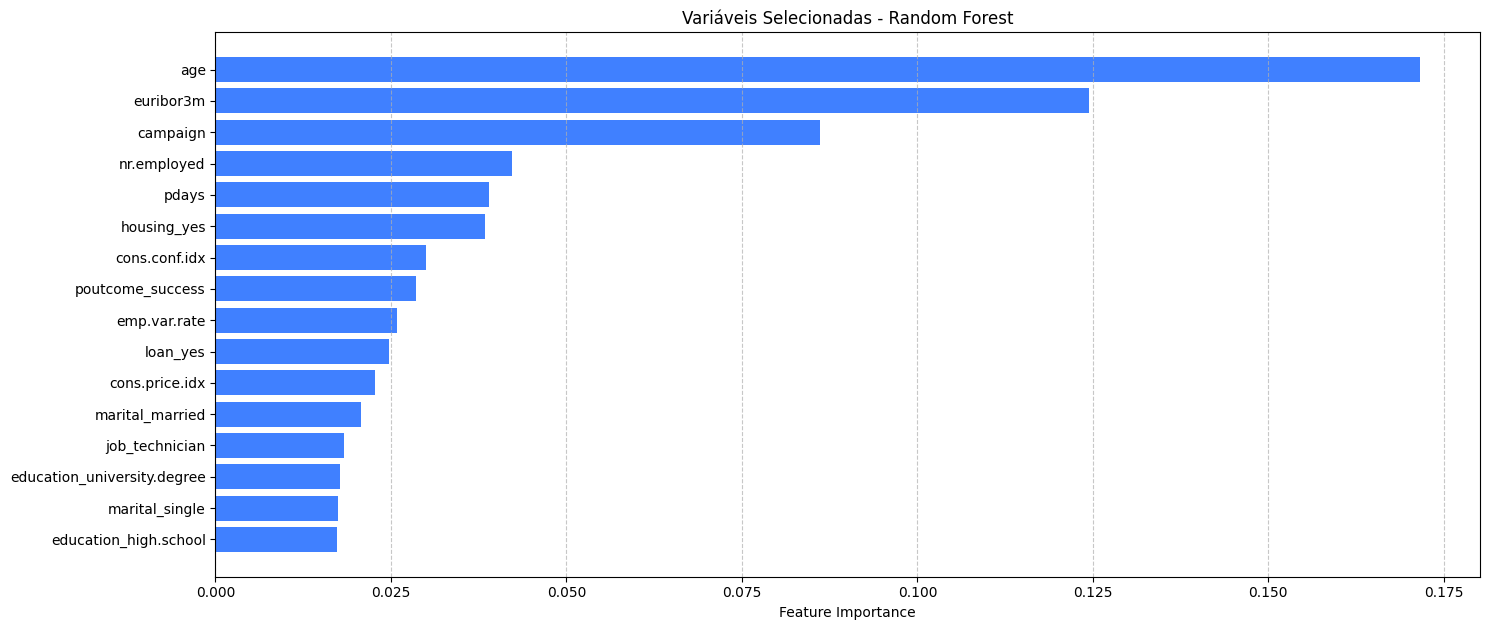

In [ ]:
# Ordenando as variáveis por importância.
features = features.sort_values(by='Importance', ascending=True)

# Filtrando o DataFrame para apenas as features acima do corte.
selected_features_df = features[features['Importance'] > cutoff]

# Visualizando a importância das variáveis em barras horizontais.
plt.figure(figsize=(15, len(selected_features_df)*0.4))
plt.barh(selected_features_df['Feature'], selected_features_df['Importance'], color=(0.25, 0.5, 1))
plt.xlabel('Feature Importance')
plt.title('Variáveis Selecionadas - Random Forest')
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Podemos observar que as variáveis **`age`**, **`euribor3m`**, **`campaign`** se sobressaem mais sobre as outras.

Um bom modelo não pode depender de poucas variáveis, o ideal seria que todas as variáveis selecionadas tivessem importâncias próximas, porém vamos seguir com nosso modelo baseline e ver como ele performa.

In [ ]:
# Salvando a lista de variáveis selecionadas em um arquivo pkl (artefato).
with open('artefatos/prd_list_features.pkl', 'wb') as f:
    pickle.dump(selected_features, f)

In [ ]:
# Carregando a lista do arquivo .pkl.
with open('artefatos/prd_list_features.pkl', 'rb') as f:
    loaded_lista = pickle.load(f)

print(loaded_lista)

['age', 'campaign', 'pdays', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_technician', 'education_high.school', 'education_university.degree', 'marital_married', 'marital_single', 'loan_yes', 'housing_yes', 'poutcome_success']


In [ ]:
# Incluindo a variável target na lista de variáveis explicativas selecionadas.
lista_features = loaded_lista + ['y']

abt_treino_01 = abt_treino_00[lista_features]
abt_teste_01 = abt_teste_00[lista_features]

abt_treino_01.shape, abt_teste_01.shape,

((32950, 17), (8238, 17))

In [ ]:
pd.set_option('display.max_columns', None)

abt_treino_01.head()

age  campaign     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  \
0 -0.001669 -0.206242  0.194661      0.838794        0.589080      -0.472769   
1 -0.864095  0.513676  0.194661     -1.199440       -1.180760      -1.229916   
2  1.819007  1.233593  0.194661     -1.199440       -1.180760      -1.229916   
3  0.285806  0.873635  0.194661      0.838794        0.589080      -0.472769   
4 -0.097494 -0.206242  0.194661      0.647709        0.720307       0.890097   

   euribor3m  nr.employed  job_technician  education_high.school  \
0   0.771354     0.843165             0.0                    0.0   
1  -1.372028    -0.939748             0.0                    0.0   
2  -1.308581    -0.939748             0.0                    0.0   
3   0.771930     0.843165             0.0                    0.0   
4   0.713674     0.330405             0.0                    1.0   

   education_university.degree  marital_married  marital_single  loan_yes  \
0                          0.0              1.0             0.0       0.0   
1                          1.0              1.0             0.0       0.0   
2                          0.0              1.0             0.0       0.0   
3                          0.0              0.0             0.0       0.0   
4                          0.0              0.0             1.0       0.0   

   housing_yes  poutcome_success  y  
0          1.0               0.0  0  
1          0.0               0.0  0  
2          0.0               0.0  0  
3          1.0               0.0  0  
4          0.0               0.0  0

In [ ]:
abt_teste_01.head()

age  campaign     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  1.627357 -0.566200  0.194661     -1.199440       -1.180760      -1.229916   
1  1.435707 -0.206242  0.194661      0.647709        0.720307       0.890097   
2 -0.672445 -0.566200  0.194661     -1.199440       -1.180760      -1.229916   
3 -0.384970  0.513676  0.194661      0.838794        1.533570      -0.278074   
4 -1.247395 -0.206242  0.194661      0.838794        0.589080      -0.472769   

   euribor3m  nr.employed  job_technician  education_high.school  \
0  -1.340304    -0.939748             1.0                    1.0   
1   0.713674     0.330405             0.0                    0.0   
2  -1.332229    -0.939748             0.0                    0.0   
3   0.775391     0.843165             0.0                    1.0   
4   0.773084     0.843165             0.0                    1.0   

   education_university.degree  marital_married  marital_single  loan_yes  \
0                          0.0              1.0             0.0       1.0   
1                          0.0              1.0             0.0       0.0   
2                          0.0              1.0             0.0       0.0   
3                          0.0              1.0             0.0       0.0   
4                          0.0              1.0             0.0       0.0   

   housing_yes  poutcome_success  y  
0          0.0               0.0  0  
1          1.0               0.0  0  
2          0.0               0.0  0  
3          0.0               0.0  0  
4          1.0               0.0  0

<br>

### **Mapa de correlação de Pearson para as variáveis selecionadas**

- Ao plotar um mapa de correlação de Pearson, podemos visualizar de forma rápida e intuitiva as relações lineares entre as variáveis selecionadas. Uma alta correlação positiva entre duas variáveis sugere que elas variam juntas na mesma direção, enquanto uma alta correlação negativa indica que elas variam inversamente. Por outro lado, uma correlação próxima a zero indica que as variáveis têm pouca ou nenhuma relação linear entre si.

- Essa análise é importante para identificar se existe alguma alta correlação entre as variáveis, o que pode indicar redundância ou multicolinearidade no conjunto de dados.
  - **Redundância:** Variáveis altamente correlacionadas podem fornecer informações redundantes para o modelo, o que pode levar a uma sobrecarga de informações e aumentar o tempo de treinamento sem melhorar significativamente o desempenho do modelo.
  - **Multicolinearidade:** A multicolinearidade ocorre quando duas ou mais variáveis estão altamente correlacionadas entre si, o que pode levar a problemas na interpretação dos coeficientes do modelo e na instabilidade das previsões.

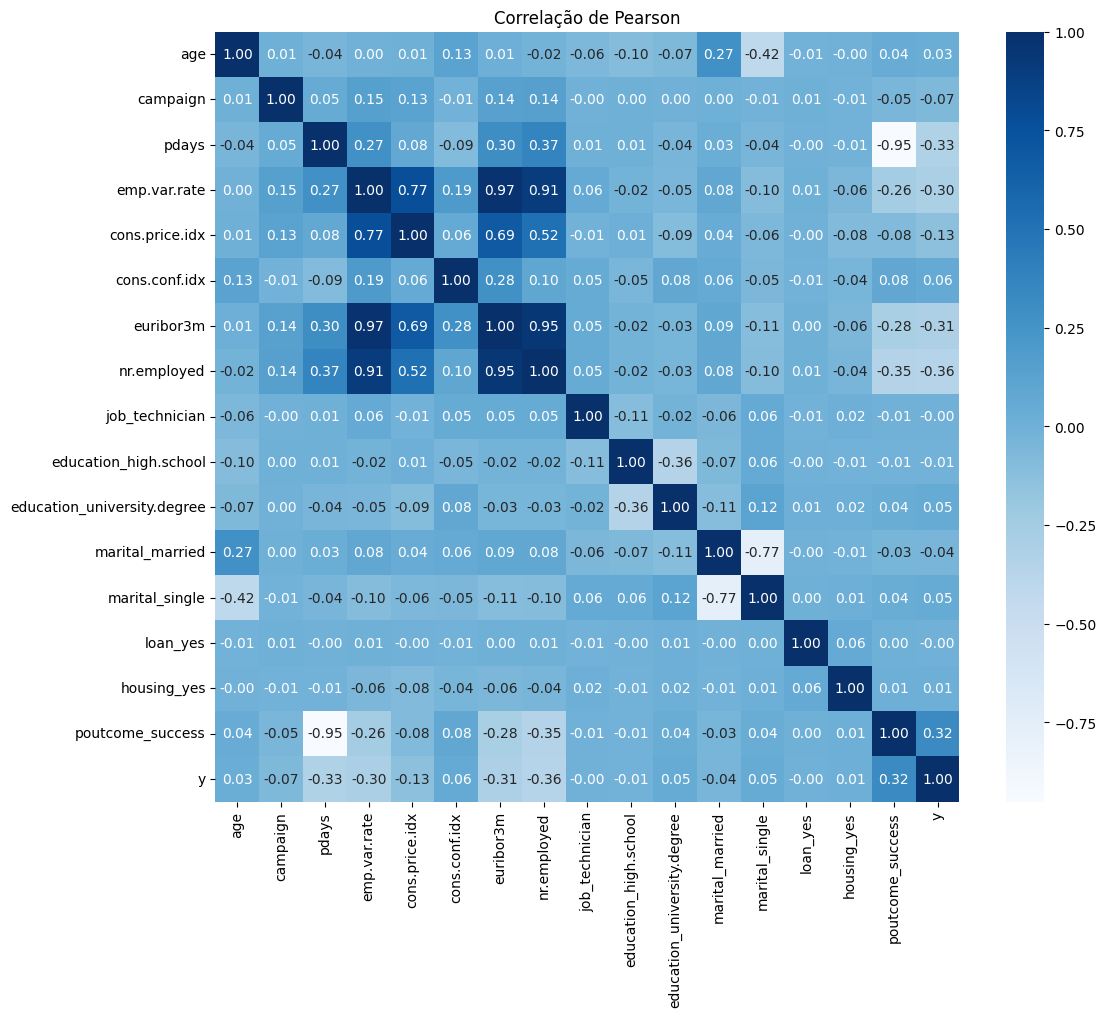

In [ ]:
# Calculando a correlação de Pearson.
corr_matrix = abt_treino_01.corr()

# Plotando o heatmap.
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap='Blues', annot=True, fmt='.2f')
plt.title('Correlação de Pearson')
plt.show()

Podemos notar um alta correlação entre as variáveis **`pdays`** e **`poutcome_success`**, **`euribor3m`** e **`nr.employed`**, **`euribor3m`** e **`emp.var.rate`** e também entre **`nr.employed`** e **`emp.var.rate`**.

Poderiamos, por exemplo, descartar as variáveis **`poutcome_success`**, **`nr.employed`** e **`emp.var.rate`** para evitar redundância no nosso modelo ou a multicolinearidade, mas como se trata de um modelo baseline, vamos seguir sem descartar nenhuma variável para ver como o modelo performa.

<br>

### **Verificação da força das variáveis explicativas com o Information Value (IV)**

- O Information Value (IV) é uma medida estatística que avalia a força da relação entre uma variável independente e a variável dependente em um modelo de classificação. O IV é importante porque permite identificar quais variáveis têm maior poder preditivo e contribuição para o modelo, ajudando na priorização e seleção das melhores características para melhorar a precisão do modelo de machine learning. Quanto maior o IV de uma variável, maior é sua capacidade de discriminar entre as classes da variável dependente, o que indica sua importância na previsão do resultado desejado.

- Embora o IV seja frequentemente usado em problemas de classificação binária, como é comum na análise de crédito para prever a inadimplência, ele pode ser aplicado em uma variedade de contextos onde a variável dependente é categórica.

- **Vale ressaltar:** Enquanto a **Feature Importance** é uma medida do quanto cada variável contribui para a capacidade de previsão do modelo, com base na relação de uma variável explicativa com as outras variáveis explicativas o **IV** é uma medida da força da relação entre uma variável explicativa e a variável target em um modelo. Ambas tem sua importância e usabilidade.

In [ ]:
# Fazendo uma amostra dos dados para processamento mais rápido (se a base de dados for muito grande).
# abt_treino_01_sample = abt_treino_01.sample(n=10000)

In [ ]:
# Chamando a função.
iv_df = iv_table(abt_treino_01, 'y')
iv_df

Variável        IV           Preditividade
6                     euribor3m  1.602373          Preditor Forte
4                cons.price.idx  1.346711          Preditor Forte
5                 cons.conf.idx  1.346711          Preditor Forte
7                   nr.employed  1.223272          Preditor Forte
3                  emp.var.rate  1.091224          Preditor Forte
2                         pdays  0.588615          Preditor Forte
15             poutcome_success  0.526471          Preditor Forte
0                           age  0.289579       Preditor Moderado
1                      campaign  0.207609       Preditor Moderado
10  education_university.degree  0.027611          Preditor Fraco
12               marital_single  0.026902          Preditor Fraco
11              marital_married  0.017853  Inútil para a predição
14                  housing_yes  0.001188  Inútil para a predição
9         education_high.school  0.000939  Inútil para a predição
13                     loan_yes  0.000042  Inútil para a predição
8                job_technician  0.000016  Inútil para a predição

Além de nos mostrar as variáveis com poder preditivo forte, que serão importantes para o nosso modelo, a tabela também nos mostra que temos 5 variáveis identificadas pelo IV como "inútil para a predição", variáveis que não contribuem significativamente para a capacidade preditiva do modelo.

Nesse caso, manter essas variáveis no modelo pode introduzir ruído desnecessário e aumentar a complexidade do modelo sem melhorar sua capacidade de fazer previsões precisas. Além disso, a inclusão de variáveis irrelevantes pode levar a problemas como overfitting.

Como se trata de um modelo baseline, vamos seguir sem descartar nenhuma variável para ver como o modelo performa.

<br>

### **Remoção das variáveis de acordo com a análise da Matriz de Correlação e do Information Value (IV)**

- Vou deixar abaixo **apenas os códigos comentados**, sem execução, para um possível futuro caso, pois neste momento **não vou remover nenhuma variável**.  

Caso seja necessário remover as variáveis com alta correlação, podemos usar o código abaixo.

Ele vai pegar os pares de variáveis com correlação maior ou igual ao limiar determinado. Em cada par, ele vai verificar a variável que tem o menor IV e vai coloca-la em uma lista para ser removida.

In [ ]:
'''

# Definindo limiar de correlação.
limiar_corr = 0.90

# Criando uma lista com pares de variáveis com correlação absoluta >= o limiar.
corr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])
              for i in range(len(corr_matrix.columns))
              for j in range(i + 1, len(corr_matrix.columns))
              if abs(corr_matrix.iloc[i, j]) >= limiar_corr]

# Encontrando as variáveis com menor IV em cada par e adicionando à lista vars_to_drop_corr.
vars_to_drop_corr = []
for var1, var2 in corr_pairs:
    iv_values = iv_df.set_index('Variável').loc[[var1, var2], 'IV']
    var_to_drop = iv_values.idxmin()
    vars_to_drop_corr.append(var_to_drop)

# Removendo duplicatas da lista vars_to_drop_corr.
vars_to_drop_corr = list(set(vars_to_drop_corr))


# Imprimindo o resultado.
print(Fore.BLUE + '=' * 150)
print('')
print('Lista de variáveis para remover devido à alta correlação e baixo IV:', vars_to_drop_corr)
print('')
print('=' * 150 + Style.RESET_ALL)

'''

"\n\n# Definindo limiar de correlação.\nlimiar_corr = 0.90\n\n# Criando uma lista com pares de variáveis com correlação absoluta >= o limiar.\ncorr_pairs = [(corr_matrix.columns[i], corr_matrix.columns[j])\n              for i in range(len(corr_matrix.columns))\n              for j in range(i + 1, len(corr_matrix.columns))\n              if abs(corr_matrix.iloc[i, j]) >= limiar_corr]\n\n# Encontrando as variáveis com menor IV em cada par e adicionando à lista vars_to_drop_corr.\nvars_to_drop_corr = []\nfor var1, var2 in corr_pairs:\n    iv_values = iv_df.set_index('Variável').loc[[var1, var2], 'IV']\n    var_to_drop = iv_values.idxmin()\n    vars_to_drop_corr.append(var_to_drop)\n\n# Removendo duplicatas da lista vars_to_drop_corr.\nvars_to_drop_corr = list(set(vars_to_drop_corr))\n\n\n# Imprimindo o resultado.\nprint(Fore.BLUE + '=' * 150)\nprint('')\nprint('Lista de variáveis para remover devido à alta correlação e baixo IV:', vars_to_drop_corr)\nprint('')\nprint('=' * 150 + Style.RE

In [ ]:
'''

# Removendo as variáveis com alta correlação.
abt_treino_02 = abt_treino_01.drop(abt_treino_01[vars_to_drop_corr], axis=1)

abt_treino_02.shape

'''

'\n\n# Removendo as variáveis com alta correlação.\nabt_treino_02 = abt_treino_01.drop(abt_treino_01[vars_to_drop_corr], axis=1)\n\nabt_treino_02.shape\n\n'

In [ ]:
'''

abt_treino_02.head()

'''

'\n\nabt_treino_02.head()\n\n'

In [ ]:
'''

# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).
with open('artefatos/prd_vars_to_drop_corr.pkl', 'wb') as f:
    pickle.dump(vars_to_drop_corr, f)

'''

"\n\n# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).\nwith open('/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Classificacao/Bank_Marketing/artefatos/prd_vars_to_drop_corr.pkl', 'wb') as f:\n    pickle.dump(vars_to_drop_corr, f)\n\n"

In [ ]:
'''

# Carregando o pkl com a lista de variáveis a serem removidas.
with open('artefatos/prd_vars_to_drop_corr.pkl', 'rb') as f:
    loaded_vars_to_drop_corr = pickle.load(f)

# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_02 = abt_teste_01.drop(axis=1, columns=loaded_vars_to_drop_corr)

abt_teste_02.shape

'''

"\n\n# Carregando o pkl com a lista de variáveis a serem removidas.\nwith open('/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Classificacao/Bank_Marketing/artefatos/prd_vars_to_drop_corr.pkl', 'rb') as f:\n    loaded_vars_to_drop_corr = pickle.load(f)\n\n# Aplicando a remoção das variáveis na tabela de teste.\nabt_teste_02 = abt_teste_01.drop(axis=1, columns=loaded_vars_to_drop_corr)\n\nabt_teste_02.shape\n\n"

In [ ]:
'''

abt_teste_02.head()

'''

'\n\nabt_teste_02.head()\n\n'

In [ ]:
# Usar quando não for remover variáveis no passo anterior.
abt_treino_02 = abt_treino_01.copy()
abt_teste_02 = abt_teste_01.copy()

Caso seja necessário dropar as variáveis que não irão contribuir para o nosso modelo, de acordo com o valor do IV, podemos usar o código abaixo.

In [ ]:
'''

# Criando uma lista vazia para armazenar os nomes das colunas com preditividade "Preditor Fraco" e "Inútil para a predição".
vars_to_drop_iv = []

# Criando uma lista com os critérios que queremos filtrar.
status_predit = ['Preditor Fraco', 'Inútil para a predição']

# Itera sobre as linhas do DataFrame iv_df.
for index, row in iv_df.iterrows():
    # Verifica se a preditividade está dentro dos critérios que queremos filtrar.
    if row['Preditividade'] in status_predit:
        # Adicionar o nome da coluna à lista vars_to_drop_iv.
        vars_to_drop_iv.append(row['Variável'])

# Iterando sobre as listas criadas.
for item in vars_to_drop_corr:
    if item in vars_to_drop_iv:
        vars_to_drop_iv.remove(item)

# Imprimindo o resultado.
print(Fore.BLUE + '=' * 150)
print('')
print('Lista de variáveis para remover devido ao baixo valor de IV:', vars_to_drop_iv)
print('')
print('=' * 150 + Style.RESET_ALL)

'''

'\n\n# Criando uma lista vazia para armazenar os nomes das colunas com preditividade "Preditor Fraco" e "Inútil para a predição".\nvars_to_drop_iv = []\n\n# Criando uma lista com os critérios que queremos filtrar.\nstatus_predit = [\'Preditor Fraco\', \'Inútil para a predição\']\n\n# Itera sobre as linhas do DataFrame iv_df.\nfor index, row in iv_df.iterrows():\n    # Verifica se a preditividade está dentro dos critérios que queremos filtrar.\n    if row[\'Preditividade\'] in status_predit:\n        # Adicionar o nome da coluna à lista vars_to_drop_iv.\n        vars_to_drop_iv.append(row[\'Variável\'])\n\n# Iterando sobre as listas criadas.\nfor item in vars_to_drop_corr:\n    if item in vars_to_drop_iv:\n        vars_to_drop_iv.remove(item)\n\n# Imprimindo o resultado.\nprint(Fore.BLUE + \'=\' * 150)\nprint(\'\')\nprint(\'Lista de variáveis para remover devido ao baixo valor de IV:\', vars_to_drop_iv)\nprint(\'\')\nprint(\'=\' * 150 + Style.RESET_ALL)\n\n'

In [ ]:
'''

# Removendo as variáveis com alta correlação.
abt_treino_03 = abt_treino_02.drop(abt_treino_02[vars_to_drop_iv], axis=1)

abt_treino_03.shape

'''

'\n\n# Removendo as variáveis com alta correlação.\nabt_treino_03 = abt_treino_02.drop(abt_treino_02[vars_to_drop_iv], axis=1)\n\nabt_treino_03.shape\n\n'

In [ ]:
'''

abt_treino_03.head()

'''

'\n\nabt_treino_03.head()\n\n'

In [ ]:
'''

# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).
with open('artefatos/prd_vars_to_drop_iv.pkl', 'wb') as f:
    pickle.dump(vars_to_drop_iv, f)

'''

"\n\n# Salvando a lista de variáveis removidas em um arquivo pkl (artefato).\nwith open('/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Classificacao/Bank_Marketing/artefatos/prd_vars_to_drop_iv.pkl', 'wb') as f:\n    pickle.dump(vars_to_drop_iv, f)\n\n"

In [ ]:
'''

# Carregando o pkl com a lista de variáveis a serem removidas.
with open('artefatos/prd_vars_to_drop_iv.pkl', 'rb') as f:
    loaded_vars_to_drop_iv = pickle.load(f)

# Aplicando a remoção das variáveis na tabela de teste.
abt_teste_03 = abt_teste_02.drop(axis=1, columns=loaded_vars_to_drop_iv)

abt_teste_03.shape

'''

"\n\n# Carregando o pkl com a lista de variáveis a serem removidas.\nwith open('/content/drive/MyDrive/Projetos_Big_Data_Analytics/Ciencia_de_Dados/Etapa_Modelagem_Classificacao/Bank_Marketing/artefatos/prd_vars_to_drop_iv.pkl', 'rb') as f:\n    loaded_vars_to_drop_iv = pickle.load(f)\n\n# Aplicando a remoção das variáveis na tabela de teste.\nabt_teste_03 = abt_teste_02.drop(axis=1, columns=loaded_vars_to_drop_iv)\n\nabt_teste_03.shape\n\n"

In [ ]:
'''

abt_teste_03.head()

'''

'\n\nabt_teste_03.head()\n\n'

In [ ]:
# Usar quando não for remover variáveis no passo anterior.
abt_treino_03 = abt_treino_02.copy()
abt_teste_03 = abt_teste_02.copy()

<br>

### **Salvar as tabelas de treino e teste pós Feature Selection**

In [ ]:
abt_treino_03.to_csv('abt/abt_treino_fs01.csv')
abt_teste_03.to_csv('abt/abt_teste_fs01.csv')

<br>
<br>
<br>
<br>

## **Modelagem dos Dados**

- É nessa etapa que vamos fazer o treinamento do modelo de machine learning. Nesta fase, os algoritmos são alimentados com dados de treinamento para aprender padrões e fazer previsões. Métodos como regressão, árvores de decisão, redes neurais e outros são aplicados para encontrar o modelo mais adequado. A qualidade do treinamento influencia diretamente a precisão das previsões e o desempenho do modelo em situações reais.

- Cada problema de négocio requer um tipo de solução diferente, e podemos utilizar um ou vários algoritmos de machine learning para encontrar o melhor resultado, cada um pode ser mais adequado para um tipo de problema específico. Nesse nosso projeto, para fins didáticos, vamos treinar o modelo com os principais algoritmos usados e comparar a performance e as métricas de cada um. Vamos usar também o **GridSearchCV** para encontrar os melhores hiperparâmetros.
<br>

- Os algoritmos que iremos utilizar nesse projeto são:
  - Árvore de Decisão

  - Regressão Logística

  - Random Forest

  - Gradient Boosting

  - LightGBM

  - XGBoost

  - CatBoost

  - KNN

  - Redes Neurais - MLP

  - SVM

<br>

### **Leitura dos dados de treino e teste pós seleção das variáveis**

In [ ]:
# Leitura das ABTs.
abt_train = pd.read_csv('abt/abt_treino_fs01.csv')
abt_test = pd.read_csv('abt/abt_teste_fs01.csv')

# Dropando a coluna "Unnamed: 0".
abt_train.drop(axis=1,columns=['Unnamed: 0'],inplace=True)
abt_test.drop(axis=1,columns=['Unnamed: 0'],inplace=True)

info_dataframe(abt_train, abt_test)

              CONJUNTO DE TREINO             

Quantidade de linhas: 32950
Quantidade de colunas: 17

              CONJUNTO DE TESTE              

Quantidade de linhas: 8238
Quantidade de colunas: 17


<br>

### **Separando as variáveis de entrada (features) e de saída (target)**

In [ ]:
# Separação na tabela de treino.
X_train = abt_train.drop(columns=['y'])
y_train = abt_train['y']

# Separação na tabela de teste.
X_test = abt_test.drop(columns=['y'])
y_test = abt_test['y']

X_train.shape, X_test.shape

((32950, 16), (8238, 16))

In [ ]:
pd.set_option('display.max_columns', None)

X_train.head()

age  campaign     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  \
0 -0.001669 -0.206242  0.194661      0.838794        0.589080      -0.472769   
1 -0.864095  0.513676  0.194661     -1.199440       -1.180760      -1.229916   
2  1.819007  1.233593  0.194661     -1.199440       -1.180760      -1.229916   
3  0.285806  0.873635  0.194661      0.838794        0.589080      -0.472769   
4 -0.097494 -0.206242  0.194661      0.647709        0.720307       0.890097   

   euribor3m  nr.employed  job_technician  education_high.school  \
0   0.771354     0.843165             0.0                    0.0   
1  -1.372028    -0.939748             0.0                    0.0   
2  -1.308581    -0.939748             0.0                    0.0   
3   0.771930     0.843165             0.0                    0.0   
4   0.713674     0.330405             0.0                    1.0   

   education_university.degree  marital_married  marital_single  loan_yes  \
0                          0.0              1.0             0.0       0.0   
1                          1.0              1.0             0.0       0.0   
2                          0.0              1.0             0.0       0.0   
3                          0.0              0.0             0.0       0.0   
4                          0.0              0.0             1.0       0.0   

   housing_yes  poutcome_success  
0          1.0               0.0  
1          0.0               0.0  
2          0.0               0.0  
3          1.0               0.0  
4          0.0               0.0

In [ ]:
X_test.head()

age  campaign     pdays  emp.var.rate  cons.price.idx  cons.conf.idx  \
0  1.627357 -0.566200  0.194661     -1.199440       -1.180760      -1.229916   
1  1.435707 -0.206242  0.194661      0.647709        0.720307       0.890097   
2 -0.672445 -0.566200  0.194661     -1.199440       -1.180760      -1.229916   
3 -0.384970  0.513676  0.194661      0.838794        1.533570      -0.278074   
4 -1.247395 -0.206242  0.194661      0.838794        0.589080      -0.472769   

   euribor3m  nr.employed  job_technician  education_high.school  \
0  -1.340304    -0.939748             1.0                    1.0   
1   0.713674     0.330405             0.0                    0.0   
2  -1.332229    -0.939748             0.0                    0.0   
3   0.775391     0.843165             0.0                    1.0   
4   0.773084     0.843165             0.0                    1.0   

   education_university.degree  marital_married  marital_single  loan_yes  \
0                          0.0              1.0             0.0       1.0   
1                          0.0              1.0             0.0       0.0   
2                          0.0              1.0             0.0       0.0   
3                          0.0              1.0             0.0       0.0   
4                          0.0              1.0             0.0       0.0   

   housing_yes  poutcome_success  
0          0.0               0.0  
1          1.0               0.0  
2          0.0               0.0  
3          0.0               0.0  
4          1.0               0.0

<br>

### **Treinamento do modelo usando: Decision Tree (Árvore de Decisão)**

A Árvore de Decisão é um algoritmo de aprendizado de máquina que toma decisões com base em divisões recursivas em dados, com o objetivo de criar regras de decisão simples.
<br>
<br>
- Composta por nós e folhas.
    - **Root node:** Nó raiz.
    - **Interior node:** Nó intermediário.
    - **Leaf node:** Folha.
    - **Nó puro/perfeito:** Onde só tem indivíduos da mesma classe (menor entropia possível).
<br>
<br>
- Abaixo está o formalismo matemático detalhado e o processo passo a passo para a construção de uma Árvore de Decisão:
    1. **Passo 1: Inicialização:**
        1. Comece com o nó raiz, que contém todo o conjunto de dados de treinamento.
        2. Calcule a impureza do nó raiz usando uma métrica de impureza, como o Índice Gini ou a Entropia.
    2. **Passo 2: Avaliação de Divisões:**
        1. Para cada divisão possível, calcule a impureza dos sub nós resultantes e use-a para calcular a função de custo da divisão.
    3. **Passo 3: Escolha da Melhor Divisão:**
        1. Escolha a característica e o valor que fornecem o menor valor da função de custo, ou seja, a divisão que minimiza a impureza nos sub nós resultantes, ponderada pelo tamanho dos sub nós.
        2. Realize a divisão, criando dois novos sub nós.
    4. **Passo 4: Continuação ou Término:**
        1. Se um critério de parada for atendido para um nó (por exemplo, profundidade máxima alcançada, número mínimo de observações por nó, ou nó puro), declare-o como um nó folha e atribua a classe predominante como a classe de previsão do nó.
        2. Se o nó não é um nó folha, repita os passos 2 e 3 para cada sub nó criado.
    5. **Passo 5: Poda (Opcional):**
        1. Após a construção completa da árvore, pode-se realizar a poda para remover ramos da árvore que não oferecem melhorias significativas na impureza, com base em um critério de custo complexidade que penaliza a adição de nós à árvore.
<br>
<br>
- **Critério de Divisão:** O objetivo é encontrar a variável e o ponto de divisão que resultam na melhor separação entre as classes.
    - Para isso usa-se as seguintes medidas:
        - Índice de Gini: Gini(t) = 1 - Somatória de pi².
        - Entropia: Entropia(t) = - Somatória de pi log2 (pi).
        - Onde pi é a proporção da classe i no nó t
    - Pode optar, ou calcular Gini ou calcula Entropia.
    - **Não queremos valor alto de entropia**, pois é desordem e queremos ordem para classificar, então devemos buscar baixa entropia (ou probabilidade está para zero ou a probabilidade está para 1).
<br>
<br>
- **Ganho de Informação:** Ao escolher a variável e o ponto de divisão, calcula-se o Ganho e Informação (para o critério de Entropia) ou a Redução do Gini (para o índice de Gini), que é a diferença entre a impureza do nó principal e a soma ponderada das impurezas dos nós intermediários.
<br>
<br>
- **Processo de Construção:** A árvore é construída de forma recursiva (pois vai fazer esse processo para todas as variáveis até o critério de parada).
<br>
<br>
- **Poda:** É um critério de parada. Para a árvore não crescer de forma desordenada. Se ela for pequena demais ela vai ser fraca, se ela for grande demais ela vai decorar os dados.

**Importante: Para trabalhar com a Árvore de Decisão não é necessário Normalizar ou Padronizar os dados, porque o algoritmo vai pegar as variáveis uma a uma, fazendo quebras, e a árvore vai achar um ponto de corte, não fará contas quadráticas com os termos e sim separá-los, porém, para fins de estudos, vamos utilizar a base que já temos, que está padronizada, pois usaremos a mesma base para os outros algoritmos que vamos ver mais adiante.**

In [ ]:
# Definindo o modelo.
model = DecisionTreeClassifier(random_state=42)


# =========================================================================== Lembrete dos parâmetros da Árvore de Decisão =========================================================================== #
# criterion='gini',    --> Critério utilizado para medir a qualidade de uma divisão ('gini' ou 'entropy').
# splitter='best',    --> Estratégia utilizada para escolher a divisão em cada nó ('best' ou 'random').
# max_depth=3,    --> Profundidade máxima da árvore. None significa que os nós serão expandidos até que todas as folhas sejam puras ou contenham menos amostras do que min_samples_split.
# min_samples_split=0.2,    --> Número mínimo de amostras necessárias para dividir um nó interno.
# min_samples_leaf=1,    --> Número mínimo de amostras necessárias para estar em um nó folha.
# min_weight_fraction_leaf=0.0,    --> Fração mínima ponderada do total da soma dos pesos necessária para estar em um nó folha.
# max_features=None,    --> Número de recursos a serem considerados ao procurar a melhor divisão.
# random_state=None,    --> Semente do gerador de números aleatórios utilizado para a tomada de decisões de divisão quando splitter == 'random'.
# max_leaf_nodes=None,    --> Número máximo de nós folha.
# min_impurity_decrease=0.0,    --> Um nó será dividido se a divisão induzir um decréscimo na impureza maior ou igual a este valor.
# class_weight=None,    --> Peso das classes. Pode ser um dicionário de classes ou 'balanced'.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'criterion':['gini', 'entropy'],     # Define a função para medir a qualidade de uma divisão.
    'splitter':['best', 'random'],     # Define a estratégia usada para escolher a divisão em cada nó. Pode ser "best", o que significa que o algoritmo escolherá a melhor divisão, ou "random", o que significa que o algoritmo escolherá aleatoriamente entre as melhores divisões.
    'max_depth': [2, 3 ,4],     # Profundidade máxima da árvore. Começar por uma pequena e ir aumentando se a métrica não for boa. Tabela maior pode ter profundidade maior.
    'min_samples_split': [0.008, 0.01,0.02, 0.04],     # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [0.008, 0.02, 0.04],    # Número mínimo de amostras necessárias para estar em um nó folha.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',     # 'accuracy', 'precision', 'recall', 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_dt = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  720

Melhores Parâmetros:  {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 0.008, 'min_samples_split': 0.04, 'splitter': 'random'}

Melhor AUC:  0.784883305888246



#### **Avaliando o modelo (Decision Tree)**

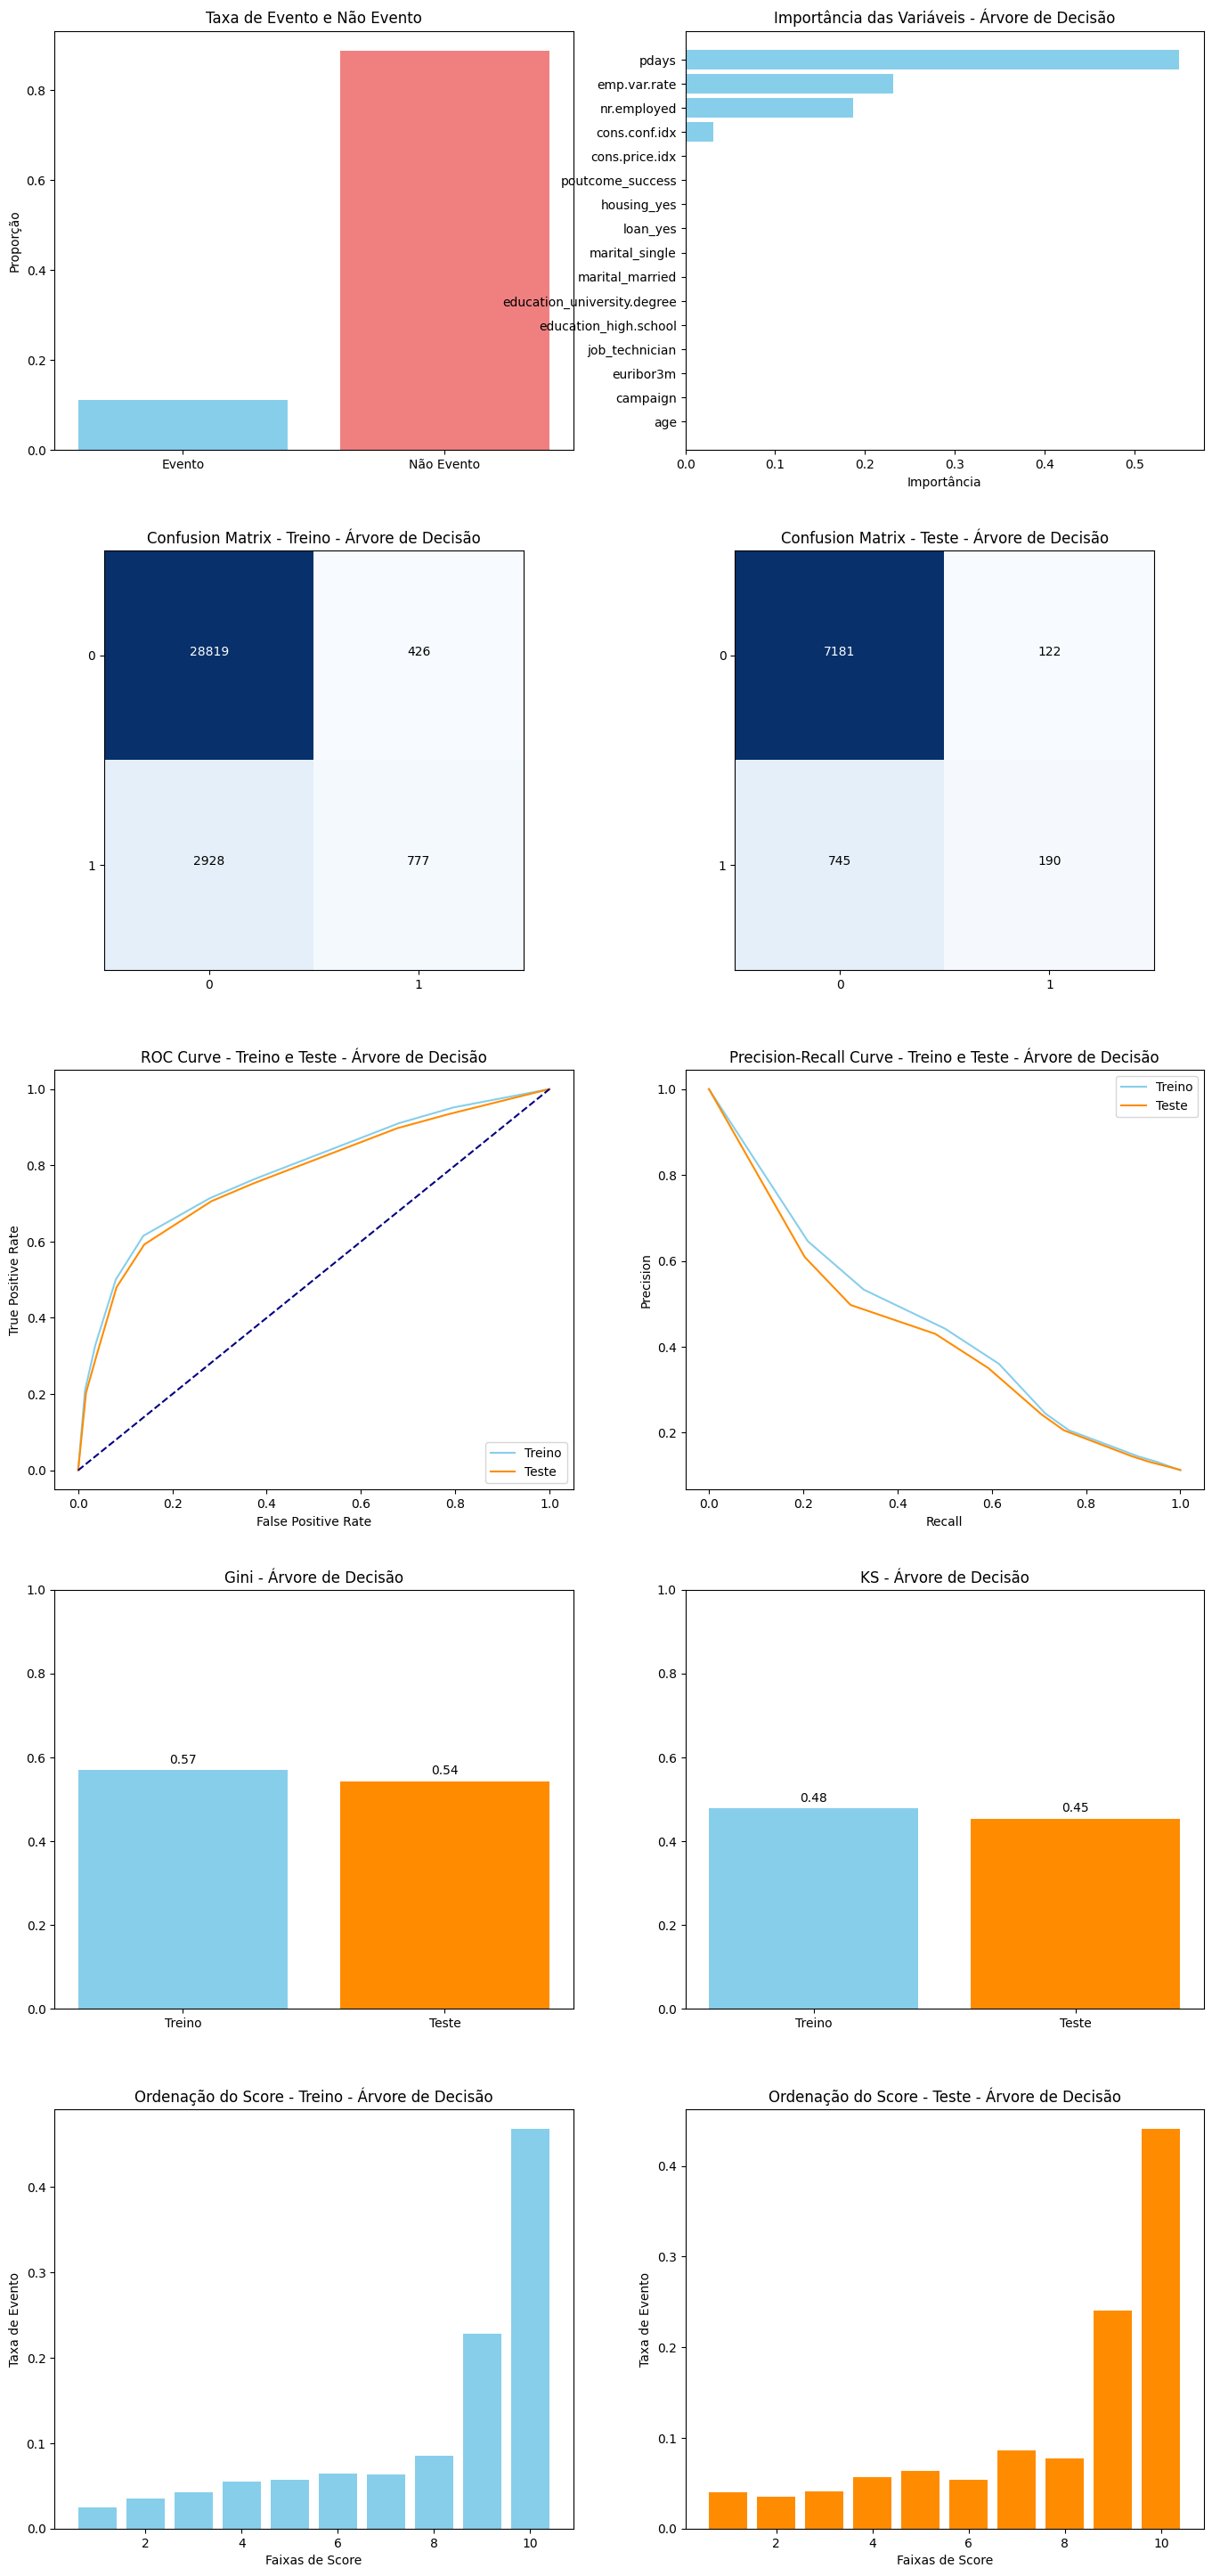

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_dt, nm_modelo='Árvore de Decisão')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: Regressão Logística**

A Regressão Logística é um método estatístico utilizado para modelar a relação entre uma variável dependente binária e uma ou mais variáveis independentes. Diferentemente da regressão linear, que prevê um valor contínuo, a regressão logística lida com a probabilidade de um evento ocorrer e é, portanto, adequada para problemas de classificação. Na regressão logística, a transformação logit da probabilidade de um evento é modelada como uma combinação linear das variáveis independentes, ou seja

$ \ln\left(\frac{p}{1-p}\right) = \beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_kx_k $

onde $ p $ é a probabilidade do evento de interesse, $ \beta_0, \beta_1, \ldots, \beta_k $ são os coeficientes a serem estimados, e $ x_1, x_2, \ldots, x_k $ são as variáveis independentes. A probabilidade $ p $ é então obtida por meio da função logística inversa

$ p = \frac{1}{1 + e^{-(\beta_0 + \beta_1x_1 + \beta_2x_2 + \ldots + \beta_kx_k)}} $,

resultando em valores entre 0 e 1, que podem ser convertidos em classificações binárias, com base em um limiar, comumente 0,5.

In [ ]:
# Definindo o modelo.
model = LogisticRegression(max_iter=100, random_state=42)
# max_iter=100: Utilizado para definir o número máximo de iterações (passos de treinamento). Controla a duração do treinamento e deve ser ajustado com base na complexidade do problema e na quantidade de dados disponíveis.


# ========================================================================== Lembrete dos parâmetros da Regressão Logística ========================================================================== #
# penalty='l2',    --> Tipo de regularização: 'l1', 'l2', 'elasticnet', 'none'
# dual=False,    --> Formulação primal e dual do problema de otimização da regressão logística, sendo recomendado manter como False quando temos mais amostras do que Variáveis
# tol=0.0001,    --> Tolerância para critério de parada.
# C=1.0,    --> Inverso da força de regularização; deve ser um valor flutuante positivo. Como valores menores, especifica uma regularização mais forte.
# fit_intercept=True,    --> Especifica se uma constante (ou seja, viés ou interceptação) deve ser adicionada à função de decisão.
# intercept_scaling=1,    --> Útil apenas quando o solver 'liblinear' é usado e self.fit_intercept é definido como True.
# class_weight=None,    --> Pesos associados às classes. Se não for fornecido, todas as classes são supostas ter peso um.
# random_state=None,    --> Semente usada pelo gerador de números aleatórios.
# solver='lbfgs',    --> Algoritmo a ser usado no problema de otimização: {'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'}, padrão='lbfgs'
# max_iter=100,    --> Número máximo de iterações para os solvers convergirem.
# multi_class='auto',    --> Se a opção escolhida for 'ovr', então um problema binário é ajustado para cada rótulo. Para 'multinomial', a perda minimizada é a perda multinomial ajustando todo o conjunto de dados de uma vez.
# verbose=0,    --> Para o solver 'liblinear' e 'lbfgs', defina o valor para qualquer inteiro positivo para classificar a verbosidade.
# warm_start=False,    --> Quando definido como True, reutiliza a solução da chamada anterior para ajustar como inicialização, caso contrário, apenas apaga a solução anterior.
# l1_ratio=None,   --> O valor de Elastic-Net mixing parameter, com 0 <= l1_ratio <= 1. Somente usado se penalty='elasticnet'.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'penalty':['l1', 'l2'],     # Define a penalidade a ser aplicada durante a regularização. Pode ser "l1" para regularização de LASSO ou "l2" para regularização de Ridge.
    'tol':[0.00001, 0.0001, 0.001],     # Define a tolerância para critério de parada.
    'C': [1.0, 2.0],     # C é o inverso da força da regularização; portanto, um valor maior de C significa menos regularização.
    'solver':['liblinear', 'saga'],     # Define o algoritmo a ser usado no problema de otimização.
    'class_weight': [None, 'balanced', {0: 1, 1: 2}, {0: 2, 1: 1}],     # Define o peso das classes para lidar com conjuntos de dados desequilibrados. "None" significa sem pesos e no "balanced" os pesos são inversamente proporcionais às frequências das classes.
}


# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    scoring='roc_auc',     # 'accuracy', 'precision', 'recall', 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_rl = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  480

Melhores Parâmetros:  {'C': 2.0, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'liblinear', 'tol': 0.001}

Melhor AUC:  0.7637141797772046



#### **Avaliando o modelo (Regressão Logística)**

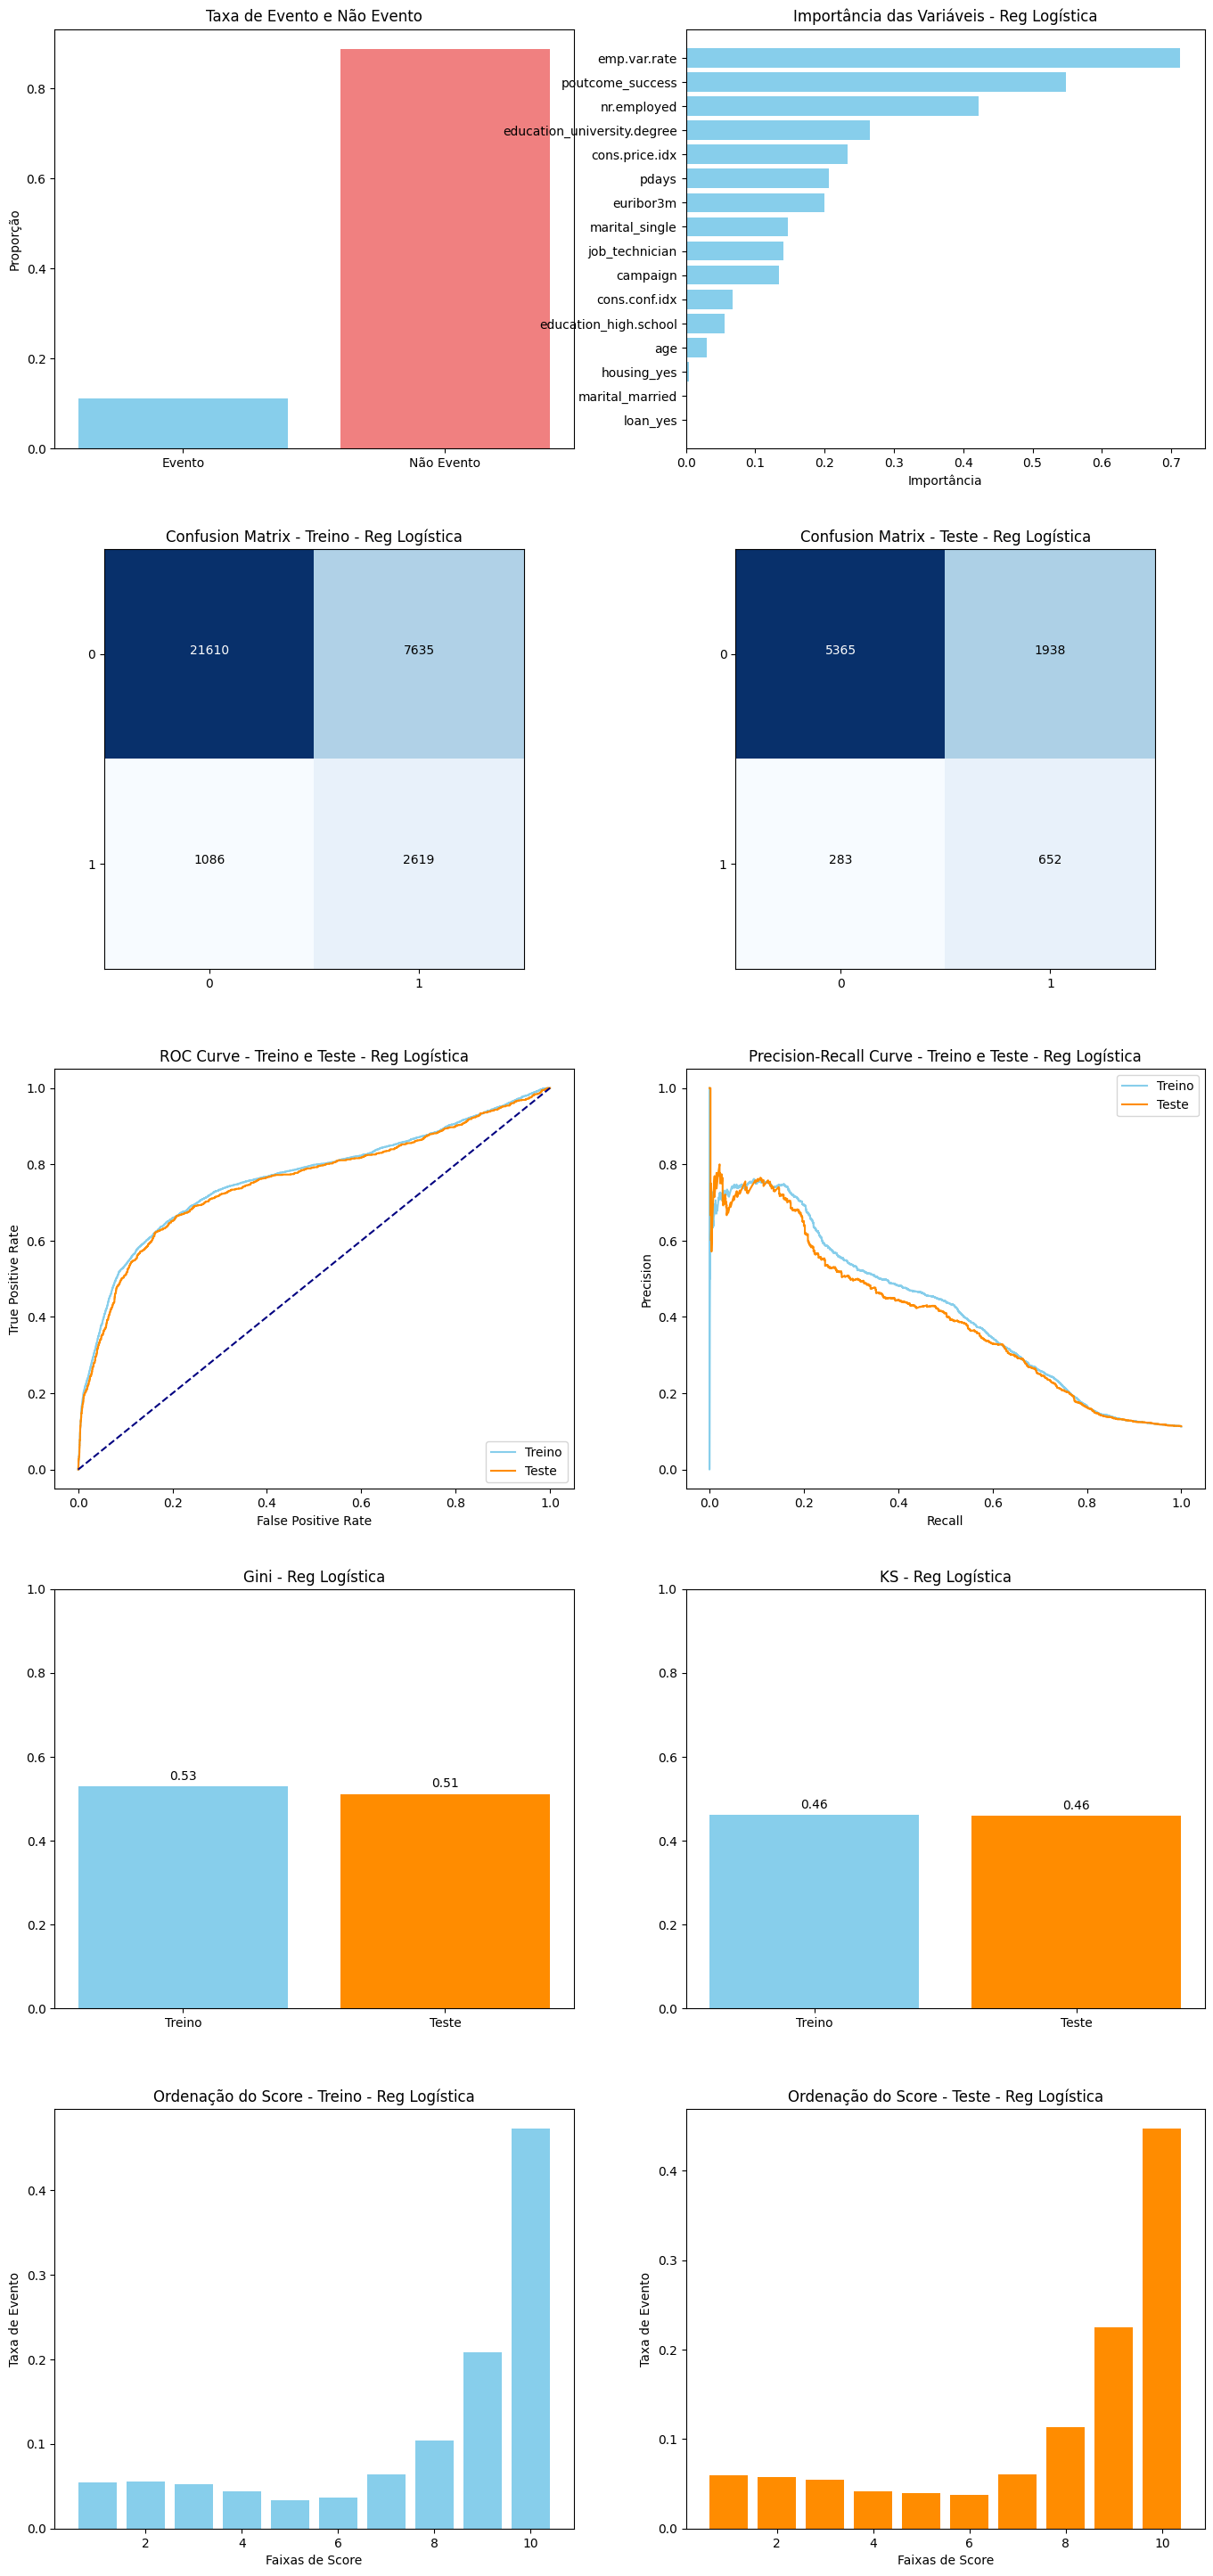

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_rl, nm_modelo='Reg Logística')

<br>

#### **Análise dos coeficientes da Regressão Logística**

In [ ]:
# coef_ retorna uma array 2D, então usamos [0] para obter a lista 1D de coeficientes.
coeficientes = best_model_rl.coef_[0]

# Cria um DataFrame com os nomes das variáveis e seus coeficientes correspondentes.
df_reglog = pd.DataFrame({'Variavel': list(X_train.columns),
                          'Coeficiente': coeficientes})

df_reglog['Importancia'] = df_reglog['Coeficiente'].abs().round(3)
df_reglog = df_reglog.sort_values(by='Importancia', ascending=False)

df_reglog

Variavel  Coeficiente  Importancia
3                  emp.var.rate    -0.712977        0.713
15             poutcome_success     0.548419        0.548
7                   nr.employed    -0.421792        0.422
10  education_university.degree     0.265619        0.266
4                cons.price.idx     0.232781        0.233
2                         pdays    -0.205791        0.206
6                     euribor3m     0.199794        0.200
12               marital_single     0.147012        0.147
8                job_technician     0.140887        0.141
1                      campaign    -0.134839        0.135
5                 cons.conf.idx     0.067263        0.067
9         education_high.school     0.055977        0.056
0                           age     0.030398        0.030
14                  housing_yes     0.004309        0.004
11              marital_married     0.000401        0.000
13                     loan_yes     0.000375        0.000

Essa tabela mostra os coeficientes estimados para cada variável no modelo de regressão logística, bem como a importância relativa de cada variável.

- Coeficientes positivos indicam que o aumento da variável independente está associado a uma probabilidade maior da variável dependente (target) ocorrer.

- Coeficientes negativos indicam que o aumento da variável independente está associado a uma probabilidade menor da variável dependente (target) ocorrer.

- Valores de importância mais altos indicam que a variável tem um impacto maior na previsão da variável dependente, independentemente da direção (positiva ou negativa) do coeficiente.

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: Random Forest**

O Random Forest é um método de ensemble learning que combina múltiplos modelos de árvore de decisão para criar um modelo mais robusto e preciso. É particularmente eficaz para tarefas de classificação e regressão.
<br>
<br>

**Como Funciona?**

1. **Bootstrap Aggregating (Bagging):**
   - O Random Forest utiliza uma técnica chamada Bagging (Bootstrap Aggregating).
   - Ele cria subconjuntos do conjunto de dados de treinamento usando amostragem com reposição (bootstrap) e treina uma árvore de decisão em cada subconjunto.
   - Se tivermos um conjunto de treinamento com \(N\) amostras, cada árvore é treinada com um subconjunto de \(N\) amostras, selecionadas aleatoriamente com reposição.

2. **Árvores de Decisão:**
   - Cada árvore é construída usando um subconjunto de dados e é capaz de fazer previsões.
   - A árvore é dividida em nós, começando pelo nó raiz, e em cada nó, é feita uma decisão baseada em um dos atributos (features) para separar os dados em subconjuntos.

3. **Random Subspace Method:**
   - Além do bagging, o Random Forest usa o método do subespaço aleatório.
   - Em cada divisão da árvore, um subconjunto aleatório de atributos é selecionado, e a divisão é feita com base no melhor atributo desse subconjunto.
   - Isso ajuda a garantir que as árvores sejam descorrelacionadas e aumenta a diversidade no ensemble.

4. **Agregação:**
   - Para tarefas de classificação, o Random Forest usa votação majoritária. Cada árvore "vota" em uma classe, e a classe com mais votos é escolhida.
   - Para tarefas de regressão, o Random Forest calcula a média das previsões de todas as árvores.
<br>
<br>

**Equações:**

- **Classificação:**
$ Y_{\text{pred}} = \text{moda}(Y_{\text{tree}_1}, Y_{\text{tree}_2}, ..., Y_{\text{tree}_n}) $
  
- **Regressão:**
$ Y_{\text{pred}} = \frac{1}{n} \sum_{i=1}^{n} Y_{\text{tree}_i} $

onde $ Y_{\text{tree}_i} $ é a previsão da i-ésima árvore.
<br>
<br>

**Vantagens do Random Forest:**
1. **Robustez e Precisão:** Ao combinar várias árvores de decisão, o Random Forest tende a ser mais robusto e preciso do que uma única árvore de decisão.
2. **Manipulação de Dados Ausentes:** Pode manipular dados ausentes e diferentes tipos de variáveis (categóricas e numéricas).
3. **Importância das Variáveis:** Fornece uma medida de importância de variáveis, permitindo uma seleção de variáveis eficiente.
<br>
<br>

**Aplicações:**

O Random Forest é aplicável em várias áreas, como finanças para detecção de fraude, medicina para diagnóstico de doenças, e ciência de dados para classificação e regressão.

In [ ]:
# Definindo o modelo.
model = RandomForestClassifier(random_state=42)


# ============================================================================= Lembrete dos parâmetros do Random Forest ============================================================================= #
# n_estimators=100,    --> Número de árvores na floresta.
# criterion='gini',    --> Função para medir a qualidade de uma divisão ("gini" ou "entropy").
# max_depth=None,    --> Profundidade máxima das árvores. None significa que os nós são expandidos até ficarem puros.
# min_samples_split=2,    --> Número mínimo de amostras necessárias para dividir um nó interno.
# min_samples_leaf=1,    --> Número mínimo de amostras necessárias para estar em um nó folha.
# min_weight_fraction_leaf=0.0,    --> Fração mínima ponderada da soma total de pesos necessária para estar em um nó folha.
# max_features='auto',    --> Número de características a considerar ao procurar a melhor divisão.
# max_leaf_nodes=None,    --> Número máximo de nós folha.
# min_impurity_decrease=0.0,    --> Um nó será dividido se a divisão induzir a uma diminuição da impureza maior ou igual a este valor.
# bootstrap=True,    --> Se as amostras de bootstrap são usadas ao construir árvores.
# oob_score=False,    --> Se usar amostras out-of-bag para estimar a precisão generalizada.
# n_jobs=None,    --> Número de jobs a serem executados em paralelo para ajuste e previsão. -1 significa usar todos os processadores.
# random_state=None,    --> Controla a aleatoriedade do bootstrap e da seleção de features.
# verbose=0,    --> Controla a verbosidade do processo de treinamento.
# warm_start=False,    --> Reutiliza a solução da chamada anterior para ajustar e adicionar mais estimadores ao ensemble.
# class_weight=None,    --> Pesos associados às classes. Pode ser "balanced", "balanced_subsample" ou um dicionário com os pesos.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'n_estimators': [10, 50],    # Número de árvores na floresta (para modelos como RandomForest).
    'max_depth': [2, 3, 5],    # Profundidade máxima de cada árvore de decisão.
    'min_samples_split': [0.001, 0.01],    # Número mínimo de amostras necessárias para dividir um nó interno.
    'min_samples_leaf': [2, 0.01],    # Número mínimo de amostras necessárias para estar em um nó folha.
    'bootstrap': [True, False],    # Indica se amostras de bootstrap são usadas para construir árvores (para modelos como RandomForest).
    #'max_features': ['auto', 'sqrt', 'log2'],    # Número máximo de features a serem consideradas para dividir um nó.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_rf = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  240
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores Parâmetros:  {'bootstrap': True, 'max_depth': 5, 'min_samples_leaf': 2, 'min_samples_split': 0.01, 'n_estimators': 50}

Melhor AUC:  0.7955556724577072



#### **Avaliando o modelo (Random Forest)**

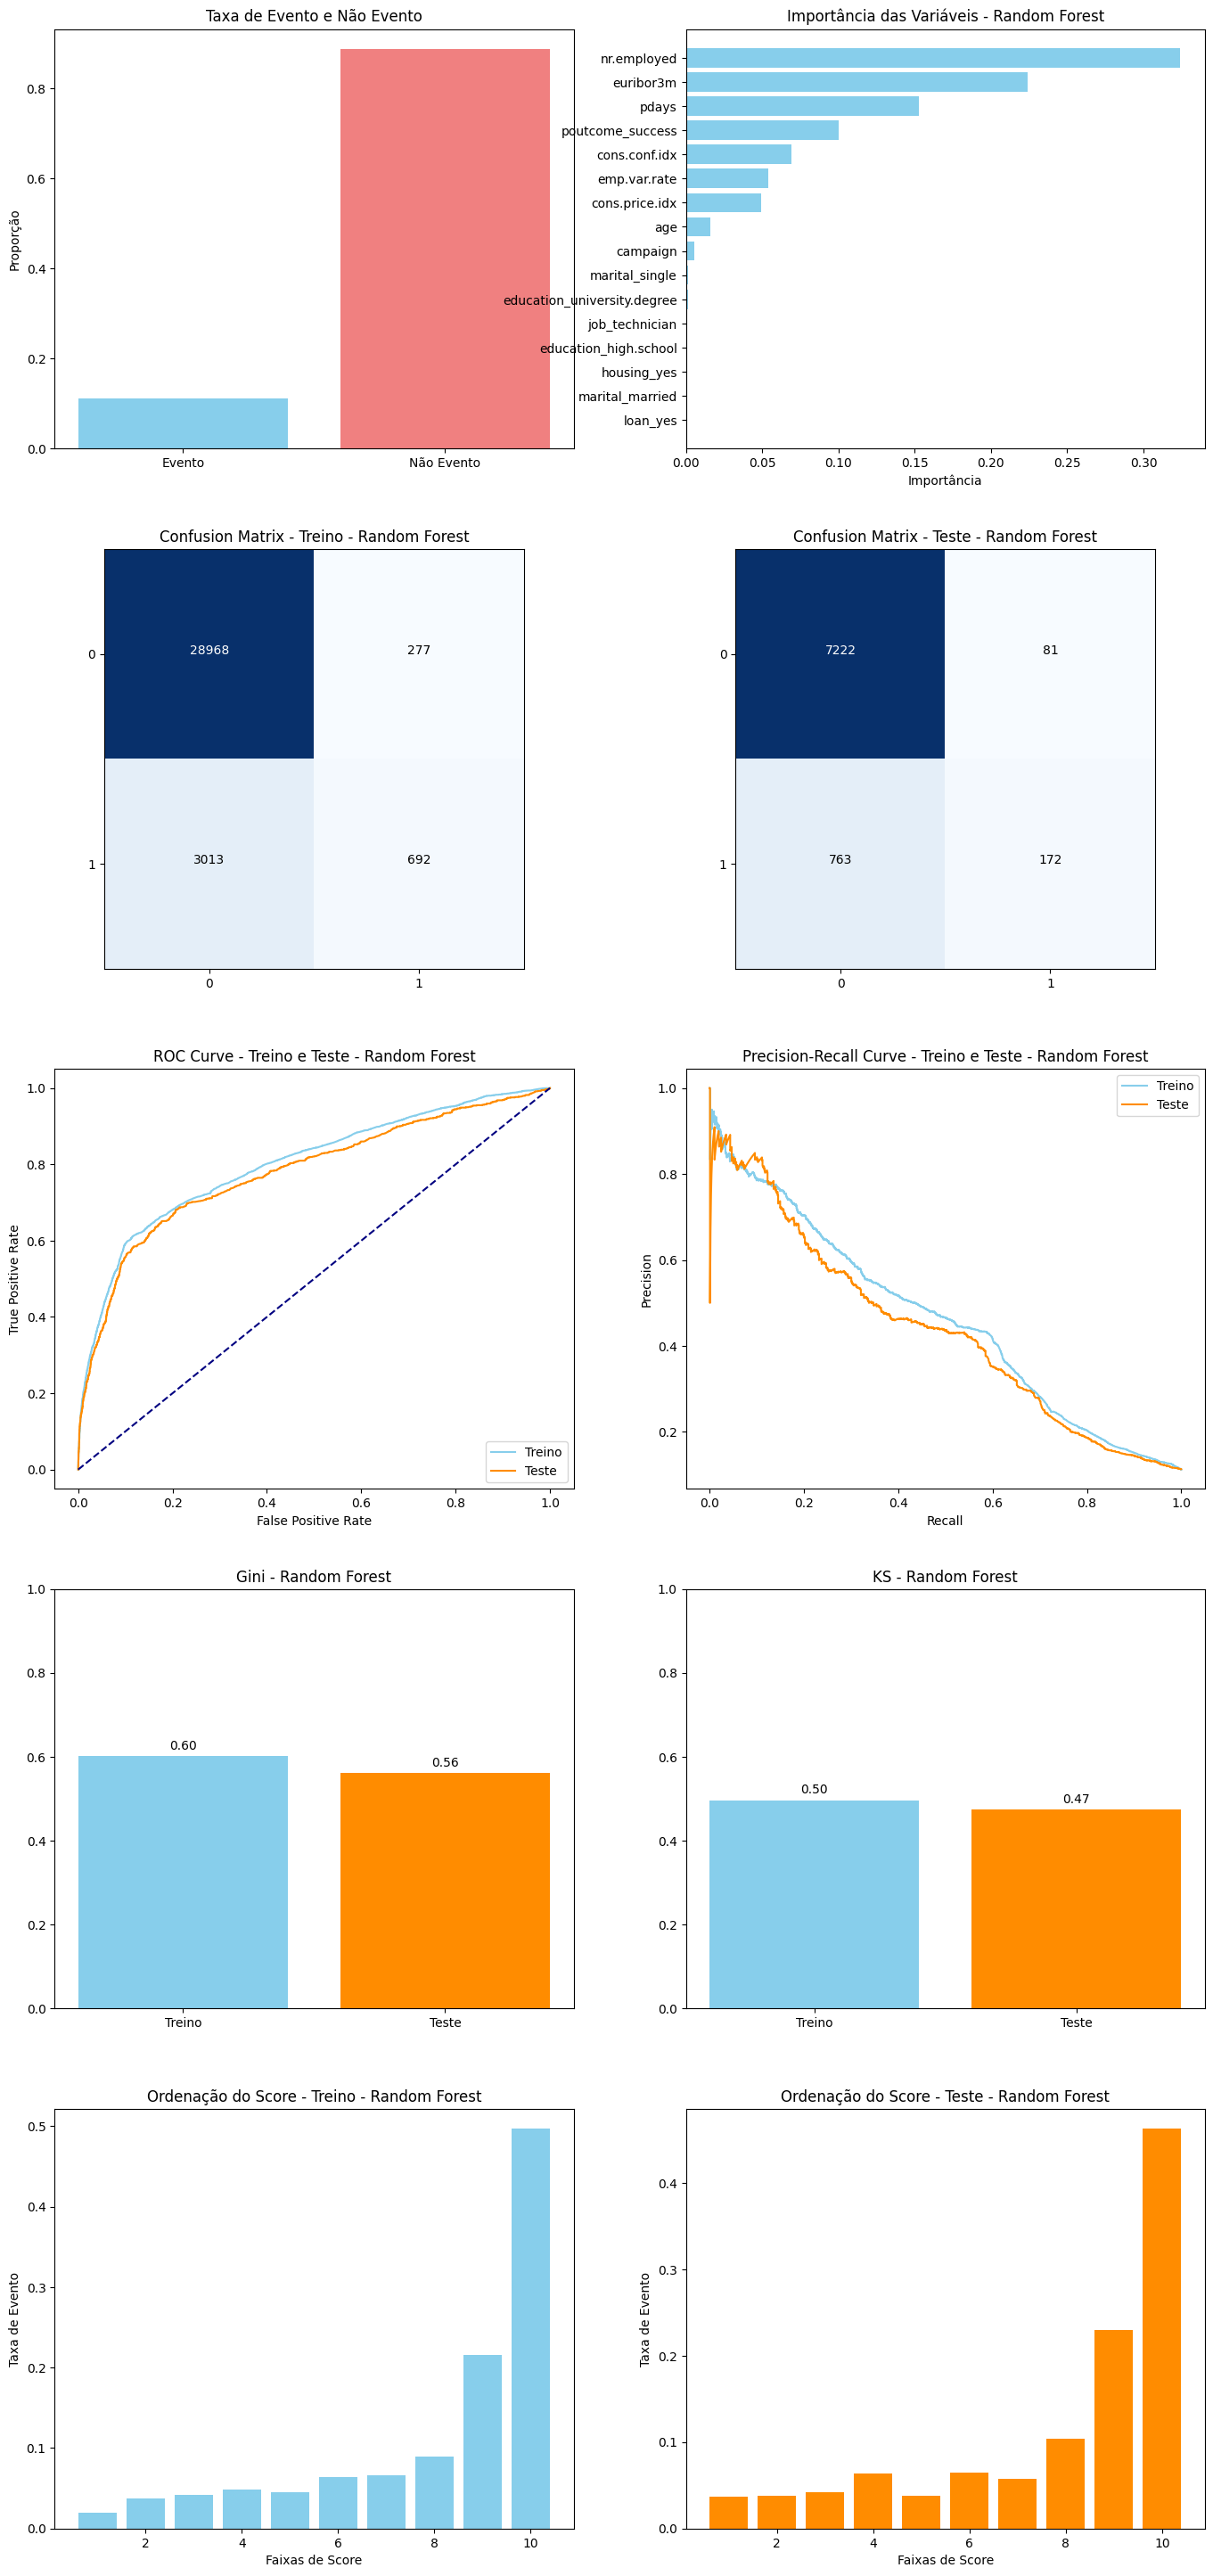

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_rf, nm_modelo='Random Forest')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: Gradient Boosting**

O Gradient Boosting é uma técnica de aprendizado de máquina para problemas de regressão e classificação, que constrói um modelo preditivo na forma de um conjunto de modelos de previsão fracos, tipicamente árvores de decisão.
<br>
<br>

**1. Modelo Aditivo:**

O modelo aditivo gerado pelo Gradient Boosting é definido como:

$
F(x) = \sum_{i=1}^{M} \beta_i h(x; a_i)
$

onde:
- $M$: Número de árvores ou, mais geralmente, de modelos fracos.
- $ \beta_i $: Peso da i-ésima árvore.
- $ h(x; a_i) $: i-ésima árvore de decisão com parâmetros $ a_i $.
<br>
<br>

**2. Função Objetivo e Otimização:**

O objetivo do Gradient Boosting é encontrar uma função $ F(x) $ que minimize a seguinte função objetivo:

$
L(F) = \sum_{i=1}^{N} l(y_i, F(x_i)) + \sum_{i=1}^{M} \Omega(h_i)
$

onde:
- $ l(y_i, F(x_i)) $ é a função de perda que compara a previsão do modelo, $ F(x_i) $, com o valor verdadeiro, $ y_i $.
- $ \Omega(h_i) $ é um termo de regularização para a i-ésima árvore.
<br>
<br>

**3. Atualização Sequencial:**

O Gradient Boosting constrói as árvores de forma sequencial. A cada passo, uma nova árvore é adicionada ao modelo para minimizar a função de perda, dado o conjunto atual de árvores. Seja $ F_m(x) $ o modelo no passo $ m $, a árvore adicional é encontrada da seguinte maneira:

$
h_m = \arg\min_h \sum_{i=1}^{N} l(y_i, F_{m-1}(x_i) + h(x_i)) + \Omega(h)
$

e o modelo é atualizado como:

$
F_m(x) = F_{m-1}(x) + \beta_m h_m(x)
$

onde $ \beta_m $ é a taxa de aprendizado.
<br>
<br>

**4. Gradiente Negativo:**
Para encontrar a árvore que minimiza a função de perda, o Gradient Boosting utiliza o conceito de gradiente negativo. Em cada passo, é calculado o gradiente negativo da função de perda em relação às previsões do modelo atual, e uma árvore é ajustada para prever esses resíduos. Matematicamente, o gradiente negativo para a i-ésima observação é:

$
r_{mi} = - \left[ \frac{\partial l(y_i, F(x_i))}{\partial F(x_i)} \right]_{F(x) = F_{m-1}(x)}
$
<br>
<br>

**5. Regularização:**

O Gradient Boosting inclui termos de regularização para evitar o overfitting, que podem incluir a profundidade máxima das árvores, o número mínimo de observações em um nó folha, e penalizações para o número total de folhas de uma árvore.
<br>
<br>

**Conclusão:**
O Gradient Boosting é uma técnica poderosa e flexível que pode oferecer um desempenho preditivo de alta qualidade em uma variedade de problemas de aprendizado de máquina, sendo especialmente útil em contextos onde o desempenho preditivo é crítico.

In [ ]:
# Definindo o modelo.
model = GradientBoostingClassifier(random_state=42)


# =========================================================================== Lembrete dos parâmetros do Gradient Boosting =========================================================================== #
# n_estimators=100,    --> Número de árvores na floresta.
# learning_rate=0.1,    --> Taxa de aprendizado, controla a contribuição de cada árvore.
# max_depth=3,    --> Profundidade máxima das árvores. None significa que os nós são expandidos até ficarem puros.
# min_samples_split=2,    --> Número mínimo de amostras necessárias para dividir um nó interno.
# min_samples_leaf=1,    --> Número mínimo de amostras necessárias para estar em um nó folha.
# min_weight_fraction_leaf=0.0,    --> Fração mínima ponderada da soma total de pesos necessária para estar em um nó folha.
# subsample=1.0,    --> Fração de amostras usadas para ajustar cada árvore.
# max_features=None,    --> Número de características a considerar ao procurar a melhor divisão.
# max_leaf_nodes=None,    --> Número máximo de nós folha.
# min_impurity_decrease=0.0,    --> Um nó será dividido se a divisão induzir a uma diminuição da impureza maior ou igual a este valor.
# init=None,    --> Um estimador opcional que é ajustado antes de treinar qualquer árvore.
# random_state=None,    --> Controla a aleatoriedade do bootstrap e da seleção de features.
# verbose=0,    --> Controla a verbosidade do processo de treinamento.
# warm_start=False,    --> Reutiliza a solução da chamada anterior para ajustar e adicionar mais estimadores ao ensemble.
# presort='deprecated',    --> Indica se os dados devem ser pré-ordenados para acelerar o treinamento.
# validation_fraction=0.1,    --> A fração dos dados de treinamento a serem usados como conjunto de validação para avaliar a perda de treinamento.
# n_iter_no_change=None,    --> Número máximo de iterações sem melhoria no conjunto de validação para esperar antes de interromper o ajuste.
# tol=0.0001,    --> Tolerância para parar o ajuste.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'learning_rate': [0.01, 0.1],     # Taxa de aprendizado que controla a contribuição de cada árvore na sequência de árvores no gradiente boosting.
    'n_estimators': [100, 200],     # Número de árvores de decisão a serem construídas no processo de boosting.
    'max_depth': [3, 5,],     # Profundidade máxima de cada árvore de decisão no processo de boosting.
    'min_samples_split': [2, 4],     # Número mínimo de amostras necessárias para dividir um nó interno em uma árvore de decisão.
    'min_samples_leaf': [1, 2],     # Número mínimo de amostras necessárias para estar em um nó folha em uma árvore de decisão.
    'subsample': [0.8, 0.9],     # Proporção das amostras de treinamento a serem usadas para ajustar cada árvore. Isso é útil para controlar o overfitting.
    #'max_features': ['sqrt', 'log2', None],     # Número máximo de features a serem consideradas ao procurar a melhor divisão em uma árvore de decisão. Pode ser 'sqrt', 'log2' ou None (significando todas as features).
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_gbm = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  320
Fitting 5 folds for each of 64 candidates, totalling 320 fits

Melhores Parâmetros:  {'learning_rate': 0.1, 'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100, 'subsample': 0.8}

Melhor AUC:  0.8013764536148031



#### **Avaliando o modelo (Gradient Boosting)**

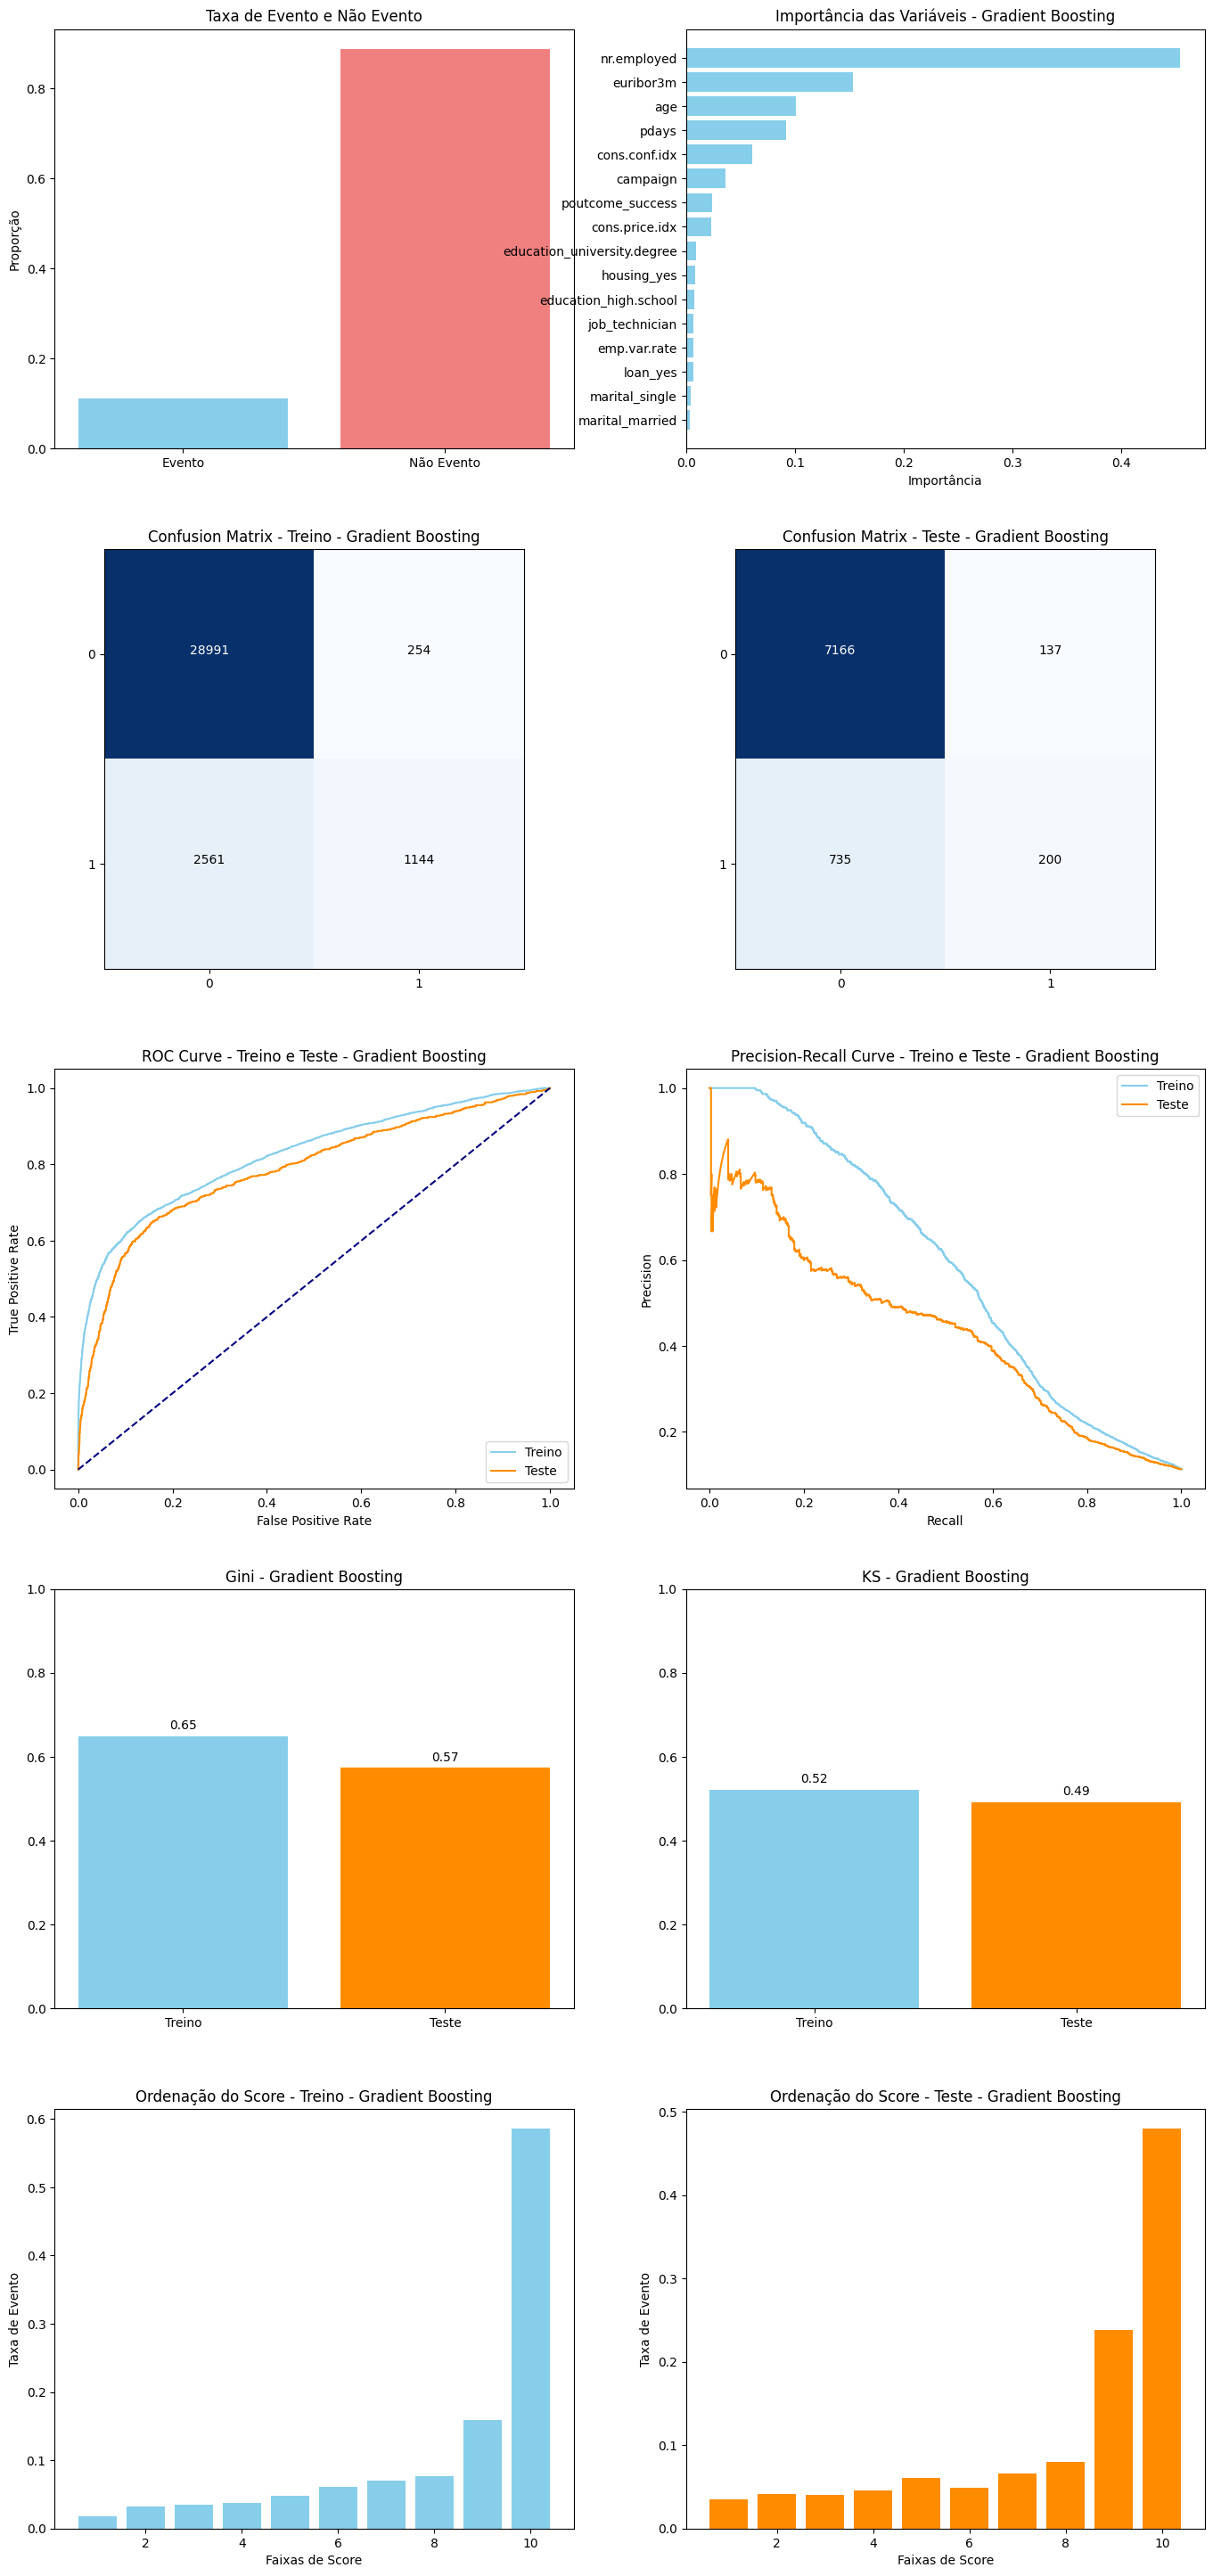

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_gbm, nm_modelo='Gradient Boosting')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: LightGBM (Light Gradient Boosting Machine)**

O LightGBM é um framework de boosting de gradientes que utiliza algoritmos de aprendizado baseados em árvore. Ele é projetado para ser distribuído e eficiente, com as seguintes vantagens: maior eficiência, maior precisão e capacidade de lidar com grandes conjuntos de dados. Vamos entender um pouco mais sobre como ele funciona, suas vantagens, e seus parâmetros.

Trata-se de uma implementação eficiente e escalável do Gradient Boosting, que permite construir modelos de alta precisão, sendo capaz de lidar com conjuntos de dados de grande escala. Seu conjunto extenso de parâmetros permite um ajuste fino do modelo de acordo com as necessidades específicas de diferentes problemas de aprendizado de máquina.
<br>
<br>
**Como Funciona o LightGBM:**

O LightGBM, como um algoritmo de boosting, constrói modelos de forma sequencial, onde cada modelo tenta corrigir os erros do seu antecessor. Diferentemente de outros algoritmos de boosting de árvore, o LightGBM cresce a árvore verticalmente (Leaf-wise) em vez de horizontalmente (Level-wise). Isso significa que o LightGBM foca em dividir as folhas que trazem mais ganho de informação, em vez de dividir todas as folhas no mesmo nível.
<br>
<br>
**Vantagens do LightGBM:**
1. **Eficiência de Memória e Computacional:** Pode lidar com conjuntos de dados grandes, sendo mais eficiente em termos de memória e computação.
2. **Alta Precisão:** Oferece maior precisão em comparação com outros algoritmos de boosting.
3. **Suporte para Dados Categóricos:** Pode lidar com dados categóricos sem necessidade de codificação one-hot.
4. **Paralelismo e GPU:** Suporta treinamento paralelo e pode ser acelerado por GPU.
<br>
<br>

O LightGBM, sendo um método de boosting baseado em árvores, envolve muitos conceitos e cálculos. Abaixo, vou resumir algumas das principais equações e conceitos envolvidos no treinamento de um modelo LightGBM.
<br>
<br>
**1. Modelo Aditivo:**

O modelo final do LightGBM é uma soma de árvores de decisão. Para um problema de regressão, a previsão $ \hat{y} $ é dada pela soma das previsões de todas as árvores $ T $:

$
\hat{y_i} = \sum_{k=1}^{T} f_k(x_i)
$

Onde:
- $ \hat{y_i} $ é a previsão para a i-ésima amostra.
- $ T $ é o número total de árvores.
- $ f_k(x_i) $ é a previsão da k-ésima árvore para a i-ésima amostra.
<br>
<br>

**2. Função Objetivo:**

O LightGBM otimiza uma função objetivo que é a soma de uma função de perda $ L $ e um termo de regularização $ \Omega $:

$
\text{Obj} = \sum_{i=1}^{N} L(y_i, \hat{y_i}) + \sum_{k=1}^{T} \Omega(f_k)
$

Onde:
- $ L(y_i, \hat{y_i}) $ é a função de perda, que mede a diferença entre a previsão $ \hat{y_i} $ e o valor verdadeiro $ y_i $.
- $ \Omega(f_k) $ é o termo de regularização para a k-ésima árvore, que controla a complexidade do modelo.
<br>
<br>

**3. Função de Perda:**

A função de perda depende do tipo de problema. Por exemplo, para regressão, uma escolha comum é o erro quadrático médio:

$
L(y_i, \hat{y_i}) = \frac{1}{2} (y_i - \hat{y_i})^2
$

Para classificação binária, uma escolha comum é a perda logística:

$
L(y_i, \hat{y_i}) = -y_i \log(\hat{y_i}) - (1 - y_i) \log(1 - \hat{y_i})
$
<br>
<br>

**4. Regularização:**

O termo de regularização $ \Omega(f_k) $ geralmente inclui a soma da profundidade da árvore (número total de nós folha) e a norma dos scores nas folhas, e é formulado como:

$
\Omega(f_k) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$

Onde:
- $ T $ é o número de folhas da árvore.
- $ w_j $ é o score da j-ésima folha.
- $ \gamma $ e $ \lambda $ são parâmetros de regularização.
<br>
<br>

**5. Gradiente e Hessiano:**

O LightGBM utiliza o gradiente e o hessiano da função de perda para encontrar a direção ótima para otimizar as árvores subsequentes. Estes são calculados com base na derivada primeira e segunda da função de perda, respectivamente.

$
g_i = \frac{\partial L(y_i, \hat{y_i})}{\partial \hat{y_i}}, \quad h_i = \frac{\partial^2 L(y_i, \hat{y_i})}{\partial \hat{y_i}^2}
$

Essas equações e conceitos são fundamentais para entender o funcionamento interno do LightGBM. Cada passo do algoritmo envolve a otimização desses componentes para construir um modelo que minimiza a função de perda enquanto mantém a complexidade do modelo sob controle.

Para problemas de classificação, o LightGBM, assim como outros métodos de boosting baseados em árvores, utiliza o conceito de votação de árvores para determinar a classe final predita. Vou explicar como isso é feito, focando em classificação binária e multiclasse.
<br>
<br>

**Classificação Binária:**

Para classificação binária, as árvores no modelo de boosting são usadas para modelar o log-odds (logit) da probabilidade da classe positiva. A combinação das árvores dá o valor final do logit, que é então transformado em uma probabilidade via função logística, e a classificação final é decidida com base nessa probabilidade.

A fórmula para o logit (log-odds) é:

$
\text{logit}(\hat{y_i}) = \sum_{k=1}^{T} f_k(x_i)
$

Onde $ f_k(x_i) $ é a previsão da k-ésima árvore para a i-ésima amostra.

Para converter o logit para uma probabilidade, usamos a função logística (sigmoid):

$
\hat{p_i} = \frac{1}{1 + e^{-\text{logit}(\hat{y_i})}}
$

Finalmente, a classe predita $ \hat{y_i} $ é determinada com base na probabilidade:

$
\hat{y_i} =
\begin{cases}
1 & \text{se } \hat{p_i} \geq 0.5 \\
0 & \text{se } \hat{p_i} < 0.5
\end{cases}
$
<br>
<br>

**Classificação Multiclasse:**

Para problemas de classificação com mais de duas classes, o LightGBM utiliza o método de One-vs-All (OvA) para construir um modelo para cada classe contra todas as outras. Para cada classe $ j $, é construído um modelo para estimar a probabilidade $ P(y = j | x) $.

A probabilidade para a classe $ j $ é calculada usando a função softmax:

$
\hat{p_{ij}} = \frac{e^{\text{score}_{ij}}}{\sum_{k=1}^{C} e^{\text{score}_{ik}}}
$

Onde:
- $ \text{score}_{ij} $ é o score para a classe $ j $ para a i-ésima amostra, calculado como a soma das previsões das árvores para essa classe.
- $ C $ é o número total de classes.

A classe final predita $ \hat{y_i} $ é então a classe com a maior probabilidade:
$
\hat{y_i} = \arg\max_j \hat{p_{ij}}
$
<br>
<br>

As árvores no modelo LightGBM, em conjunto, votam para calcular a probabilidade de uma amostra pertencer a uma determinada classe, e a classe final é escolhida com base nessas probabilidades, seja através de um limiar, no caso de classificação binária, ou escolhendo a classe com a maior probabilidade, no caso de classificação multiclasse.

#### **Parâmetros Importantes do LightGBM:**
Aqui estão alguns dos principais parâmetros do LightGBM e uma breve descrição de cada um:

1. **`num_leaves` (int):**
   - Número máximo de folhas em uma árvore.
   - Valor padrão: 31

2. **`max_depth` (int):**
   - Profundidade máxima da árvore.
   - Valor padrão: -1 (sem limite)

3. **`learning_rate` (float):**
   - Taxa de aprendizado.
   - Valor padrão: 0.1

4. **`n_estimators` (int):**
   - Número de árvores a serem construídas.
   - Valor padrão: 100

5. **`objective` (string):**
   - Função objetivo a ser usada.
   - Exemplos: "regression", "binary", "multiclass"

6. **`boosting_type` (string):**
   - Tipo de algoritmo de boosting a ser usado.
   - Valor padrão: "gbdt" (Gradient Boosted Decision Trees)

7. **`subsample` (float):**
   - Fração de amostras usadas por árvore.
   - Valor padrão: 1.0

8. **`colsample_bytree` (float):**
   - Fração de características usadas por árvore.
   - Valor padrão: 1.0

9. **`min_child_samples` (int):**
   - Número mínimo de amostras necessárias em uma folha.
   - Valor padrão: 20

10. **`importance_type` (string):**
    - Tipo de importância das características a serem preenchidas.
    - Valor padrão: "split"

In [ ]:
# Definindo o modelo.
model = lgb.LGBMClassifier(random_state=42, verbosity=-1)


# ================================================================================ Lembrete dos parâmetros do LightGBM =============================================================================== #
# n_estimators=100,    --> Número de árvores na floresta.
# learning_rate=0.1,    --> Taxa de aprendizado, controla a contribuição de cada árvore.
# num_leaves=31,    --> Número máximo de folhas em uma árvore.
# max_depth=-1,    --> Profundidade máxima das árvores. -1 significa profundidade não restrita.
# min_child_samples=20,    --> Número mínimo de amostras em um nó folha.
# min_child_weight=0.001,    --> Peso mínimo necessário para criar um novo nó em uma folha.
# subsample=1.0,    --> Fração de amostras usadas para ajustar cada árvore.
# subsample_freq=0,    --> Frequência para amostrar os dados. 0 significa amostragem em todos os nós.
# colsample_bytree=1.0,    --> Fração de características usadas para ajustar cada árvore.
# reg_alpha=0.0,    --> Termo de regularização L1 em pesos da folha.
# reg_lambda=0.0,    --> Termo de regularização L2 em pesos da folha.
# random_state=None,    --> Semente para geração de números aleatórios.
# n_jobs=-1,    --> Número de jobs a serem executados em paralelo para ajuste e previsão. -1 significa usar todos os processadores.
# silent=True,    --> Se o LightGBM deve imprimir mensagens durante treinamento.
# importance_type='split',    --> Tipo de importância das características ('split' ou 'gain').
# class_weight=None,   --> Pesos associados às classes. Pode ser um dicionário com os pesos ou "balanced".
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'max_depth' : [2, 3],     # Profundidade máxima de cada árvore de decisão no modelo LightGBM.
    'num_leaves': [5, 31],     # Número máximo de folhas em uma árvore de decisão no modelo LightGBM.
    'reg_alpha': [0.1, 0.5],     # Parâmetro de regularização L1 (Lasso) que controla a penalidade adicionada à soma dos valores absolutos dos pesos das folhas.
    'min_data_in_leaf': [2, 5],     # Número mínimo de amostras necessárias para estar em um nó folha em uma árvore de decisão no modelo LightGBM.
    'lambda_l1': [0, 1, 1.5],     # Parâmetro de regularização L1 (Lasso) adicional, semelhante ao reg_alpha, mas para o termo de regularização L1 na função de perda.
    'lambda_l2': [0, 1],     # Parâmetro de regularização L2 (Ridge) adicional, semelhante ao reg_alpha, mas para o termo de regularização L2 na função de perda.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_lightgbm = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  480
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Melhores Parâmetros:  {'lambda_l1': 1, 'lambda_l2': 0, 'max_depth': 3, 'min_data_in_leaf': 5, 'num_leaves': 31, 'reg_alpha': 0.1}

Melhor AUC:  0.8012935530693852



#### **Avaliando o modelo (LightGBM)**

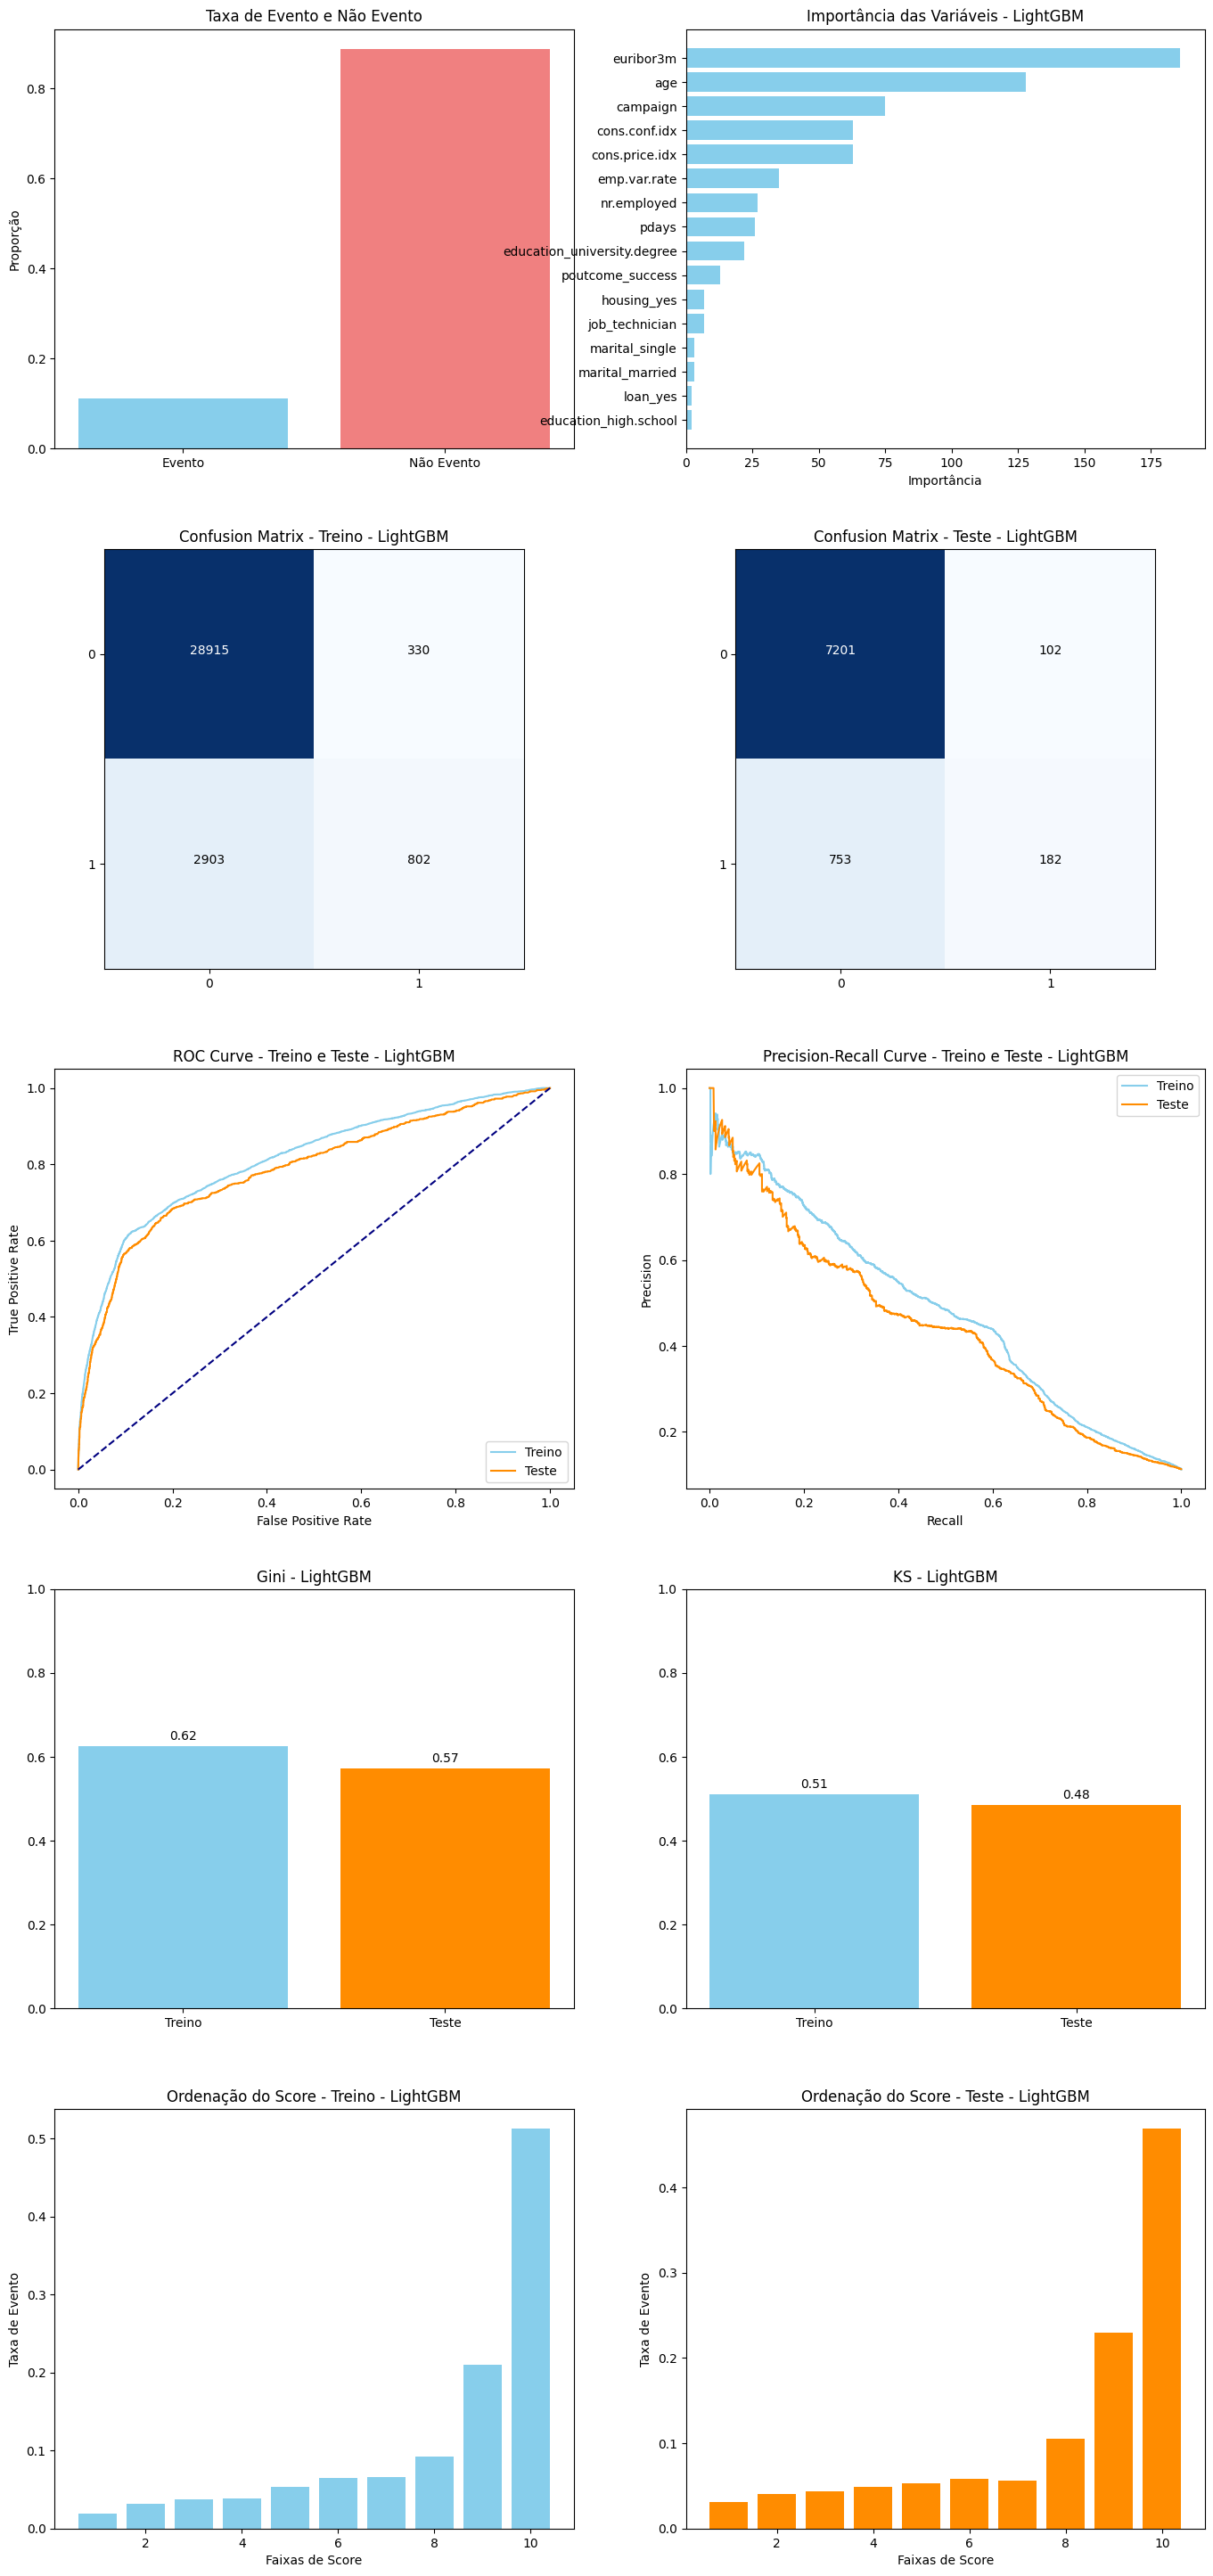

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_lightgbm, nm_modelo='LightGBM')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: XGBoost (eXtreme Gradient Boosting)**

O XGBoost (eXtreme Gradient Boosting) é uma implementação eficiente e escalável do algoritmo de Gradient Boosting, projetada para ser mais rápida e melhor performática. Ele é amplamente utilizado em competições de ciência de dados devido à sua flexibilidade e alta capacidade preditiva.
<br>
<br>

**1. Modelo Aditivo e Função Objetivo:**

Assim como outros métodos de boosting, o XGBoost constrói um modelo aditivo de forma sequencial, com o objetivo de minimizar uma função objetivo que consiste em uma função de perda e um termo de regularização:

$
\text{Obj} = \sum_{i=1}^{N} L(y_i, \hat{y_i}) + \sum_{k=1}^{T} \Omega(f_k)
$

- $ L(y_i, \hat{y_i}) $ é a função de perda, que mede a diferença entre a previsão $ \hat{y_i} $ e o valor verdadeiro $ y_i $.
- $ \Omega(f_k) $ é o termo de regularização para a k-ésima árvore.
- $ T $ é o número total de árvores.
<br>
<br>

**2. Regularização:**

O termo de regularização no XGBoost é um dos elementos que o diferenciam de outras implementações de boosting. Ele é formulado como:

$
\Omega(f) = \gamma T + \frac{1}{2} \lambda \sum_{j=1}^{T} w_j^2
$

- $ T $ é o número de folhas na árvore.
- $ w_j $ é o score (valor previsto) da j-ésima folha.
- $ \gamma $ e $ \lambda $ são parâmetros de regularização.
<br>
<br>

**3. Otimização e Método de Newton-Raphson:**

O XGBoost utiliza tanto o gradiente quanto o Hessiano da função de perda para otimizar o modelo, empregando o método de Newton-Raphson para encontrar o ótimo. Para cada árvore, os parâmetros são ajustados da seguinte forma:

$
w_j^* = -\frac{\sum_{i \in I_j} g_i}{\sum_{i \in I_j} h_i + \lambda}
$

- $ g_i $ e $ h_i $ são, respectivamente, o gradiente e o Hessiano da função de perda para a i-ésima observação.
- $ I_j $ é o conjunto de observações que caem na j-ésima folha.
<br>
<br>

**4. Pruning:**

O XGBoost constrói as árvores de forma "max_depth" primeiro (até a profundidade máxima especificada) e, em seguida, realiza o pruning (poda) das árvores com base no ganho de informação, removendo splits que não trazem melhoria suficiente.
<br>
<br>

**5. Equações de Classificação e Regressão:**

Para problemas de regressão, o XGBoost tenta prever o valor esperado da variável dependente. Para problemas de classificação binária, ele modela a log-odds da probabilidade da classe positiva, e para classificação multiclasse, ele utiliza a técnica "softmax" para modelar as probabilidades das diferentes classes.

A função Softmax é uma função de ativação que transforma vetores de números reais em um vetor de valores de probabilidade. Ela é frequentemente usada em problemas de classificação multiclasse para transformar os scores brutos (logits) de um modelo em probabilidades para cada classe.

Na saída de modelos de aprendizado de máquina para classificação multiclasse, como redes neurais ou modelos de regressão logística multiclasse, a função Softmax é frequentemente usada para converter os scores brutos em probabilidades. A classe prevista para uma dada amostra é então simplesmente a classe com a maior probabilidade segundo a função Softmax.
<br>
<br>

**Formulação da Função Softmax:**

Dado um vetor $ z = [z_1, z_2, ..., z_K] $ de scores brutos (logits) para cada uma das $ K $ classes, a função Softmax transforma esses scores em probabilidades através da seguinte fórmula:

$
\text{Softmax}(z)_j = \frac{e^{z_j}}{\sum_{k=1}^{K} e^{z_k}}
$

Onde:
- $ \text{Softmax}(z)_j $ é a probabilidade da amostra pertencer à classe $ j $.
- $ z_j $ é o score bruto (logit) para a classe $ j $.
- O denominador $ \sum_{k=1}^{K} e^{z_k} $ é a soma dos exponenciais dos scores brutos para todas as classes, assegurando que a soma das probabilidades de todas as classes seja 1.
<br>
<br>

A log loss, ou logaritmic loss, também conhecida como cross-entropy loss, é uma métrica de erro frequentemente usada em problemas de classificação binária e multiclasse para avaliar a precisão das previsões de probabilidade de um modelo.
<br>
<br>
**1. Log Loss para Classificação Binária:**

Para a classificação binária, onde temos duas classes, 0 e 1, a fórmula da log loss para uma única observação é:

$
L(y, p) = -\left( y \log(p) + (1 - y) \log(1 - p) \right)
$

Onde:
- $ y $ é o rótulo verdadeiro (0 ou 1).
- $ p $ é a probabilidade prevista para a classe 1.

A log loss para um conjunto de $ N $ observações é a média das log losses para cada observação:

$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \left( y_i \log(p_i) + (1 - y_i) \log(1 - p_i) \right)
$
<br>
<br>
**2. Log Loss para Classificação Multiclasse:**
Para problemas de classificação multiclasse, a log loss se estende para lidar com múltiplas classes. Se temos $ C $ classes, a log loss para uma única observação é:

$
L(y, p) = - \sum_{c=1}^{C} y_c \log(p_c)
$

Onde:
- $ y_c $ é 1 se a classe verdadeira é $ c $ e 0 caso contrário.
- $ p_c $ é a probabilidade prevista para a classe $ c $.

A log loss para um conjunto de $ N $ observações é a média das log losses para cada observação:

$
\text{Log Loss} = -\frac{1}{N} \sum_{i=1}^{N} \sum_{c=1}^{C} y_{ic} \log(p_{ic})
$
<br>
<br>
**Propriedades da Log Loss:**
- A log loss avalia a qualidade das previsões de probabilidade, punindo fortemente as previsões que estão confiantemente incorretas.
- O valor da log loss varia de 0 a $ +\infty $. Um modelo perfeito teria uma log loss de 0. Valores maiores indicam previsões piores.





In [ ]:
# Definindo o modelo.
model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
# use_label_encoder=False: Este parâmetro controla se o classificador deve ou não usar um codificador de rótulo para converter os rótulos de classe em valores numéricos. Quando definido como False, o classificador assume que os rótulos de classe já estão codificados como valores numéricos. Isso é útil quando você já tem seus rótulos codificados e deseja evitar a conversão automática.
# eval_metric='mlogloss': Este parâmetro especifica a métrica de avaliação a ser usada durante o treinamento do modelo. No caso deste exemplo, 'mlogloss' refere-se à perda logarítmica multinomial, que é uma métrica comumente usada para problemas de classificação multiclasse. A perda logarítmica (também conhecida como entropia cruzada) é uma medida da discrepância entre as distribuições de probabilidade previstas pelo modelo e as distribuições reais dos rótulos de classe. A minimização da perda logarítmica é um objetivo comum durante o treinamento de modelos de classificação.


# ================================================================================ Lembrete dos parâmetros do XGBoost ================================================================================ #
# learning_rate=0.1,    --> Taxa de aprendizado, determina o passo no ajuste dos pesos. Valores comuns são entre 0.01 e 0.3.
# n_estimators=100,    --> Número de árvores a serem construídas.
# max_depth=3,    --> Profundidade máxima de uma árvore. Valores maiores podem levar a overfitting.
# min_child_weight=1,    --> Controle de overfitting. Valores maiores podem levar a underfitting. É o peso mínimo necessário para criar um novo nó em uma árvore.
# colsample_bytree=1,    --> Fração de colunas (features) a serem amostradas para construir cada árvore.
# subsample=1,    --> Fração de observações amostradas para construir cada árvore. Valores baixos podem evitar overfitting.
# reg_alpha=0,    --> Parâmetro de regularização L1 nos pesos das folhas. Um valor maior resulta em mais regularização.
# reg_lambda=1,    --> Parâmetro de regularização L2 nos pesos das folhas.
# random_state=42,    --> Uma semente para reprodutibilidade.
# eval_metric='logloss',    --> Métrica de avaliação a ser usada na validação. Deve ser uma string referenciando uma métrica de avaliação apropriada. Exemplo: 'logloss' para problemas de classificação, 'rmse' para regressão.
# use_label_encoder=False,    -->  Desativa o uso do label encoder para evitar warnings com versões mais recentes do XGBoost.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'learning_rate': [0.01, 0.1],     # Taxa de aprendizado que controla a contribuição de cada árvore na sequência de árvores no modelo XGBoost.
    'max_depth': [3, 5],     # Profundidade máxima de cada árvore de decisão no modelo XGBoost.
    'min_child_weight': [1, 3],     # Peso mínimo necessário de uma criança (nó) para dividir um nó.
    'subsample': [0.5, 0.7, 1.0],     # Proporção de observações a serem amostradas aleatoriamente para construir cada árvore.
    'colsample_bytree': [0.5, 0.7],     # Proporção de features a serem amostradas aleatoriamente para construir cada árvore.
    'n_estimators': [10, 100],     # Número de árvores (estimadores) a serem construídas no modelo XGBoost.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_xgbm = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  480
Fitting 5 folds for each of 96 candidates, totalling 480 fits

Melhores Parâmetros:  {'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 100, 'subsample': 0.7}

Melhor AUC:  0.801414269922607



#### **Avaliando o modelo (XGBoost)**

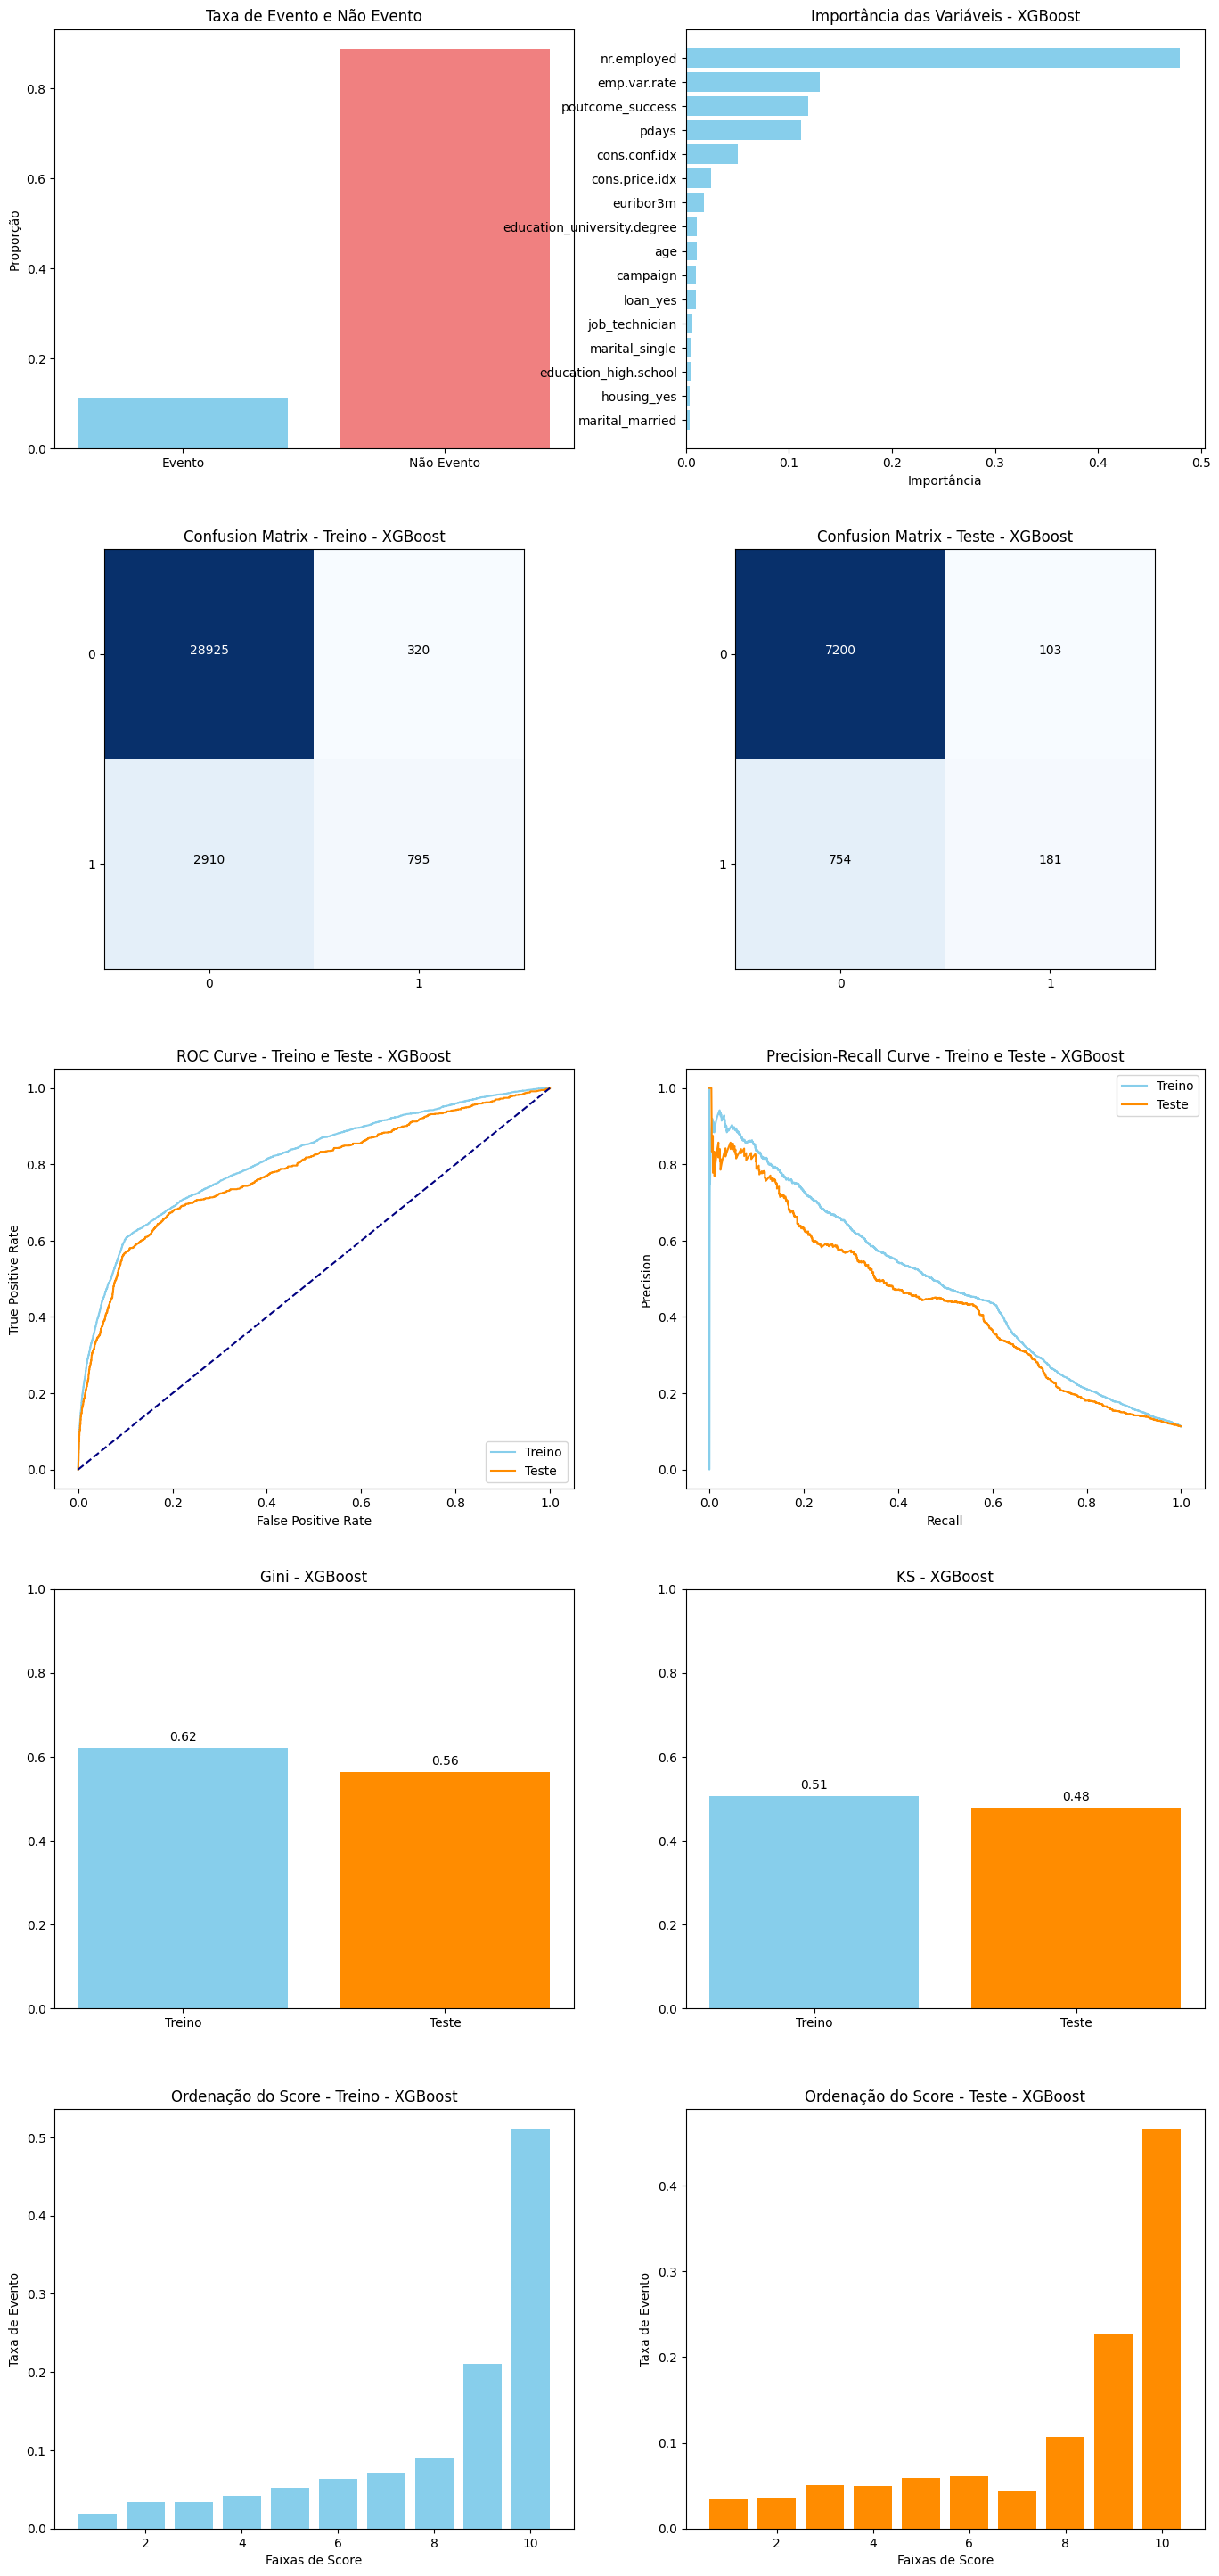

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_xgbm, nm_modelo='XGBoost')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: CatBoost**

O CatBoost é um algoritmo de boosting de árvores de decisão desenvolvido pela Yandex. Ele é especialmente poderoso para conjuntos de dados com características categóricas e tem a capacidade de lidar com elas sem necessidade de pré-processamento, como one-hot encoding.
<br>
<br>

**1. Modelo Aditivo e Função Objetivo:**

Semelhante a outros métodos de boosting, o CatBoost constrói um modelo aditivo:

$
\hat{y}(x) = \sum_{k=1}^{T} f_k(x)
$

onde $f_k(x)$ são funções base (neste caso, árvores de decisão), e $T$ é o número total de árvores. O CatBoost tem como objetivo minimizar a seguinte função objetivo:

$
\text{Obj} = \text{Loss}(\mathbf{y}, \hat{\mathbf{y}}) + \text{Regularization}
$

onde $\text{Loss}(\mathbf{y}, \hat{\mathbf{y}})$ é a função de perda, dependente do problema, e $\text{Regularization}$ é um termo de regularização.
<br>
<br>

**2. Tratamento de Características Categóricas:**

A principal característica do CatBoost é sua capacidade de lidar com variáveis categóricas. Ele utiliza um método chamado "ordered boosting", que elimina o risco de vazamento de dados durante o cálculo de estatísticas de características categóricas.
<br>
<br>

**3. Regularização:**

O CatBoost utiliza a regularização para evitar o overfitting, semelhante ao XGBoost e ao LightGBM. No entanto, a formulação exata do termo de regularização é proprietária do algoritmo CatBoost.
<br>
<br>

**4. Ordered Boosting:**

O CatBoost introduz um esquema de boosting chamado "ordered boosting", que busca evitar o overfitting ao lidar com a escolha de splits nas variáveis categóricas. Isso é feito utilizando diferentes esquemas de permutação para calcular as estatísticas das características categóricas durante o treinamento, o que ajuda a evitar o vazamento de informações e melhora a robustez do modelo.
<br>
<br>

**5. Função de Perda e Problemas de Classificação e Regressão:**

O CatBoost pode ser utilizado para problemas de classificação binária, multiclasse e regressão. A função de perda é escolhida de acordo com o problema:
- Para classificação binária, normalmente se usa a log loss.
- Para multiclasse, utiliza-se uma versão multiclasse da log loss.
- Para regressão, pode-se usar o erro quadrático médio (MSE) ou outras funções de perda contínuas.
<br>
<br>

**6. Eficiência Computacional:**
O CatBoost é otimizado para ser eficiente em termos de memória e tempo de execução e é paralelizável, o que permite treinar modelos em conjuntos de dados grandes de forma eficiente.
<br>
<br>

**Conclusão:**

O CatBoost é um algoritmo de boosting robusto e eficiente que é especialmente útil quando se lida com variáveis categóricas, devido ao seu tratamento inovador dessas variáveis. Ele fornece alta performance e precisão em uma variedade de problemas, com a capacidade de lidar eficientemente com conjuntos de dados grandes e complexos.

In [ ]:
# Definindo o modelo.
model = CatBoostClassifier(random_state=42, silent=True)


# ================================================================================ Lembrete dos parâmetros do CatBoost =============================================================================== #
# iterations=100,    --> Número de árvores na floresta.
# depth=None,    --> Profundidade máxima das árvores. None significa que os nós são expandidos até ficarem puros.
# learning_rate=0.03,    --> Taxa de aprendizado, controla a contribuição de cada árvore.
# loss_function='Logloss',    --> Função de perda para otimização. Pode ser 'Logloss' para classificação binária.
# border_count=254,    --> Número de bins para features numéricas.
# feature_border_type='MinEntropy',    --> Tipo de estratégia para encontrar pontos de corte em features numéricas.
# per_float_feature_quantization=['0:border_count=1024', '1:border_count=1024'],    --> Estratégia de quantização para features float.
# l2_leaf_reg=3.0,    --> Coeficiente de regularização para os pesos das folhas.
# model_size_reg=0.0,    --> Coeficiente de regularização para o tamanho do modelo.
# min_data_in_leaf=1,    --> Número mínimo de amostras necessárias para estar em um nó folha.
# leaf_estimation_method='Exact',    --> Método para estimar valores nas folhas.
# leaf_estimation_iterations=None,    --> Número de iterações para estimativa de valores nas folhas.
# boosting_type='Ordered',    --> Tipo de boosting. Pode ser 'Ordered' ou 'Plain'.
# bootstrap_type='Bayesian',    --> Tipo de amostragem de dados. Pode ser 'Bayesian', 'Bernoulli', ou 'MVS'.
# subsample=1.0,    --> Fração de amostras usadas para ajustar cada árvore.
# max_depth=None,    --> Profundidade máxima das árvores. None significa que os nós são expandidos até ficarem puros.
# n_estimators=None,    --> Número de árvores na floresta. Pode ser usado em vez de 'iterations'.
# num_boost_round=10,    --> Número de iterações de boosting.
# num_trees=100,    --> Número de árvores na floresta.
# num_leaves=31,    --> Número máximo de folhas em uma árvore.
# score_function='Cosine',    --> Função de pontuação para otimização.
# sparse_features_conflict_fraction=0.01,    --> Fração de conflito para features esparsas.
# max_cat_threshold=32,    --> Número máximo de valores distintos para features categóricas.
# task_type='CPU',    --> Tipo de tarefa a ser feita durante o treinamento.
# used_ram_limit=None,    --> Limite de RAM para treinamento.
# gpu_ram_part=0.95,    --> Porcentagem da RAM da GPU usada para treinamento.
# max_bin=None,    --> Número máximo de bins que os dados podem ser divididos.
# model_shrink_mode='Tree',    --> Modo de redução do modelo.
# model_shrink_rate=0.05,    --> Taxa de redução do modelo.
# tidy_eval_frequency=50,    --> Frequência de avaliação para a limpeza de árvores em overfitting detector.
# grow_policy='SymmetricTree',    --> Política de crescimento das árvores.
# min_data_in_leaf=1,    --> Número mínimo de amostras necessárias para estar em um nó folha.
# max_leaves=None,    --> Número máximo de nós folha.
# score_function_update_interval=1,    --> Intervalo de atualização da função de pontuação.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'learning_rate': [0.01, 0.1],     # Taxa de aprendizado que controla a contribuição de cada árvore na sequência de árvores no modelo CatBoost.
    'depth': [6, 8],     # Profundidade máxima da árvore de decisão no modelo CatBoost.
    'l2_leaf_reg': [1, 3],     # Parâmetro de regularização L2 (Ridge) que controla a penalidade adicionada à soma dos quadrados dos pesos das folhas.
    'iterations': [100, 200],     # Número de iterações (ou número de árvores) a serem construídas no modelo CatBoost.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_catbst = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  80
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhores Parâmetros:  {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 3, 'learning_rate': 0.1}

Melhor AUC:  0.8012319717847429



#### **Avaliando o modelo (CatBoost)**

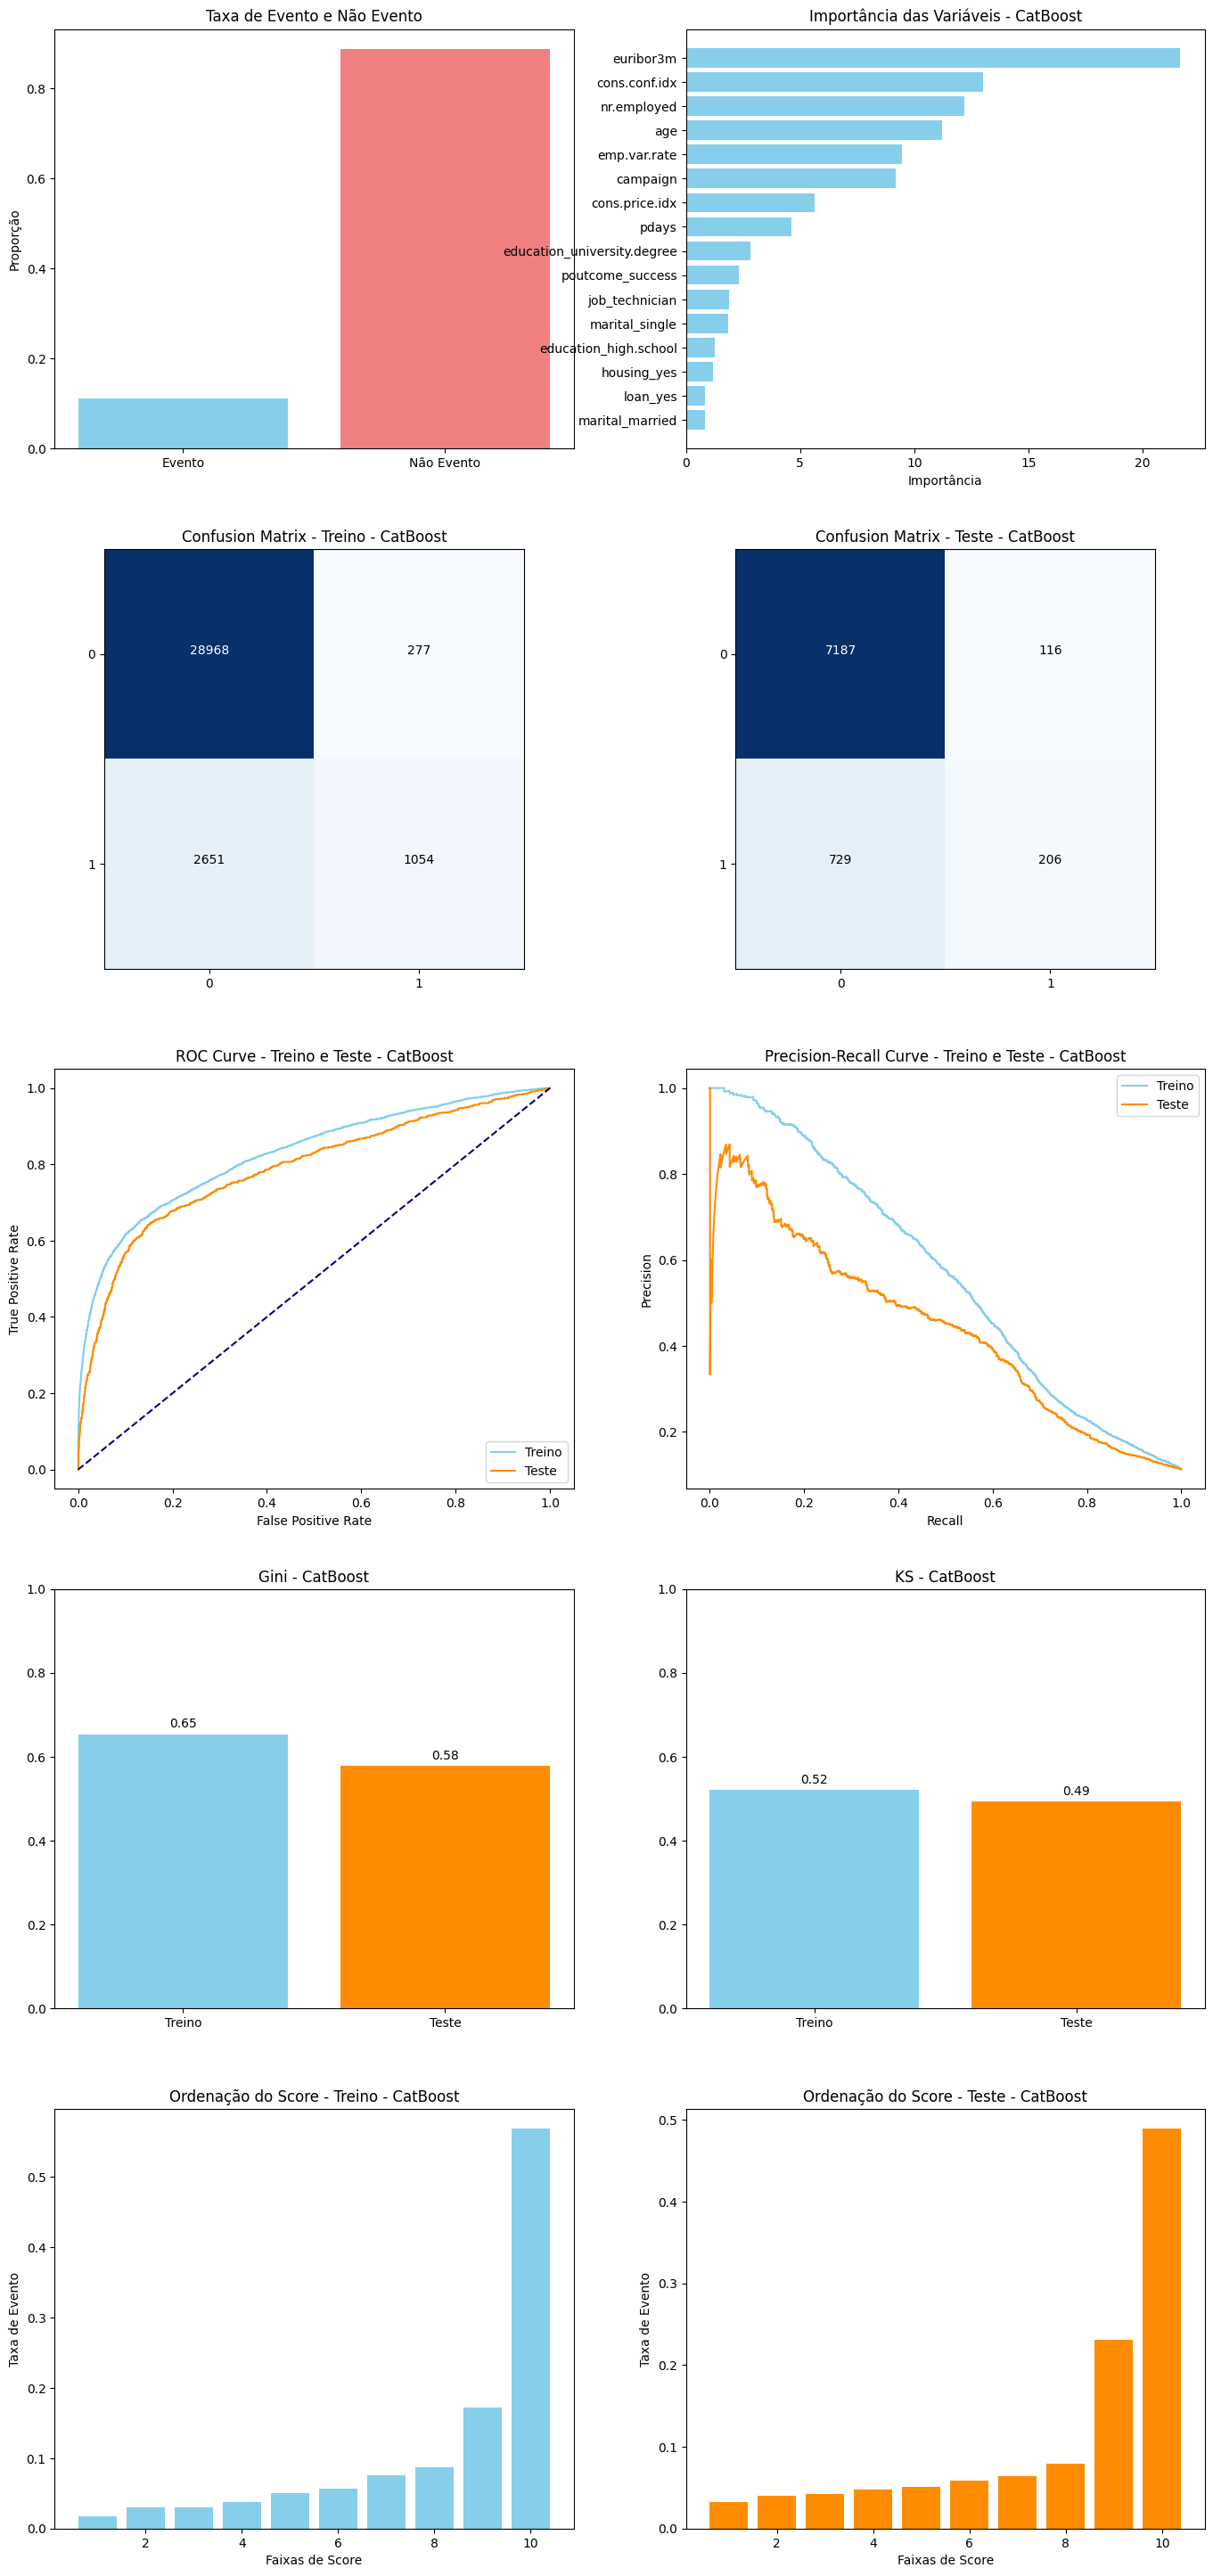

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_catbst, nm_modelo='CatBoost')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: k-Nearest Neighbors (k-NN)**

O algoritmo k-Nearest Neighbors (k-NN) é um método simples e intuitivo de aprendizado de máquina usado para classificação e regressão. Ele é um tipo de aprendizado baseado em instância ou aprendizado preguiçoso, onde a função é aproximada localmente e todo o cálculo é adiado até a avaliação da função.
<br>
<br>

**1. Princípio Básico:**

O k-NN funciona calculando a distância entre uma amostra de teste e todas as amostras de treinamento. As $k$ amostras de treinamento mais próximas são selecionadas, e a previsão é feita com base nessas amostras.
<br>
<br>

**2. Classificação:**

Para um problema de classificação, o k-NN atribui a uma amostra de teste a classe que é mais frequente entre seus $k$ vizinhos mais próximos.

$
y_{\text{pred}} = \arg\max_{c} \sum_{i=1}^{k} w_i \cdot \mathbb{1}(y_i = c)
$

Onde:
- $y_{\text{pred}}$ é a classe prevista para a amostra de teste.
- $w_i$ é o peso associado ao i-ésimo vizinho. Pode ser uniforme ou inversamente proporcional à distância.
- $\mathbb{1}(y_i = c)$ é uma função indicadora, igual a 1 se a classe do i-ésimo vizinho é $c$, e 0 caso contrário.
<br>
<br>

**3. Regressão:**

Para um problema de regressão, o k-NN atribui à amostra de teste a média (ou mediana) dos valores de saída de seus $k$ vizinhos mais próximos.

$
y_{\text{pred}} = \frac{\sum_{i=1}^{k} w_i \cdot y_i}{\sum_{i=1}^{k} w_i}
$

Onde:
- $y_{\text{pred}}$ é o valor previsto para a amostra de teste.
- $w_i$ é o peso associado ao i-ésimo vizinho. Pode ser uniforme ou inversamente proporcional à distância.
- $y_i$ é o valor de saída do i-ésimo vizinho.
<br>
<br>

**4. Distância:**

A medida de distância mais comumente usada no k-NN é a distância Euclidiana:

$
d(x, x') = \sqrt{\sum_{j=1}^{n} (x_j - x'_j)^2}
$

Onde:
- $d(x, x')$ é a distância entre as amostras $x$ e $x'$.
- $x_j$ e $x'_j$ são os valores da j-ésima característica das amostras $x$ e $x'$, respectivamente.
<br>
<br>

**5. Exemplo com Python:**

O Scikit-Learn possui uma implementação do k-NN chamada `KNeighborsClassifier` para classificação e `KNeighborsRegressor` para regressão.
<br>
<br>

**6. Pontos a Considerar:**
- O k-NN é sensível à escala das características, então normalizar os dados é importante.
- Ele também sofre com a "maldição da dimensionalidade", portanto, redução de dimensionalidade (por exemplo, PCA) pode ser útil em conjuntos de dados com muitas características.
- O k-NN é computacionalmente intensivo durante a fase de teste, especialmente para grandes conjuntos de dados, pois calcula a distância entre uma amostra de teste e todas as amostras de treinamento.
<br>
<br>
<br>

Para o algoritmo k-NN, a forma como as previsões são feitas varia entre tarefas de regressão e classificação.
<br>
<br>

**1. Regressão:**

Na regressão, o k-NN calcula a média (ou em alguns casos, a mediana) dos valores das $ k $ observações mais próximas ao ponto de consulta.

A equação para a previsão de regressão é:

$
\hat{y}(x) = \frac{1}{k} \sum_{i=1}^{k} y_i
$

Onde:
- $ \hat{y}(x) $ é a previsão para o ponto de consulta $ x $.
- $ k $ é o número de vizinhos mais próximos considerados.
- $ y_i $ são os valores das $ k $ observações mais próximas.
<br>
<br>

**2. Classificação:**

Na classificação, o k-NN atribui a classe mais frequente entre as $ k $ observações mais próximas ao ponto de consulta.

A equação para a previsão de classificação não é uma equação numérica tradicional, mas pode ser representada como:

$
\hat{y}(x) = \text{moda} (y_1, y_2, \ldots, y_k)
$

Onde:
- $ \hat{y}(x) $ é a classe prevista para o ponto de consulta $ x $.
- $ k $ é o número de vizinhos mais próximos considerados.
- $ y_1, y_2, \ldots, y_k $ são as classes das $ k $ observações mais próximas.
- "moda" refere-se à classe que aparece
com mais frequência entre as $ k $ observações mais próximas.
<br>
<br>

**Distância:**

Ambos, regressão e classificação com k-NN, utilizam métricas de distância (como a distância Euclidiana) para encontrar os $ k $ vizinhos mais próximos:

$
\text{Distância Euclidiana: } d(x, x_i) = \sqrt{\sum_{j=1}^{n}(x_j - x_{i,j})^2}
$

Onde:
- $ x $ é o ponto de consulta.
- $ x_i $ é um ponto no conjunto de dados.
- $ x_j $ e $ x_{i,j} $ são as j-ésimas características de $ x $ e $ x_i $ respectivamente.
- $ n $ é o número total de características.
<br>
<br>

1. **Distância de Manhattan (Distância $L_1$):**
A distância de Manhattan entre dois pontos $x$ e $y$ em um espaço $n$-dimensional é calculada como a soma das diferenças absolutas de suas coordenadas. A equação para a distância de Manhattan é:

$
d(x, y) = \sum_{i=1}^{n} |x_i - y_i|
$

Onde:
- $x = (x_1, x_2, \ldots, x_n)$ e $y = (y_1, y_2, \ldots, y_n)$ são dois pontos no espaço $n$-dimensional.
<br>
<br>

2. **Distância de Minkowski (Distância $L_p$):**
A distância de Minkowski é uma métrica de distância em um espaço normado. É uma generalização das distâncias Euclidiana e Manhattan. A equação para a distância de Minkowski é:

$
d(x, y) = \left( \sum_{i=1}^{n} |x_i - y_i|^p \right)^{1/p}
$

Onde:
- $x = (x_1, x_2, \ldots, x_n)$ e $y = (y_1, y_2, \ldots, y_n)$ são dois pontos no espaço $n$-dimensional.
- $p$ é o parâmetro de ordem da norma.
<br>
<br>

**Observações:**
- Quando $p = 1$, a distância de Minkowski se torna a distância de Manhattan.
- Quando $p = 2$, a distância de Minkowski se torna a distância Euclidiana.

In [ ]:
# Definindo o modelo.
model = KNeighborsClassifier()


# ======================================================================= Lembrete dos parâmetros do k-Nearest Neighbors (k-NN) ====================================================================== #
# n_estimators=100,    --> Número de árvores na floresta.
# learning_rate=0.1,    --> Taxa de aprendizado, controla a contribuição de cada árvore.
# num_leaves=31,    --> Número máximo de folhas em uma árvore.
# max_depth=-1,    --> Profundidade máxima das árvores. -1 significa profundidade não restrita.
# min_child_samples=20,    --> Número mínimo de amostras em um nó folha.
# min_child_weight=0.001,    --> Peso mínimo necessário para criar um novo nó em uma folha.
# subsample=1.0,    --> Fração de amostras usadas para ajustar cada árvore.
# subsample_freq=0,    --> Frequência para amostrar os dados. 0 significa amostragem em todos os nós.
# colsample_bytree=1.0,    --> Fração de características usadas para ajustar cada árvore.
# reg_alpha=0.0,    --> Termo de regularização L1 em pesos da folha.
# reg_lambda=0.0,    --> Termo de regularização L2 em pesos da folha.
# random_state=None,    --> Semente para geração de números aleatórios.
# n_jobs=-1,    --> Número de jobs a serem executados em paralelo para ajuste e previsão. -1 significa usar todos os processadores.
# silent=True,    --> Se o LightGBM deve imprimir mensagens durante treinamento.
# importance_type='split',    --> Tipo de importância das características ('split' ou 'gain').
# class_weight=None,   --> Pesos associados às classes. Pode ser um dicionário com os pesos ou "balanced".
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'n_neighbors': [1, 3, 5, 7, 9, 11, 13, 15],     # Número de vizinhos a serem considerados para a classificação.
    'weights': ['uniform', 'distance'],     # Esquema de ponderação usado na predição. Pode ser 'uniform', onde todos os vizinhos têm o mesmo peso, ou 'distance', onde os pesos são inversamente proporcionais à distância.
    'metric': ['euclidean', 'manhattan', 'minkowski'],     # Métrica de distância usada para calcular a distância entre pontos. Pode ser 'euclidean' (distância euclidiana), 'manhattan' (distância de Manhattan) ou 'minkowski' (distância de Minkowski, geralmente usado com o parâmetro p para definir a ordem da distância).
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_knn = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  240
Fitting 5 folds for each of 48 candidates, totalling 240 fits

Melhores Parâmetros:  {'metric': 'manhattan', 'n_neighbors': 15, 'weights': 'uniform'}

Melhor AUC:  0.7637144797235141



#### **Avaliando o modelo (k-Nearest Neighbors)**

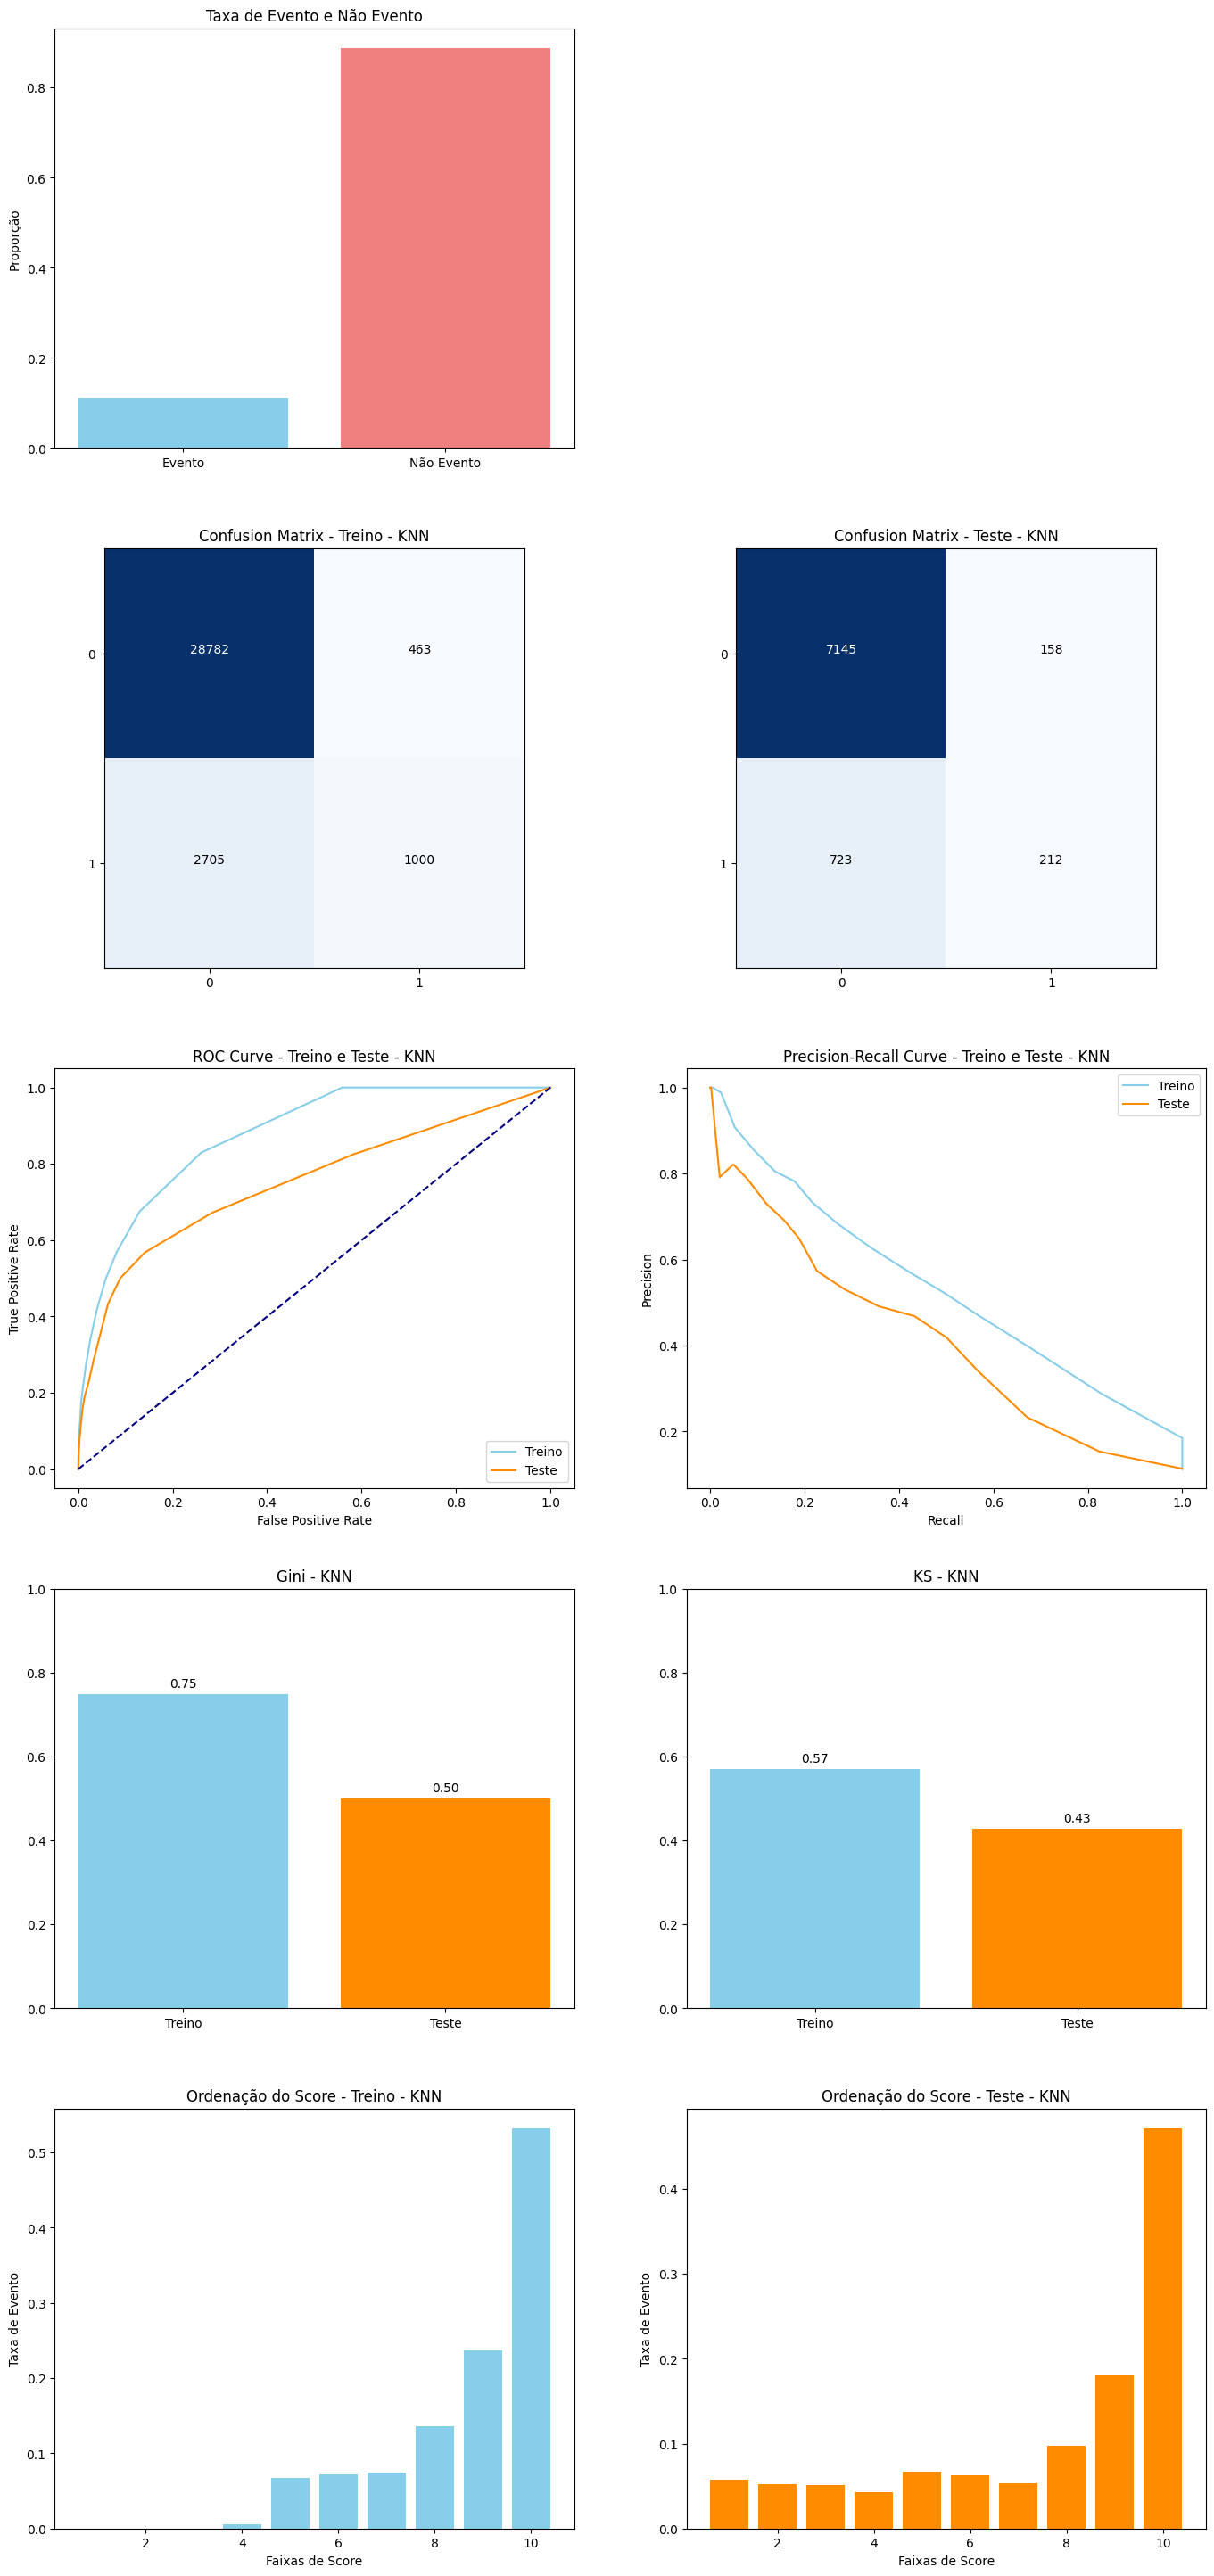

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_knn, nm_modelo='KNN')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: Redes Neurais - MLP**

As Redes Neurais Multilayer Perceptron (MLP) são uma classe de redes neurais artificiais estruturadas em múltiplas camadas, incluindo uma camada de entrada, uma ou mais camadas ocultas e uma camada de saída. Cada neurônio, ou unidade de processamento, em uma camada está conectado a todos os neurônios da camada seguinte por meio de pesos sinápticos. O MLP utiliza uma função de ativação não-linear, como a função sigmoide ou ReLU, permitindo que o modelo capture relações complexas e não-lineares entre as entradas e saídas.
<br>
<br>

O treinamento do MLP é comumente realizado através do algoritmo de retropropagação (backpropagation), que ajusta os pesos sinápticos para minimizar a diferença entre as previsões do modelo e os valores verdadeiros, utilizando técnicas de otimização como o Gradiente Descendente. As redes MLP são aplicadas em uma ampla gama de tarefas de aprendizado de máquina, como classificação, regressão e reconhecimento de padrões, sendo fundamentais para o desenvolvimento de modelos mais sofisticados de aprendizado profundo.
<br>
<br>

As Redes Neurais Multilayer Perceptron (MLP) envolvem várias equações para representar a propagação para a frente (feedforward), a função de ativação, a função de custo e a retropropagação (backpropagation).
<br>
<br>

**1. Propagação para Frente (Feedforward):**

Para um neurônio em uma camada oculta ou de saída, a entrada líquida $ z $ é calculada como:
$
z = w_1x_1 + w_2x_2 + \cdots + w_nx_n + b = \mathbf{w} \cdot \mathbf{x} + b
$

Onde:
- $ \mathbf{w} $ é o vetor de pesos.
- $ \mathbf{x} $ é o vetor de entradas.
- $ b $ é o viés (bias).
<br>
<br>

**2. Função de Ativação:**

A função de ativação é aplicada à entrada líquida para produzir a saída do neurônio. Para a função de ativação sigmoidal, a saída $ a $ é:
$
a = \sigma(z) = \frac{1}{1 + e^{-z}}
$
<br>
<br>

**3. Função de Custo:**

A função de custo $ J $ quantifica o erro entre a previsão da rede e o valor verdadeiro. Para problemas de classificação binária, uma função de custo comum é a entropia cruzada (cross-entropy):
$
J(\mathbf{w}, b) = - \left( y \log(a) + (1 - y) \log(1 - a) \right)
$

Onde:
- $ y $ é o valor verdadeiro.
- $ a $ é a saída da rede.
<br>
<br>

**4. Retropropagação (Backpropagation):**

A retropropagação é usada para atualizar os pesos e vieses da rede durante o treinamento. O gradiente da função de custo em relação aos pesos e vieses é calculado e usado para fazer atualizações. A regra de atualização do gradiente descendente para um peso $ w_i $ é:
$
w_i \leftarrow w_i - \alpha \frac{\partial J}{\partial w_i}
$

Onde:
- $ \alpha $ é a taxa de aprendizado.
<br>
<br>

Essas são equações simplificadas para ilustrar os componentes principais de uma MLP. Em prática, uma MLP terá muitos neurônios em cada camada, e cada neurônio terá seu próprio conjunto de pesos e vieses, que são ajustados durante o treinamento.
<br>
<br>
<br>

As funções de ativação são fundamentais em redes neurais, pois introduzem não-linearidades ao modelo, permitindo que a rede aprenda relações complexas entre as entradas e saídas. Aqui estão as equações para cinco funções de ativação comumente usadas:
<br>
<br>

**1. Função Sigmoide:**
$ \sigma(z) = \frac{1}{1 + e^{-z}} $
- **Range**: (0, 1)
- **Usos**: Camadas de saída em problemas de classificação binária.
<br>
<br>

**2. Função Tangente Hiperbólica (tanh):**
$ \text{tanh}(z) = \frac{e^{2z} - 1}{e^{2z} + 1} $
- **Range**: (-1, 1)
- **Usos**: Camadas ocultas, quando é preferível ter média 0.
<br>
<br>

**3. Função de Ativação Linear Retificada (ReLU):**
$ \text{ReLU}(z) = \max(0, z) $
- **Range**: [0, $+\infty$)
- **Usos**: Camadas ocultas em redes profundas, devido à sua eficiência computacional e propriedades de convergência.
<br>
<br>

**4. Função Softmax:**
$ \text{Softmax}(z)_i = \frac{e^{z_i}}{\sum_{j=1}^{K} e^{z_j}} $
- **Range**: (0, 1) para cada componente, e a soma de todas as componentes é 1.
- **Usos**: Camadas de saída em problemas de classificação multiclasse.
<br>
<br>

**5. Função Leaky ReLU:**
$ \text{Leaky ReLU}(z) = \max(\alpha z, z) $
- **Range**: (-∞, $+\infty$)
- **Usos**: Camadas ocultas em redes profundas, quando é desejável permitir gradientes para $ z < 0 $.
- **Nota**: $ \alpha $ é um pequeno valor positivo, como 0.01.
<br>
<br>

Cada uma dessas funções de ativação tem suas próprias características e é adequada para diferentes tipos de camadas e arquiteturas de rede.
<br>
<br>
<br>

Na Rede Neural Multilayer Perceptron (MLP), a equação de saída varia dependendo se o problema é de regressão ou classificação.
<br>
<br>

**1. Para Regressão:**

Para um problema de regressão, a saída da rede, $ \hat{y} $, é geralmente o valor bruto (sem transformação) produzido pela última camada da rede. Supondo uma única saída, a equação de saída para regressão pode ser dada por:

$
\hat{y} = w_1a_1 + w_2a_2 + \cdots + w_na_n + b
$

Onde:
- $ w_1, w_2, \ldots, w_n $ são os pesos conectando a última camada oculta à camada de saída.
- $ a_1, a_2, \ldots, a_n $ são as ativações da última camada oculta.
- $ b $ é o viés da camada de saída.
<br>
<br>

**2. Para Classificação Binária:**

Para classificação binária, a saída da rede, $ p $, é geralmente a probabilidade da classe positiva, e é obtida aplicando a função sigmoide ao valor bruto produzido pela última camada da rede. A equação de saída para classificação binária seria:

$
p = \sigma(w_1a_1 + w_2a_2 + \cdots + w_na_n + b)
$

Onde:
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ é a função sigmoide.
<br>
<br>

**3. Para Classificação Multiclasse:**

Para problemas de classificação com mais de duas classes, a função softmax é frequentemente usada na camada de saída para converter os valores brutos de saída em probabilidades. Se houver $ K $ classes, a equação de saída para a classe $ k $ seria:

$
p_k = \frac{e^{z_k}}{\sum_{j=1}^{K} e^{z_j}}
$

Onde:
- $ z_k = w_{k,1}a_1 + w_{k,2}a_2 + \cdots + w_{k,n}a_n + b_k $ é o valor bruto de saída para a classe $ k $.
<br>
<br>

**Nota:**
- Nas equações acima, $ a_1, a_2, \ldots, a_n $ são as saídas (ativações) dos neurônios na última camada oculta, que são calculadas com base nas entradas e pesos da rede, e passadas por funções de ativação apropriadas, como ReLU, tanh, etc.

In [ ]:
# Definindo o modelo.
model = MLPClassifier(max_iter=250, random_state=42)
# max_iter=250: Utilizado para definir o número máximo de iterações (passos de treinamento). Controla a duração do treinamento e deve ser ajustado com base na complexidade do problema e na quantidade de dados disponíveis. Se tiver bom poder computacional pode usar 1000.


# ========================================================================== Lembrete dos parâmetros do Redes Neurais - MLP ========================================================================== #
# hidden_layer_sizes=(100,),    --> Número de neurônios em cada camada oculta. Pode ser uma tupla representando o número de neurônios em cada camada ou apenas um valor inteiro para uma única camada.
# activation='relu',    --> Função de ativação para as camadas ocultas. Pode ser 'identity', 'logistic', 'tanh' ou 'relu'.
# solver='adam',    --> Otimizador para treinamento do modelo. Pode ser 'lbfgs', 'sgd' (descida gradiente estocástica) ou 'adam'.
# alpha=0.0001,    --> Termo de regularização para evitar overfitting.
# batch_size='auto',    --> Número de amostras utilizadas em cada atualização do gradiente. Pode ser 'auto' para escolha automática ou um valor inteiro.
# learning_rate='constant',    --> Taxa de aprendizado para atualizações do gradiente. Pode ser 'constant', 'invscaling' ou 'adaptive'.
# learning_rate_init=0.001,    --> Taxa de aprendizado inicial.
# power_t=0.5,    --> Exponente para a taxa de aprendizado de 'invscaling'.
# max_iter=200,    --> Número máximo de iterações.
# shuffle=True,    --> Se embaralhar os dados em cada iteração.
# random_state=None,    --> Semente para geração de números aleatórios.
# tol=1e-4,    --> Tolerância para critério de parada.
# verbose=False,    --> Se mostrar mensagens verbosas durante treinamento.
# warm_start=False,    --> Reutiliza a solução da chamada anterior para ajustar e adicionar mais estimadores.
# momentum=0.9,    --> Momento para atualizações do gradiente. Apenas relevante quando solver='sgd'.
# nesterovs_momentum=True,    --> Se usar o momento de Nesterov.
# early_stopping=False,    --> Se parar o treinamento quando a pontuação de validação não melhorar.
# validation_fraction=0.1,    --> Fração dos dados de treinamento a serem usados como conjunto de validação.
# beta_1=0.9,    --> Hiperparâmetro para o otimizador Adam.
# beta_2=0.999,    --> Hiperparâmetro para o otimizador Adam.
# epsilon=1e-8,    --> Valor pequeno para evitar divisão por zero no otimizador Adam.
# n_iter_no_change=10,    --> Número máximo de épocas sem melhoria no conjunto de validação para esperar antes de interromper o treinamento.
# max_fun=15000,    --> Número máximo de avaliações de função.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'hidden_layer_sizes': [(25,), (50,)], #[(50,), (50, 50)],     # Define a arquitetura da rede neural, especificando o número de neurônios em cada camada oculta.
    'activation': ['tanh', 'relu'],     # Função de ativação usada em cada neurônio da rede neural.
    'solver': ['adam'], #['sgd', 'adam']     # Algoritmo utilizado para otimizar os pesos da rede neural durante o treinamento.
    'alpha': [0.0001, 0.05],     # Parâmetro de regularização que controla a força da regularização L2 (Ridge) na rede neural.
    'learning_rate': ['constant', 'adaptive'],     # Estratégia para atualizar os pesos da rede neural durante o treinamento. Pode ser uma taxa de aprendizado constante ou adaptativa.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train, y_train)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_mlp = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  80
Fitting 5 folds for each of 16 candidates, totalling 80 fits

Melhores Parâmetros:  {'activation': 'relu', 'alpha': 0.05, 'hidden_layer_sizes': (25,), 'learning_rate': 'constant', 'solver': 'adam'}

Melhor AUC:  0.7931717684073012



#### **Avaliando o modelo (Redes Neurais - MLP)**

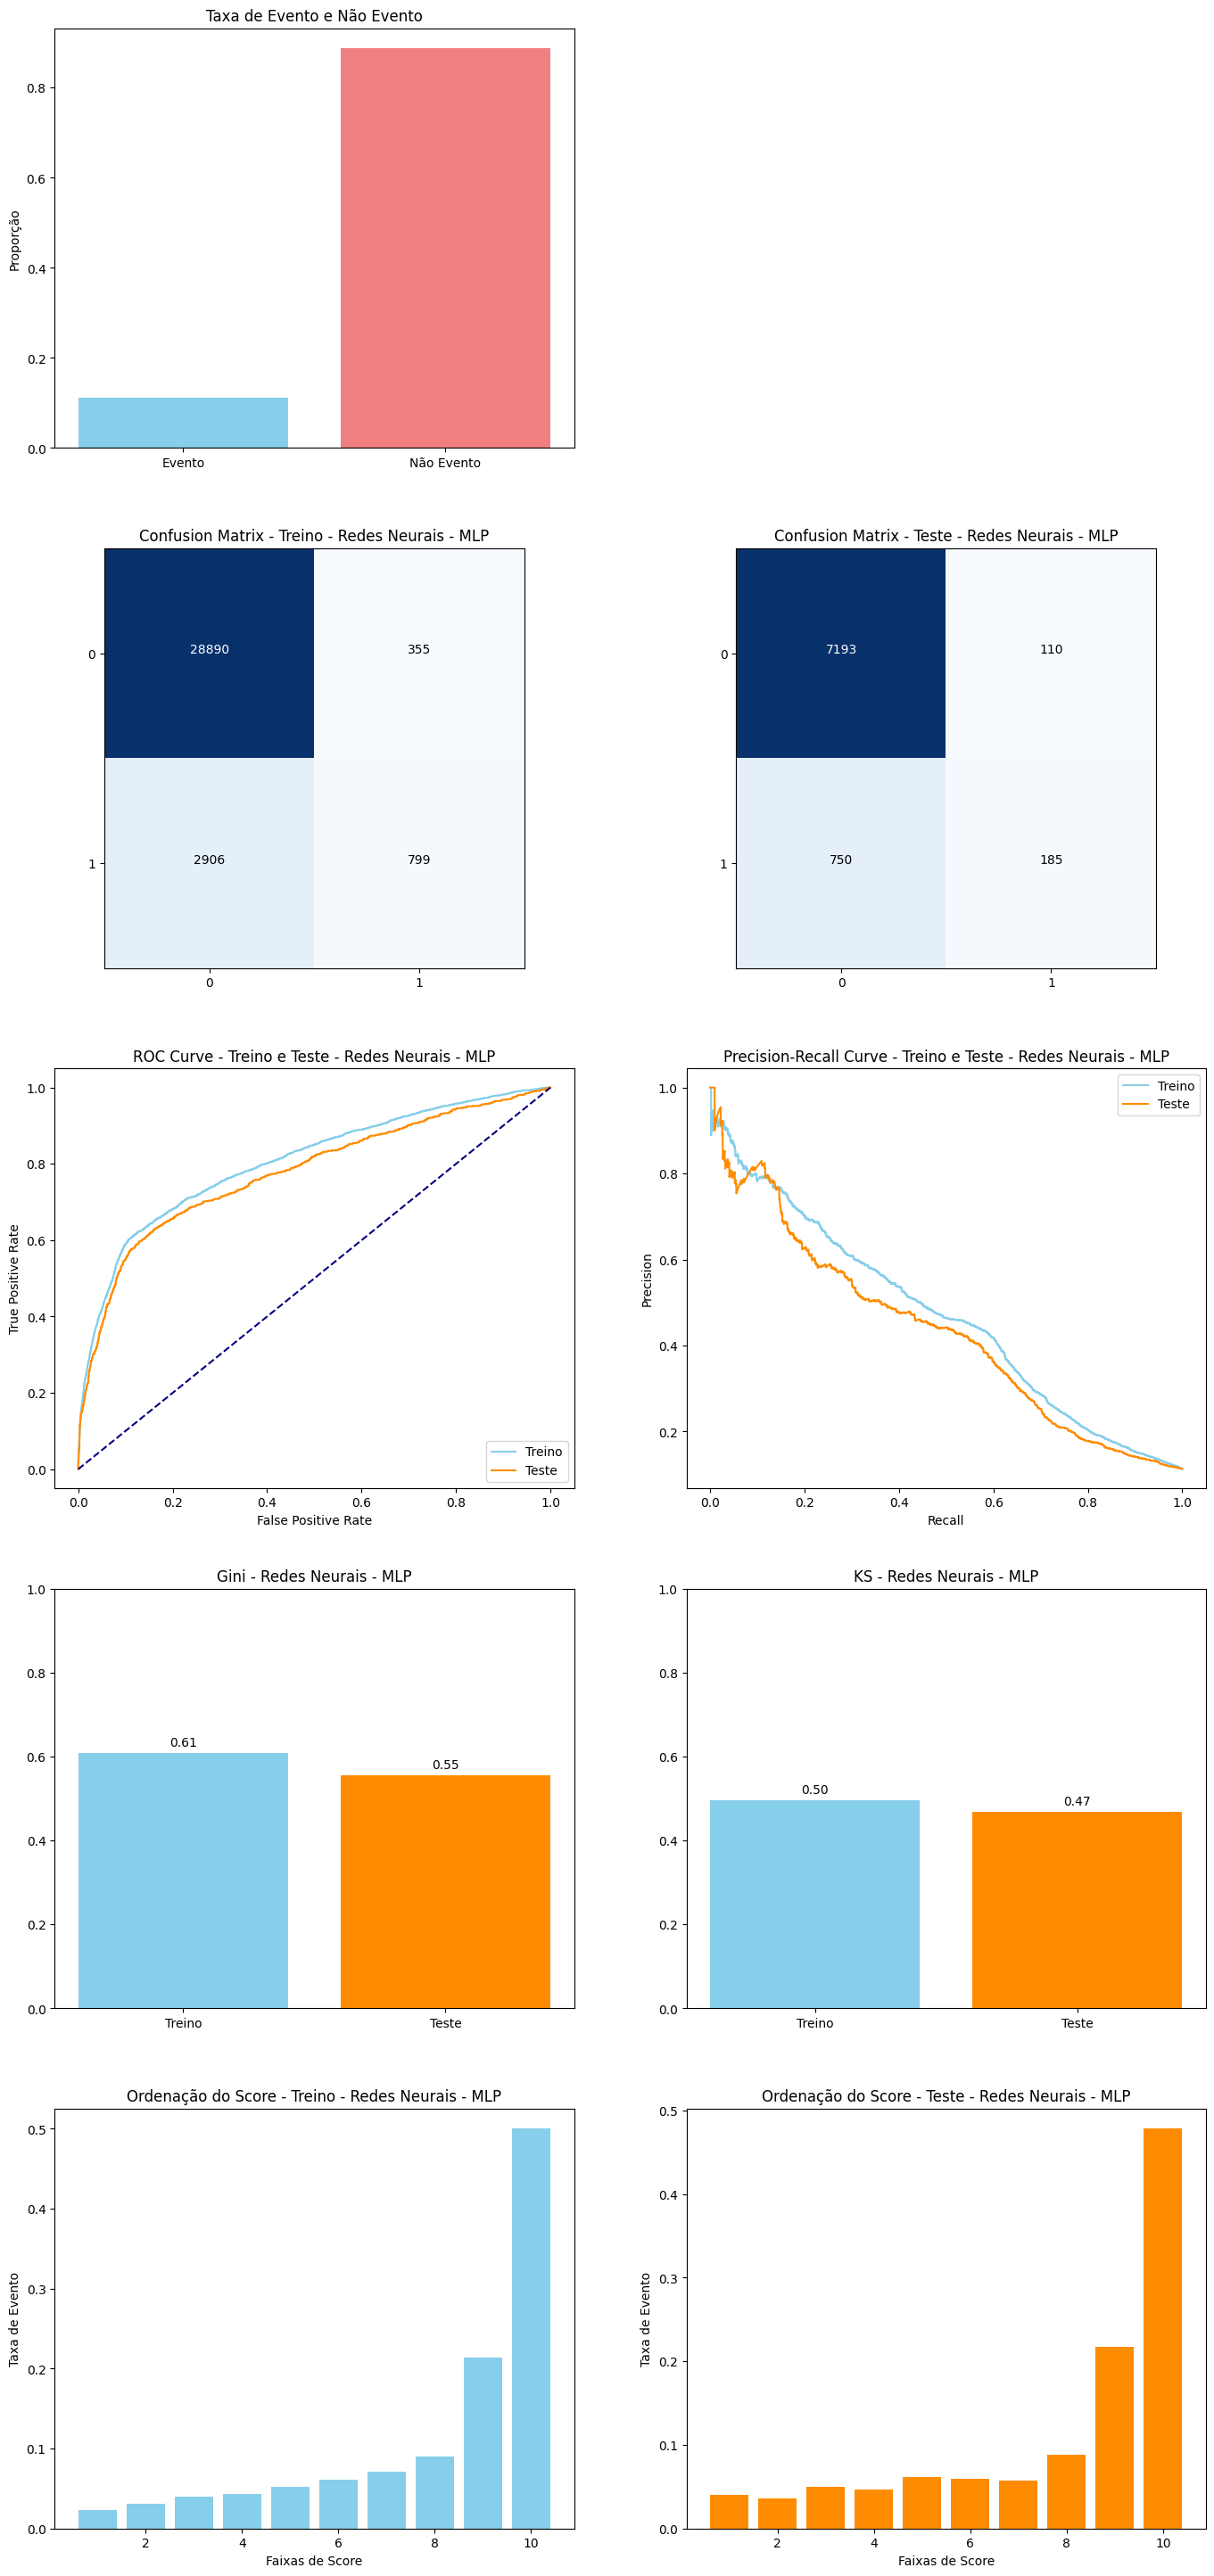

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_mlp, nm_modelo='Redes Neurais - MLP')

<br>
<br>
<br>
<br>

### **Treinamento do modelo usando: SVM (Support Vector Machine)**

O Support Vector Machine (SVM) é um modelo poderoso e versátil de aprendizado de máquina, amplamente utilizado para tarefas de classificação e regressão. O princípio fundamental do SVM é encontrar o hiperplano que separa as diferentes classes no espaço de características de maneira ótima, sendo este definido como o hiperplano que maximiza a margem entre as classes mais próximas, chamadas de vetores de suporte. Em casos não linearmente separáveis, o SVM utiliza funções de kernel, como o kernel polinomial ou o kernel RBF (Radial Basis Function), para mapear os dados para um espaço de dimensão superior onde eles possam ser linearmente separados, uma técnica conhecida como truque do kernel.
<br>
<br>

O SVM é valorizado por sua robustez e eficácia em espaços de alta dimensão e situações onde a margem de separação entre as classes é pequena, sendo uma ferramenta essencial para cientistas de dados em diversas aplicações práticas.
<br>
<br>

O Support Vector Machine (SVM) tem como objetivo encontrar um hiperplano que separe as classes ou que faça a regressão de forma ótima. Vamos detalhar as principais equações, começando com classificação e depois abordando regressão:
<br>
<br>

**1. SVM para Classificação:**

- **Equação do Hiperplano:**
$ w \cdot x + b = 0 $
Onde $ w $ é o vetor normal ao hiperplano, $ x $ são os pontos no espaço de características, e $ b $ é o viés.

- **Decisão de Classificação:**
$ f(x) = \text{sign}(w \cdot x + b) $
Onde a função $\text{sign}(\cdot)$ retorna +1 se o argumento é positivo (pertence à classe +1) e -1 se o argumento é negativo (pertence à classe -1).

- **Objetivo de Otimização (Problema Primal):**
$ \min_{w, b} \frac{1}{2} \|w\|^2 $
$ \text{sujeito a } y_i(w \cdot x_i + b) \geq 1, \forall i $

- **Funções de Kernel:**
Quando se lida com dados não linearmente separáveis, usa-se o truque do kernel para mapear os dados para um espaço de maior dimensão. A função de kernel mais usada é a RBF:
$ K(x_i, x_j) = \exp(-\gamma \|x_i - x_j\|^2) $
Onde $ \gamma > 0 $ é o parâmetro do kernel RBF.
<br>
<br>

**2. SVM para Regressão (SVR - Support Vector Regression):**

- **Modelo de Regressão:**
$ f(x) = w \cdot x + b $
Onde o objetivo é fazer com que $ f(x) $ esteja o mais próximo possível dos valores de saída $ y_i $ para todos os pontos de dados, com uma tolerância de erro $ \epsilon $.

- **Objetivo de Otimização:**
$ \min_{w, b} \frac{1}{2} \|w\|^2 + C \sum_{i=1}^{n} (\xi_i + \xi_i^*) $
$ \text{sujeito a } \begin{cases} y_i - w \cdot x_i - b \leq \epsilon + \xi_i \\ w \cdot x_i + b - y_i \leq \epsilon + \xi_i^* \\ \xi_i, \xi_i^* \geq 0 \end{cases} $

Onde:
- $ \xi_i $ e $ \xi_i^* $ são as variáveis de folga que medem o desvio fora da banda de erro $ \epsilon $.
- $ C > 0 $ é o parâmetro de regularização que controla o equilíbrio entre a complexidade do modelo e a quantidade permitida de violações da banda de erro.
<br>
<br>

**Resumo:**
- Para classificação, a saída é uma decisão de classe (+1 ou -1) baseada no sinal da função de decisão.
- Para regressão, a saída é um valor contínuo representando a previsão do modelo.
<br>
<br>
<br>

Para converter as saídas de um modelo de classificação, como SVM, em probabilidades, uma abordagem comum é usar a função logística (ou sigmoide) aplicada à distância da instância até o hiperplano de decisão. A ideia é mapear a distância de um ponto até o hiperplano de uma maneira que valores grandes (ponto longe do hiperplano no lado positivo) se aproximem de 1, e valores pequenos (ponto longe do hiperplano no lado negativo) se aproximem de 0.

A função sigmoide, que é usada para este propósito, tem a forma:

$ P(y=1 | x) = \frac{1}{1 + \exp(-f(x))} $

Onde:
- $ P(y=1 | x) $ é a probabilidade da classe ser 1 dado o ponto $ x $.
- $ f(x) = w \cdot x + b $ é a função de decisão do SVM.
<br>
<br>

**SVM com Probabilidade no scikit-learn:**

No scikit-learn, o SVM tem um parâmetro `probability` que, quando definido como `True`, faz com que o modelo ajuste uma regressão logística sobre as pontuações da função de decisão para obter probabilidades. Isso é feito usando validação cruzada e, consequentemente, pode aumentar significativamente o tempo de treinamento do modelo.
<br>
<br>
<br>

Em otimização matemática, o problema primal refere-se ao problema de otimização original que se deseja resolver. Muitas vezes, ao resolver problemas de otimização, particularmente em aprendizado de máquina e pesquisa operacional, é comum formular um problema dual associado ao problema primal. O problema dual é derivado do problema primal e, em muitos casos, pode ser mais fácil de resolver, oferecendo ainda insights sobre o problema primal.
<br>
<br>

**Formulação Primal:**

Dado um problema de otimização genérico, o problema primal pode ser formulado da seguinte maneira:

$
\begin{align*}
&\min_{\mathbf{x}} \quad f(\mathbf{x})\\
&\text{s.a.} \quad g_i(\mathbf{x}) \leq 0, \quad i = 1, ..., m\\
&\quad h_j(\mathbf{x}) = 0, \quad j = 1, ..., p
\end{align*}
$

Onde:
- $ \mathbf{x} $ é o vetor de variáveis de decisão.
- $ f(\mathbf{x}) $ é a função objetivo que se deseja minimizar.
- $ g_i(\mathbf{x}) $ são as restrições de desigualdade.
- $ h_j(\mathbf{x}) $ são as restrições de igualdade.
<br>
<br>

**Exemplo: Problema Primal no SVM:**

No contexto de Support Vector Machines (SVM), o problema primal é encontrar o hiperplano de separação que maximiza a margem entre duas classes, enquanto minimiza a soma das distâncias dos pontos mal classificados ao hiperplano. O problema primal do SVM pode ser formulado como:

$
\begin{align*}
&\min_{\mathbf{w}, b, \mathbf{\xi}} \quad \frac{1}{2} \| \mathbf{w} \|^2 + C \sum_{i=1}^{n} \xi_i\\
&\text{s.a.} \quad y_i(\mathbf{w} \cdot \mathbf{x_i} + b) \geq 1 - \xi_i, \quad \xi_i \geq 0, \quad i = 1, ..., n
\end{align*}
$

Onde:
- $ \mathbf{w} $ e $ b $ definem o hiperplano.
- $ \xi_i $ são as variáveis de folga que medem o grau de violação da margem.
- $ C > 0 $ é o parâmetro de regularização.
<br>
<br>

**Problema Dual:**

O problema dual, derivado do primal, frequentemente envolve a maximização da função lagrangiana dual, e suas variáveis são os multiplicadores de Lagrange associados às restrições do problema primal. Resolver o problema dual pode oferecer insights e propriedades úteis relacionadas ao problema primal, e em muitos casos, a solução do problema dual fornece uma maneira de encontrar a solução do problema primal.

In [ ]:
# Criando uma amostra aleatória dos dados de treinamento para otimizar o tempo de processamento do SVM.
sample_size = 0.5
X_train_sample, _, y_train_sample, _ = train_test_split(X_train, y_train, train_size=sample_size, random_state=42)

In [ ]:
# Definindo o modelo.
model = SVC(probability=True, random_state=42)
# probability=True: O SVC habilita a estimativa de probabilidades. Isso significa que após o treinamento do modelo, você pode chamar o método predict_proba()


# ====================================================================== Lembrete dos parâmetros do SVM (Support Vector Machine) ===================================================================== #
# C=1.0,    --> Parâmetro de regularização. Controla a flexibilidade da margem de decisão. Um valor menor especifica uma margem mais larga.
# kernel='rbf',    --> Função kernel a ser usada. Pode ser 'linear', 'poly', 'rbf' (radial basis function), 'sigmoid' ou uma função kernel personalizada.
# degree=3,    --> Grau da função kernel polinomial ('poly'). Não afeta outros kernels.
# gamma='scale',    --> Coeficiente do kernel para 'rbf', 'poly' e 'sigmoid'. Pode ser 'scale' (1 / (n_features * X.var())) ou um valor específico.
# coef0=0.0,    --> Termo independente em kernels 'poly' e 'sigmoid'.
# shrinking=True,    --> Se usar a heurística de shrinking para acelerar o treinamento.
# probability=False,    --> Se ativar a estimativa de probabilidades. Isso pode ser computacionalmente caro.
# tol=1e-3,    --> Tolerância para critério de parada.
# cache_size=200,    --> Especifica o tamanho do cache do kernel em MB.
# class_weight=None,    --> Pesos associados às classes. Pode ser um dicionário com pesos ou 'balanced' para ajustar automaticamente com base nas classes.
# verbose=False,    --> Se mostrar mensagens verbosas durante o treinamento.
# max_iter=-1,    --> Número máximo de iterações, -1 significa sem limite.
# decision_function_shape='ovr',    --> Forma da função de decisão. Pode ser 'ovo' (um contra um) ou 'ovr' (um contra o resto).
# break_ties=False,    --> Se quebrar empates na decisão da classe. Pode ser computacionalmente caro.
# random_state=None,v    --> Semente para geração de números aleatórios.
# ==================================================================================================================================================================================================== #


# Definindo os parâmetros para o grid search.
param_grid = {
    'C': [0.1, 1],     # Parâmetro de regularização que controla a força da regularização na Support Vector Machine (SVM).
    'kernel': ['linear'],     # Especifica o tipo de função de kernel a ser usado no algoritmo SVM. Neste caso, estamos utilizando um kernel linear, que calcula a similaridade entre dois pontos no espaço de características.
    #'degree': [2, 3],     # Só é relevante se kernel='poly'
    'gamma': [0.1, 1]     # Parâmetro do kernel (para kernels não lineares) que influencia a forma da função de decisão. Quanto maior o valor de gamma, mais ajustado ao modelo será cada ponto de dados de treinamento. Utilizando 'auto' para o kernel linear, para diminuir o tempo de processamento.
}

# Calculando a quantidade total de modelos que serão treinados.
num_models = len(list(itertools.product(*param_grid.values()))) * 5     # 5 é o número de folds na validação cruzada (cv).
print(Fore.BLUE + '=' * 150)
print('RESULTADO DO TREINAMENTO DO MODELO'.center(150))
print('')
print(f'Total de Modelos Treinados:  {num_models}')

# Definindo o objeto GridSearchCV.
grid = GridSearchCV(model,
                    param_grid,
                    cv=5,
                    verbose=2,
                    scoring='roc_auc',     # 'accuracy' 'precision' 'recall' 'f1'.
                    n_jobs=-1)

# Treinando o modelo com o grid search.
grid.fit(X_train_sample, y_train_sample)

# Exibindo os melhores parâmetros encontrados pelo grid search.
print('')
print('Melhores Parâmetros: ', grid.best_params_)

# Exibindo a melhor pontuação (score) atingida pelo modelo com os melhores parâmetros.
print('')
print('Melhor AUC: ', grid.best_score_)
print('')
print('=' * 150 + Style.RESET_ALL)

# Utilizando o melhor modelo para fazer previsões.
predictions = grid.best_estimator_.predict(X_test)

best_model_svm = grid.best_estimator_

                                                          RESULTADO DO TREINAMENTO DO MODELO                                                          

Total de Modelos Treinados:  20
Fitting 5 folds for each of 4 candidates, totalling 20 fits

Melhores Parâmetros:  {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}

Melhor AUC:  0.6722552216221613



#### **Avaliando o modelo (SVM - Support Vector Machine)**

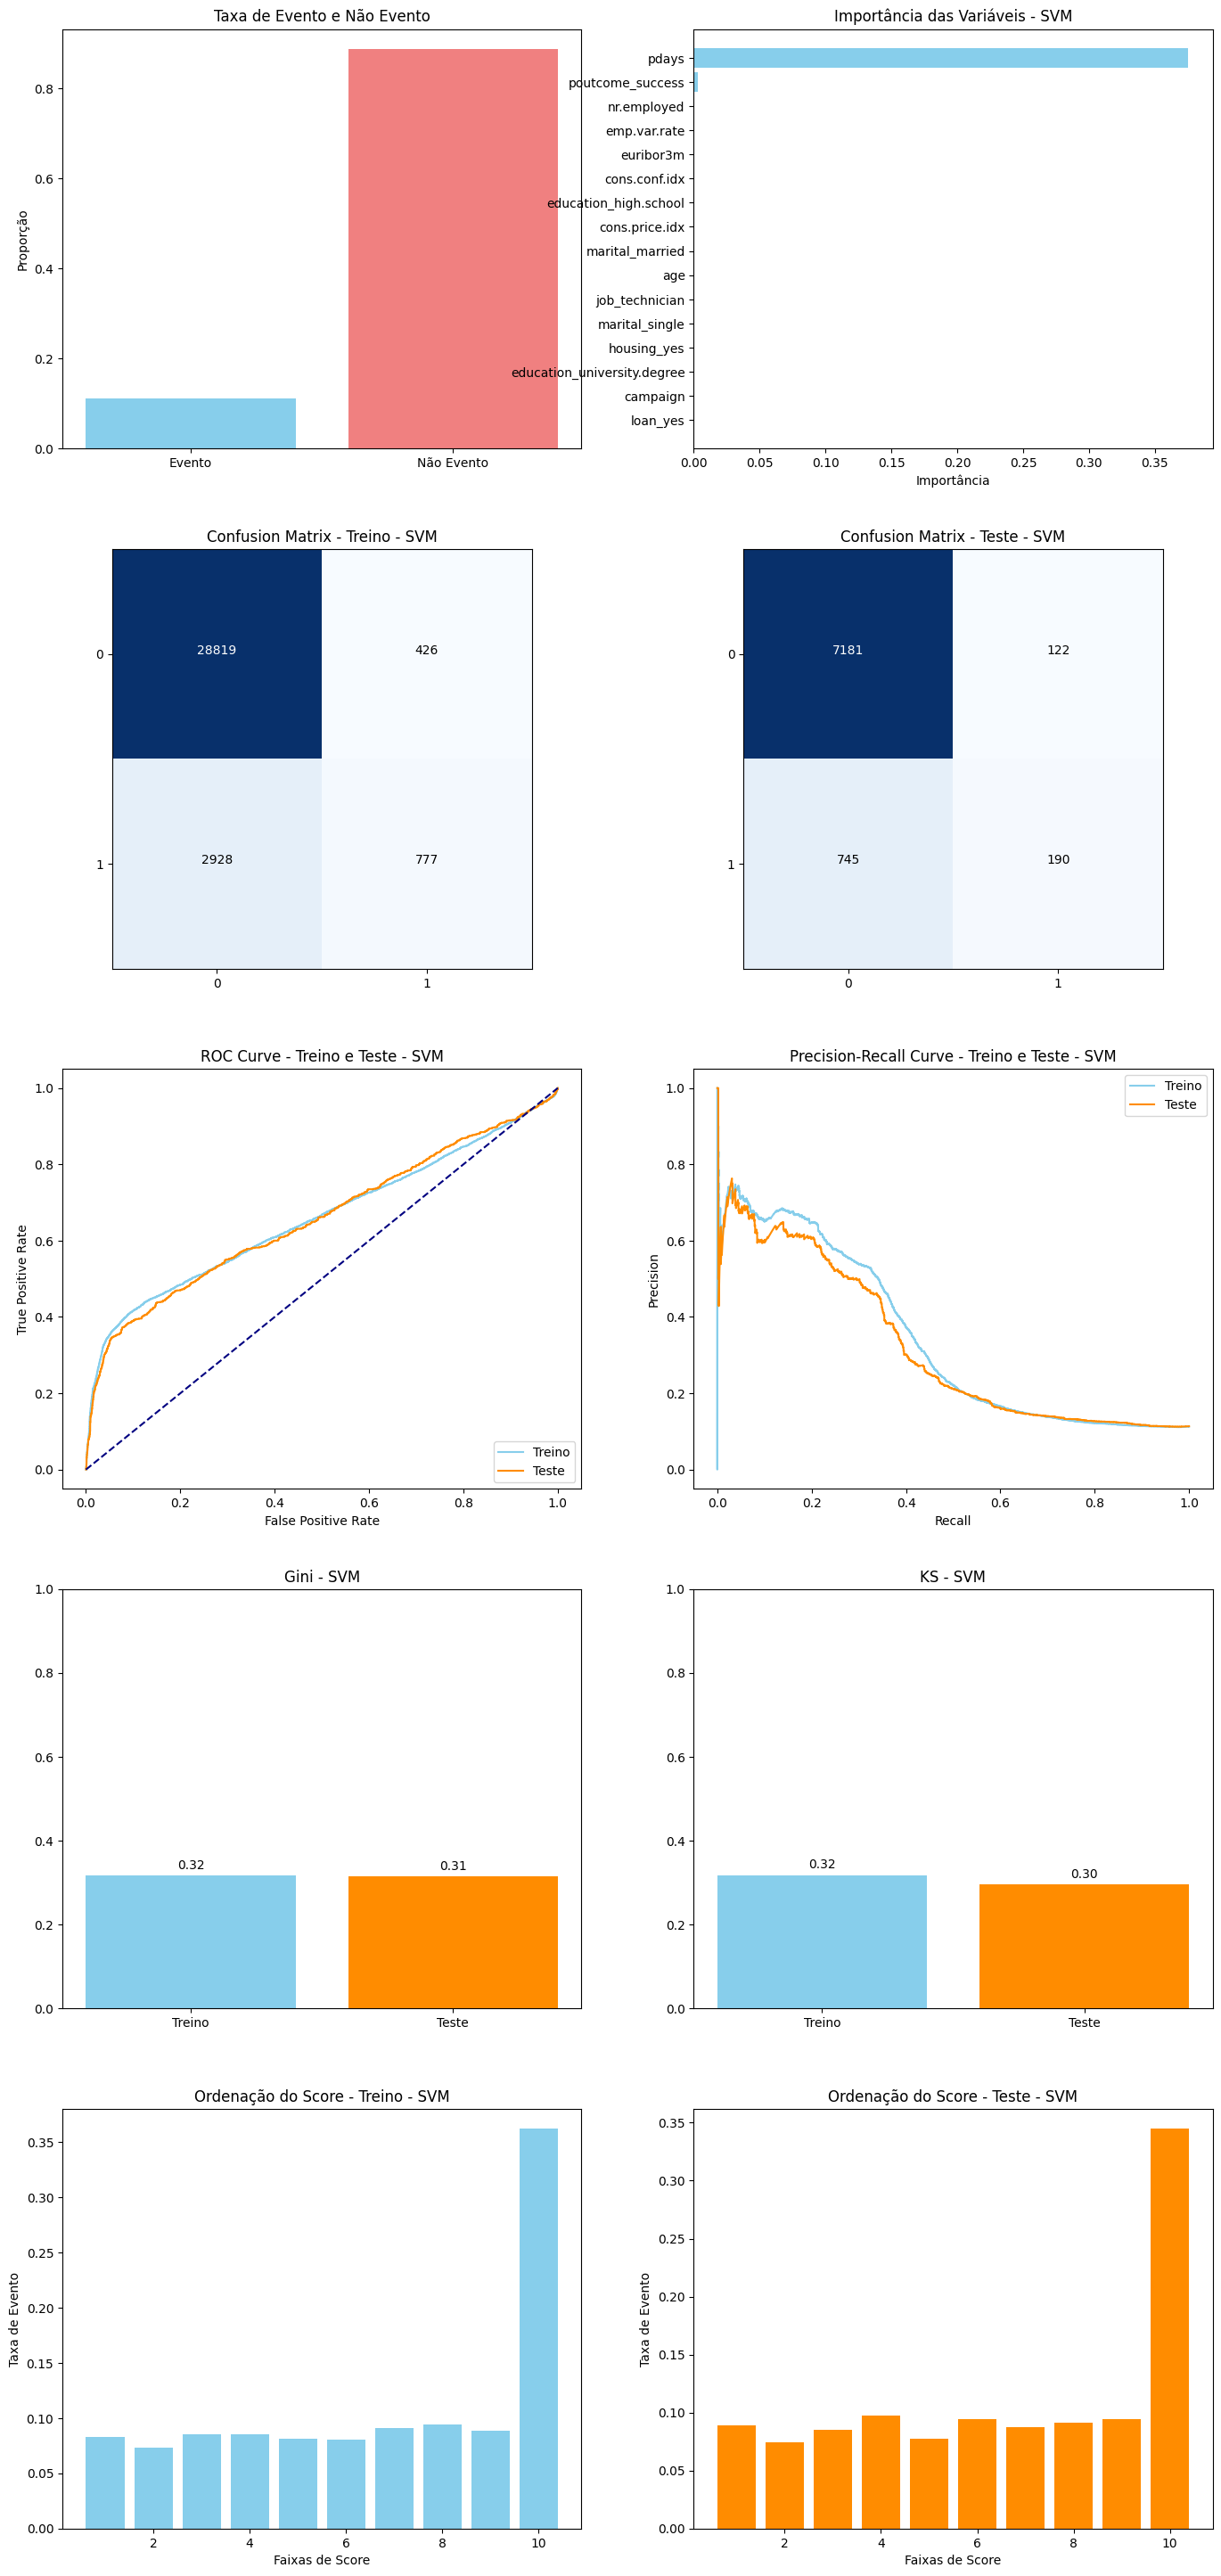

In [ ]:
avaliar_modelo(X_train, y_train, X_test, y_test, best_model_svm, nm_modelo='SVM')

<br>

### **Salvando os artefatos dos modelos treinados**

In [ ]:
# Salvando os modelos treinados em um arquivo pickle .pkl.

with open('artefatos/best_model_dt.pkl', 'wb') as f:
  pickle.dump(best_model_dt, f)

with open('artefatos/best_model_rl.pkl', 'wb') as f:
  pickle.dump(best_model_rl, f)

with open('artefatos/best_model_rf.pkl', 'wb') as f:
  pickle.dump(best_model_rf, f)

with open('artefatos/best_model_gbm.pkl', 'wb') as f:
  pickle.dump(best_model_gbm, f)

with open('artefatos/best_model_lightgbm.pkl', 'wb') as f:
  pickle.dump(best_model_lightgbm, f)

with open('artefatos/best_model_xgbm.pkl', 'wb') as f:
  pickle.dump(best_model_xgbm, f)

with open('artefatos/best_model_catbst.pkl', 'wb') as f:
  pickle.dump(best_model_catbst, f)

with open('artefatos/best_model_knn.pkl', 'wb') as f:
  pickle.dump(best_model_knn, f)

with open('artefatos/best_model_mlp.pkl', 'wb') as f:
  pickle.dump(best_model_mlp, f)

with open('artefatos/best_model_svm.pkl', 'wb') as f:
  pickle.dump(best_model_svm, f)

In [ ]:
# Lendo os modelos treinados.

with open('artefatos/best_model_dt.pkl', 'rb') as f:
    loaded_model_dt = pickle.load(f)

with open('artefatos/best_model_rl.pkl', 'rb') as f:
    loaded_model_rl = pickle.load(f)

with open('artefatos/best_model_rf.pkl', 'rb') as f:
    loaded_model_rf = pickle.load(f)

with open('artefatos/best_model_gbm.pkl', 'rb') as f:
    loaded_model_gbm = pickle.load(f)

with open('artefatos/best_model_lightgbm.pkl', 'rb') as f:
    loaded_model_lightgbm = pickle.load(f)

with open('artefatos/best_model_xgbm.pkl', 'rb') as f:
    loaded_model_xgbm = pickle.load(f)

with open('artefatos/best_model_catbst.pkl', 'rb') as f:
    loaded_model_catbst = pickle.load(f)

with open('artefatos/best_model_knn.pkl', 'rb') as f:
    loaded_model_knn = pickle.load(f)

with open('artefatos/best_model_mlp.pkl', 'rb') as f:
    loaded_model_mlp = pickle.load(f)

with open('artefatos/best_model_svm.pkl', 'rb') as f:
    loaded_model_svm = pickle.load(f)

In [ ]:
# Modelo de Decision Tree (Árvore de Decisão).
loaded_model_dt

DecisionTreeClassifier(max_depth=4, min_samples_leaf=0.008,
                       min_samples_split=0.04, random_state=42,
                       splitter='random')

In [ ]:
# Modelo de Regressão Logística.
loaded_model_rl

LogisticRegression(C=2.0, class_weight='balanced', random_state=42,
                   solver='liblinear', tol=0.001)

In [ ]:
# Modelo de Random Forest.
loaded_model_rf

RandomForestClassifier(max_depth=5, min_samples_leaf=2, min_samples_split=0.01,
                       n_estimators=50, random_state=42)

In [ ]:
# Modelo de Gradient Boosting.
loaded_model_gbm

GradientBoostingClassifier(max_depth=5, random_state=42, subsample=0.8)

In [ ]:
# Modelo de LightGBM.
loaded_model_lightgbm

LGBMClassifier(lambda_l1=1, lambda_l2=0, max_depth=3, min_data_in_leaf=5,
               random_state=42, reg_alpha=0.1, verbosity=-1)

In [ ]:
# Modelo de XGBoost.
loaded_model_xgbm

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.7, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
              max_leaves=None, min_child_weight=3, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [ ]:
# Modelo de CatBoost.
print(loaded_model_catbst.get_params())

{'iterations': 200, 'learning_rate': 0.1, 'depth': 6, 'l2_leaf_reg': 3, 'silent': True, 'random_state': 42}


In [ ]:
# Modelo de KNN.
loaded_model_knn

KNeighborsClassifier(metric='manhattan', n_neighbors=15)

In [ ]:
# Modelo de Redes Neurais - MLP.
loaded_model_mlp

MLPClassifier(alpha=0.05, hidden_layer_sizes=(25,), max_iter=250,
              random_state=42)

In [ ]:
# Modelo de SVM.
loaded_model_svm

SVC(C=0.1, gamma=0.1, kernel='linear', probability=True, random_state=42)

<br>
<br>
<br>
<br>

## **Avaliação dos Modelos**

- A avaliação de modelos de classificação é crucial para entender o desempenho e a aplicabilidade de um modelo em contextos específicos. Diferentes métricas oferecem insights variados sobre aspectos como a precisão, a sensibilidade e a especificidade do modelo em prever as classes.

- Algumas das métricas utilizadas em problemas de classificação são:
  - **Accuracy:** A proporção de previsões corretas em relação ao total de previsões feitas.
  - **Precision:** A proporção de verdadeiros positivos em relação ao total de instâncias previstas como positivas.
  - **Recall:** A proporção de verdadeiros positivos em relação ao total de instâncias positivas reais.
  - **F1 Score:** A média harmônica da precisão e recall, dando mais peso às classes menos representadas.
  - **AUC-ROC:** A área sob a curva ROC, que mede a capacidade do modelo de distinguir entre classes positivas e negativas.
  - **Gini:** Uma métrica de desigualdade que mede o grau de classificação dos valores de uma variável em relação a uma distribuição uniforme.
  - **KS:** A diferença máxima entre as taxas acumuladas de verdadeiros positivos e falsos positivos ao variar o limiar de classificação.

<br>

### **Criando tabela de métricas dos modelos treinados (base de teste)**

In [ ]:
# Criando uma lista com os modelos treinados.
models = {'Decision Tree': loaded_model_dt,
          'Regressão Logística': loaded_model_rl,
          'Random Forest': loaded_model_rf,
          'Gradient Boosting': loaded_model_gbm,
          'LightGBM': loaded_model_lightgbm,
          'XGBoost': loaded_model_xgbm,
          'CatBoost': loaded_model_catbst,
          'KNN': loaded_model_knn,
          'Redes Neurais - MLP': loaded_model_mlp,
          'SVM': loaded_model_svm,
          }

# Chamando a função com os datasets de treino e teste e os modelos carregados.
metrics_df = evaluate_models(X_train, y_train, X_test, y_test, models)

metrics_df

Podemos ter uma visão geral das métricas e saber qual modelo desempenha melhor de acordo com cada métrica avaliada. Podemos ter também uma noção de tempo que leva para processar o treinamento de cada modelo, assim podemos avaliar se o tempo é um fator determinante ou não para a escolha do nosso modelo.
<br>
<br>

Se considerarmos a métrica de AUC-ROC o modelo de CatBoost obteve um melhor desempenho (0.788823), já para as métricas Gini e KS o modelo de CatBoost também apresentou um melhor resultado (0.577646	e 0.493416 respectivamente).
<br>
<br>

A decisão da escolha do modelo que seguirá para produção deve ser tomada junto ao time de negócios e estar de acordo com as necessidades do projeto e o tipo do problema a ser resolvido, mas é sempre importante analisar alguns fatores como:
  - **Desempenho:** Avaliar o desempenho do modelo em dados de validação ou teste, usando métricas relevantes para o problema em questão.
  - **Interpretabilidade:** Se o modelo precisa ser interpretável para explicar as decisões a stakeholders ou para conformidade com regulamentações.
  - **Escalabilidade:** Garantir que o modelo possa lidar com volumes de dados e solicitações esperados na produção.
  - **Manutenção:** Considerar a facilidade de manutenção do modelo, incluindo atualizações, monitoramento de desempenho e resolução de problemas.
  - **Custo:** Avaliar o custo de implantação e manutenção do modelo, incluindo custos de infraestrutura, licenciamento de software e recursos humanos.
  - **Tempo de treinamento e inferência:** Levar em conta o tempo necessário para treinar o modelo e para fazer previsões em tempo real na produção.
  - **Requisitos de computação:** Avaliar os recursos computacionais necessários para treinar e executar o modelo, como CPU, GPU ou TPU.
  - **Compatibilidade com a infraestrutura existente:** Verificar se o modelo pode ser integrado facilmente com sistemas e tecnologias existentes na infraestrutura de produção.

<br>
<br>
<br>
<br>

## **Conclusão**

- Ao longo deste projeto nós passamos pelo entendimento do problema a ser resolvido, carregamos a base de dados que nos foi disponibilizada, exploramos essa base de dados para conhecer um pouco dos dados, fizemos a limpeza e os tratamentos necessários para um bom treinamento de modelos, escolhemos as melhores variáveis de acordo com o Feature Importance, checamos a correlação das variáveis e o valor do IV de cada uma delas, treinamos modelos baseline com diversos algoritmos e avaliamos as principais métricas de cada modelo.
<br>
<br>
- Certamente um dos modelos treinados atenderia ao nosso problema de negócio proposto no começo deste notebook, que era: **Construir um modelo que preveja se um cliente do banco se inscreverá (1/yes) ou não (0/no) para um depósito a prazo**. É claro que ainda podemos melhorar os nossos modelos para que o desempenho seja cada vez melhor e que a previsão seja a melhor possível.
<br>
<br>
- Criar um modelo de machine learning que preveja se um cliente fará um depósito a prazo em um banco pode ter várias implicações financeiras significativas:
  - **Aumento da receita:** Identificar clientes propensos a fazer depósitos a prazo permite direcionar estratégias de marketing e vendas específicas para esses clientes, aumentando as chances de conversão e gerando mais receita para o banco.
  - **Redução de custos:** Ao prever com precisão quais clientes têm maior probabilidade de fazer um depósito a prazo, o banco pode otimizar seus esforços de marketing, reduzindo custos associados à aquisição de clientes e melhorando o retorno sobre o investimento em campanhas de marketing.
  - **Melhoria da gestão de liquidez:** Prever os depósitos a prazo pode ajudar os bancos a gerenciar melhor suas reservas de liquidez, permitindo que ajustem as operações de empréstimo e investimento de acordo com a demanda futura de depósitos.
  - **Personalização de serviços:** Com modelos preditivos, os bancos podem personalizar ofertas e serviços para clientes individuais com base em suas probabilidades de fazer um depósito a prazo, proporcionando uma experiência mais relevante e satisfatória ao cliente.
  - **Redução de riscos:** Com uma compreensão mais clara do comportamento dos clientes em relação aos depósitos a prazo, os bancos podem identificar e mitigar melhor os riscos associados à inadimplência e à falta de liquidez, contribuindo para a estabilidade financeira e a saúde geral da instituição.
<br>
<br>

**Próximos Passos**

Podemos melhorar o modelo cada vez mais, de acordo com a necessidade do negócio e o tempo disponibilizado. Para esse projeto algumas sugestões seriam:
  - Exploração dos dados, plotagem de gráficos, para conhecer nosso público e tentar traçar um perfil do cliente, tirar insights importantes que poderão nos ajudar no treinamento dos modelos e no negócio como um todo.
  - Imputar a mediana ao invés da média nas variáveis numéricas e a moda ao inves de "VERIFICAR" nas variáveis categoricas, afim de melhor o desempenho do nosso modelo.
  - Testar o uso do Target Encoding ao invés do Label Encoding, afim de melhor o desempenho do nosso modelo.
  - Treinar os modelos baseados em árvores sem fazer o tratamento dos dados como padronização e encoding.
  - Treinar os modelos usando outro algoritmo para o método de Feature Importance
  - Aumentar ou diminuir o ponto de corte para a escolha das variáveis através do Feature Importance.
  - Usar outros métodos de seleção de variáveis, como por exemplo o Boruta, que encontra e retém apenas as variáveis verdadeiramente importantes no conjunto de dados, enquanto remove aquelas que são apenas ruído.
  - Treinar modelos sem fazer a seleção de variáveis, deixando que o modelo treine com todas as variáveis (pois neste caso específico sabemos que existem poucas variáveis).
  - Descartar as variáveis com alta correlação e com poder preditivo fraco ou inútil, antes de fazer o treinamento dos modelos.
  - Mexer nos parâmetros inicias do Grid Search, para testar mais parâmetros (exige um poder computacional maior).
  - Busca de mais dados sobre o cliente (compra de base de dados de Bureaus, dados internos e etc.) e criação de novas variáveis explicativas (Feature Engineering).
  - Levantamento dos requisitos computacionais necessários para treinar, executar e colocar o modelo em produção.
  - Levantamento dos custos de implantação e manutenção do modelo.
  - Levantamento do ROI para esse projeto.